<a href="https://colab.research.google.com/github/alejandraworkduran/Data_Projects/blob/main/RetentionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade sdv -qqq
import sdv
print(sdv.__version__)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 25.7 MB/s eta 0:00:00
1.13.1


In [ ]:
import pandas as pd
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_path = '/content/Hanover.dataset.20210806.xlsx'
data = pd.read_excel(data_path, sheet_name='Data Sample')

# Display the first few rows of the dataset
print("Original Data:")
print(data.head())

# Define metadata for the data
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

# Ensure the metadata captures the categorical columns
for column in data.select_dtypes(include=['object', 'category']).columns:
    metadata.update_column(column, sdtype='categorical')

# Define the CTGANSynthesizer model
synthesizer = CTGANSynthesizer(metadata)

# Fit the model on the real data
synthesizer.fit(data)

# Specify the number of synthetic records to generate
# num_records = len(data)
num_records = 120000

# Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=num_records)

# Display the first few rows of the synthetic data
print("Synthetic Data:")
print(synthetic_data.head())

# Save the synthetic data to a CSV file
synthetic_data.to_csv('/content/mdc_synth_data.csv', index=False)


Original Data:
   ID  first_term  start_date     ENROLLMENT_CURRENT CURRENT_HOME_CAMPUS  \
0   1        2197    20190826  First-Time-in-College               KENDL   
1   2        2177    20170828  First-Time-in-College                 HIA   
2   3        2177    20170828  First-Time-in-College               KENDL   
3   4        2197    20190826  First-Time-in-College               NORTH   
4   5        2187    20180827  First-Time-in-College                WOLF   

  CURRENT_MAJORITY_CAMPUS_ORIG  veteran_flag  STRM_CUR_GPA  \
0                        PADRO             0          4.00   
1                         HOME             0          3.69   
2                        KENDL             0          0.00   
3                        NORTH             0          3.00   
4                        KENDL             0          0.57   

   credits_attempted_1st_term  credits_earned_1st_term  ...  fed_grant_amt  \
0                         1.0                      1.0  ...            NaN   

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:86: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Synthetic Data:
          ID  first_term  start_date     ENROLLMENT_CURRENT  \
0  773153107        2177    20184461  First-Time-in-College   
1  295010557        2196    20170828  First-Time-in-College   
2  475410988        2177    20170828           Transfer New   
3  421328571        2179    20171209  First-Time-in-College   
4  646285693        2177    20174732  First-Time-in-College   

  CURRENT_HOME_CAMPUS CURRENT_MAJORITY_CAMPUS_ORIG  veteran_flag  \
0               NORTH                        KENDL             0   
1               KENDL                         WOLF             0   
2               PADRO                         WEST             0   
3                WOLF                        VIRTU             0   
4               NORTH                          HIA             0   

   STRM_CUR_GPA  credits_attempted_1st_term  credits_earned_1st_term  ...  \
0      1.770701                         1.6                     10.5  ...   
1      3.549129                         1.

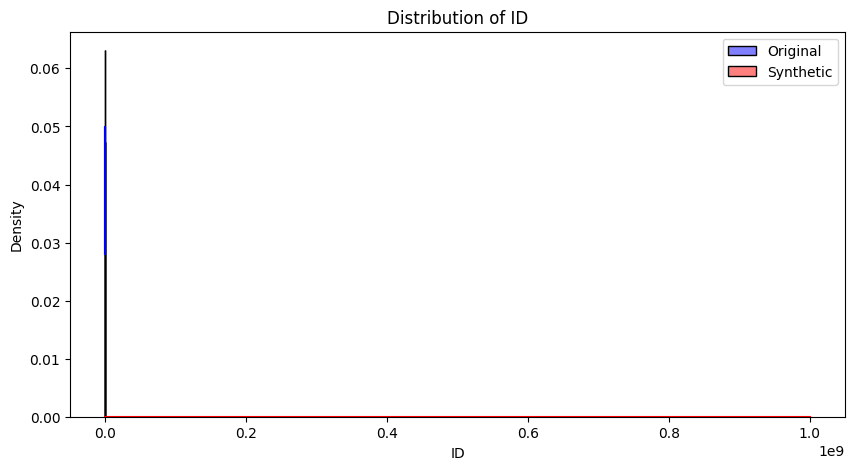

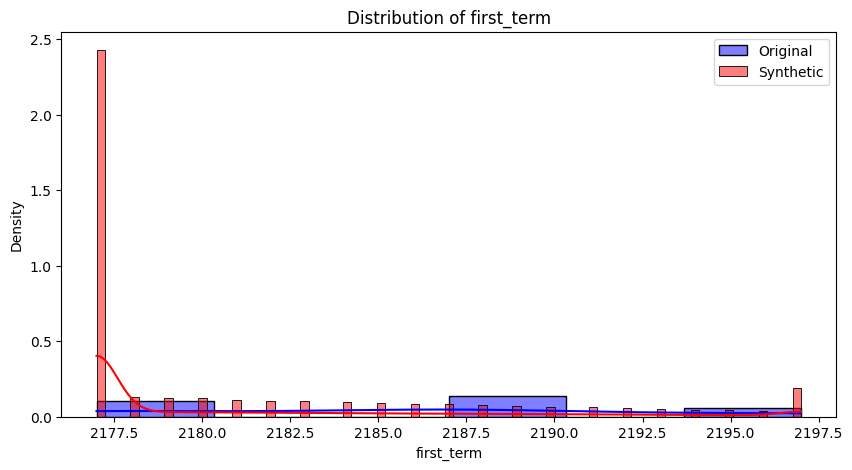

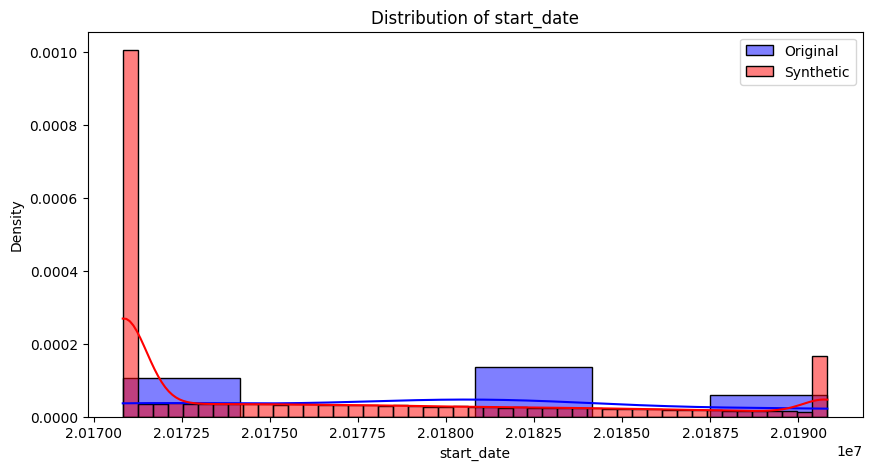

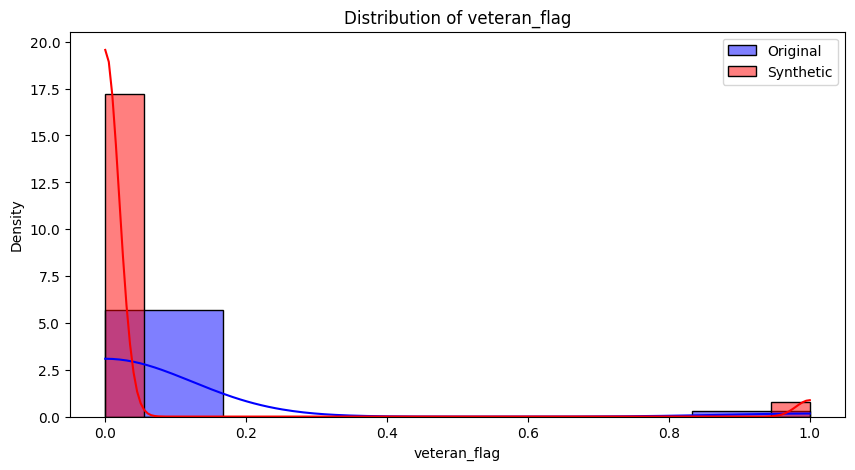

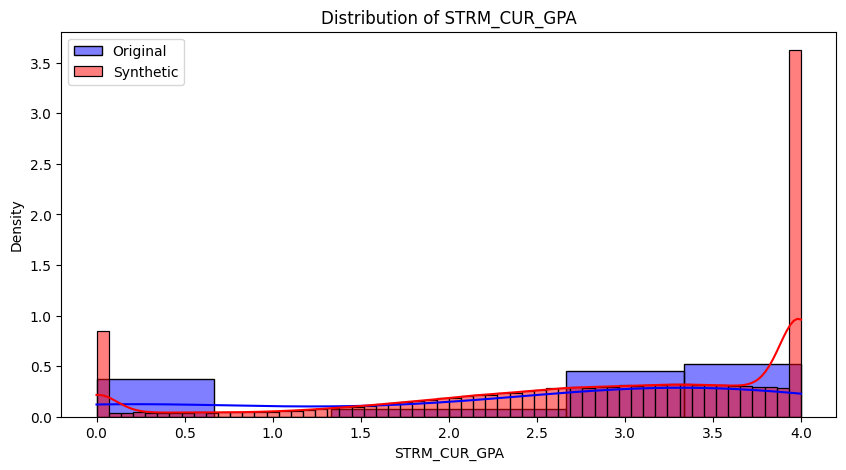

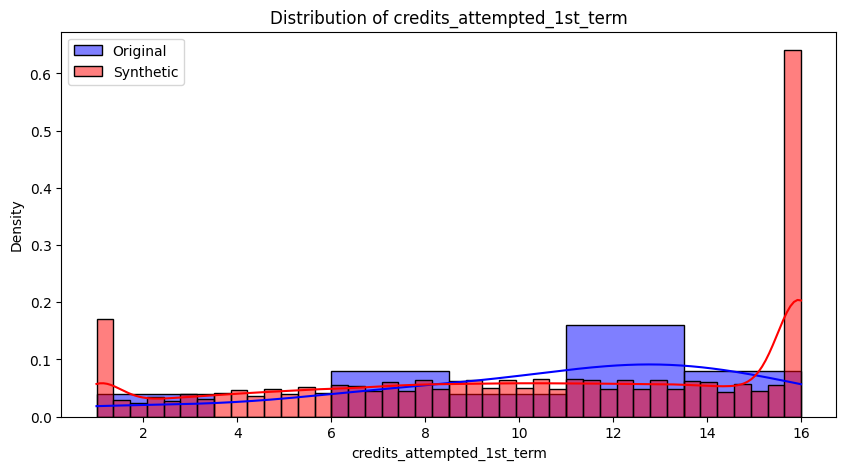

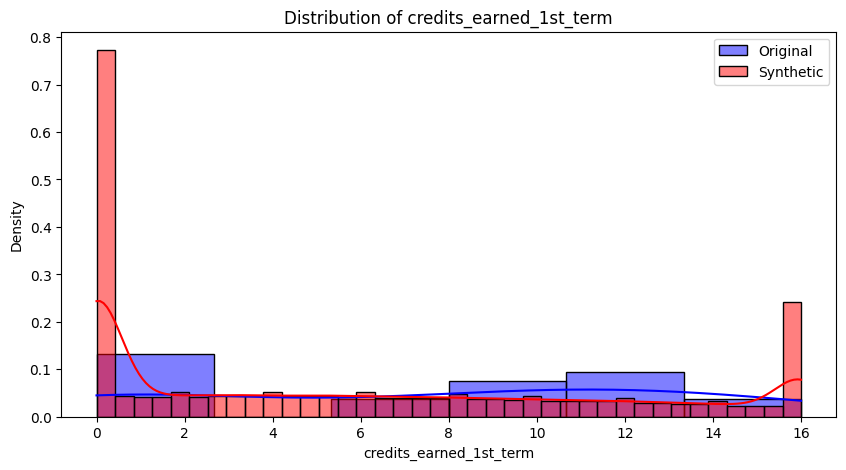

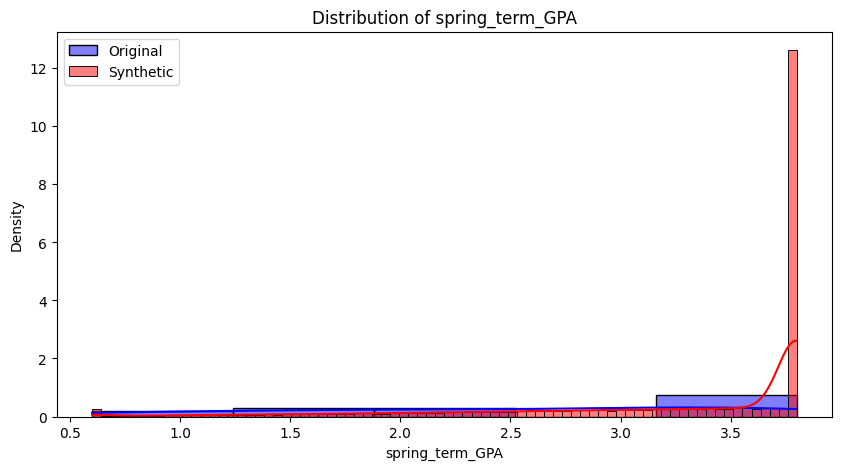

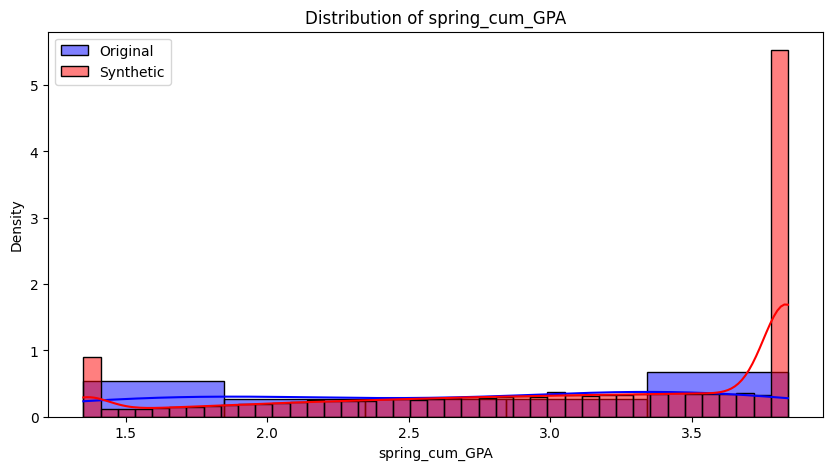

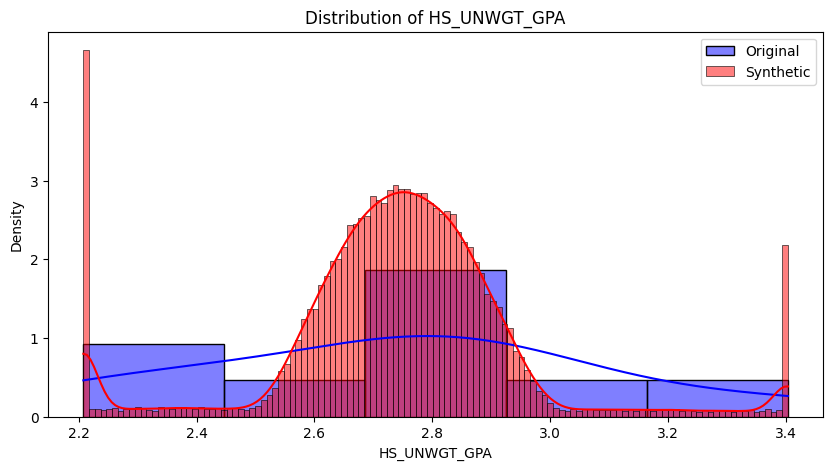

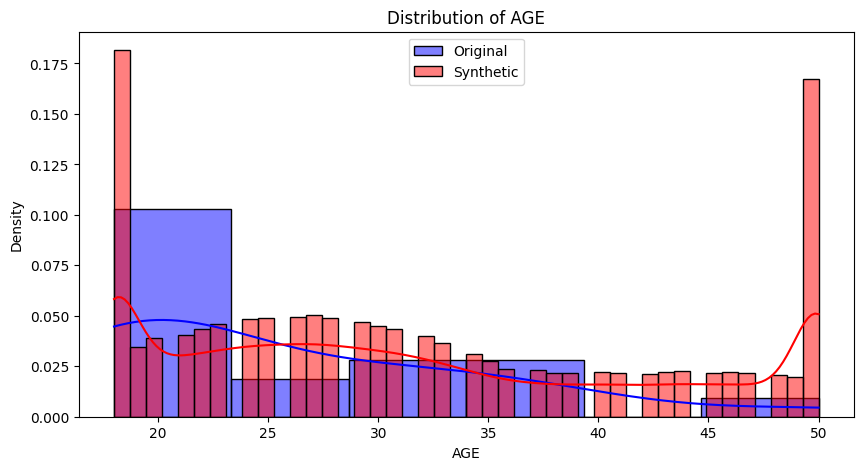

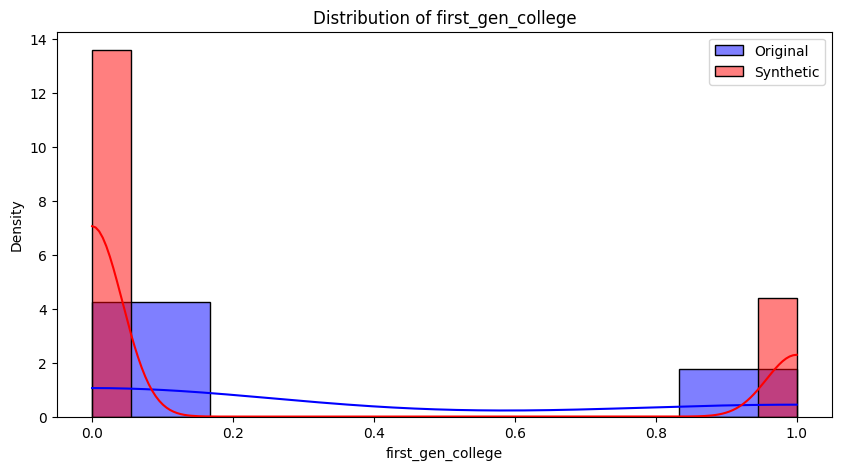

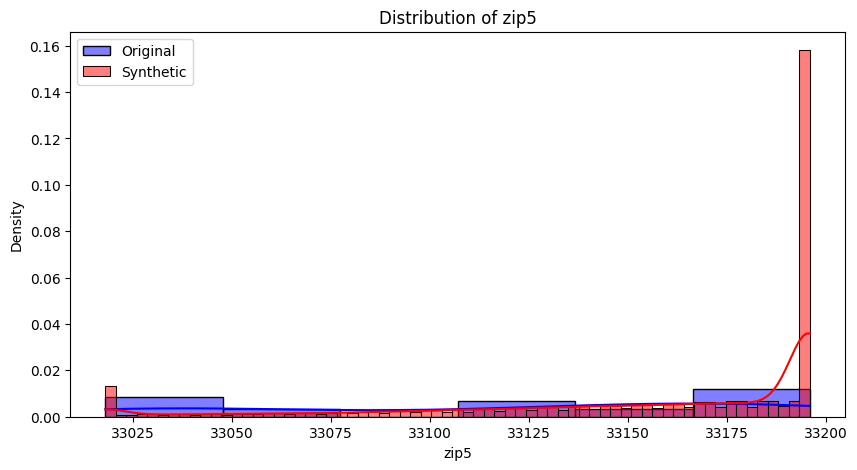

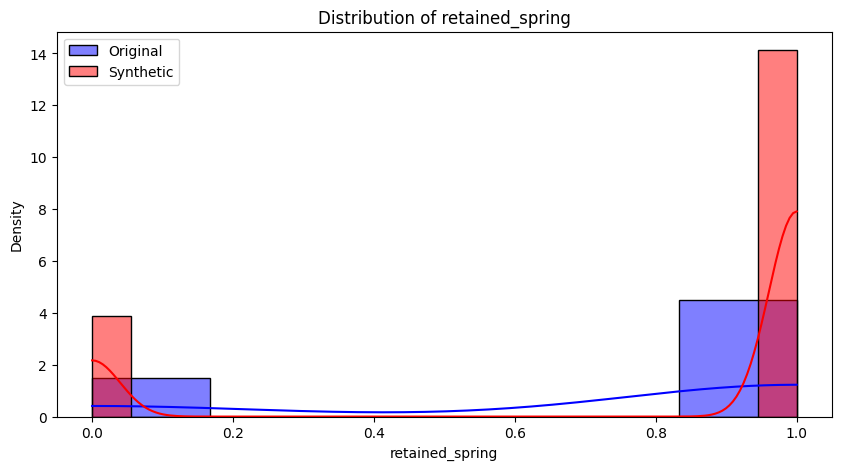

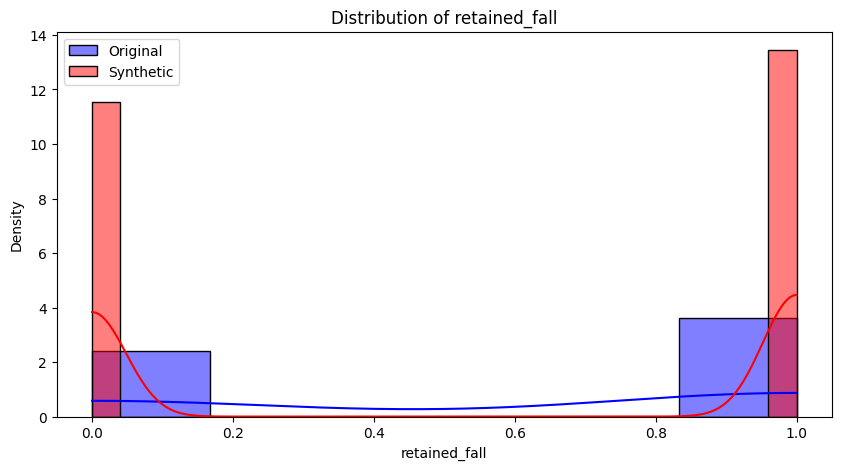

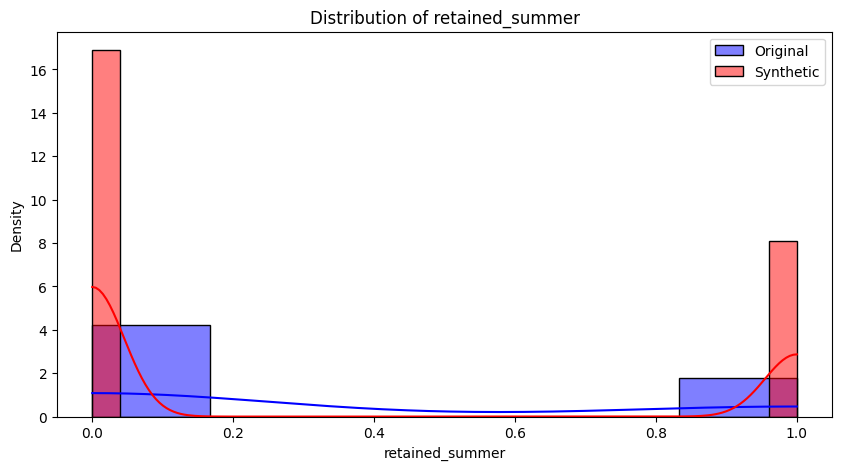

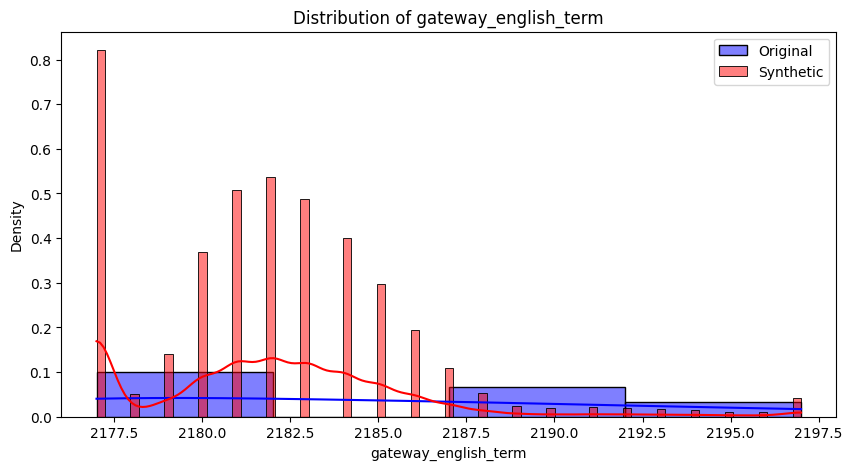

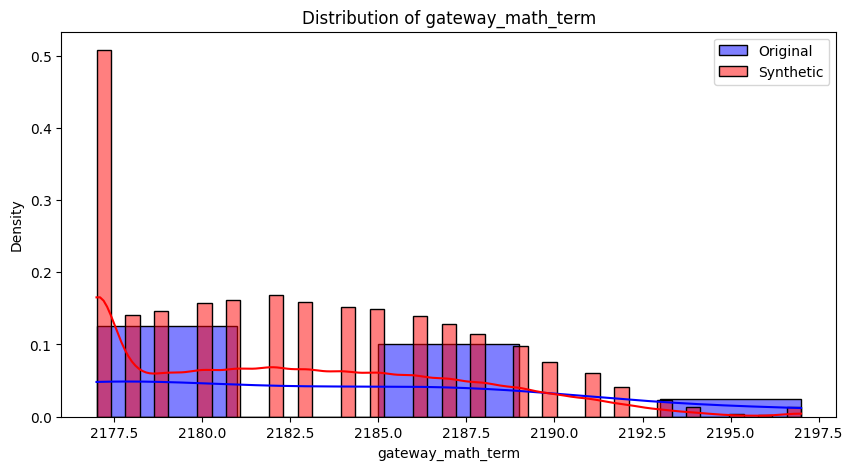

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


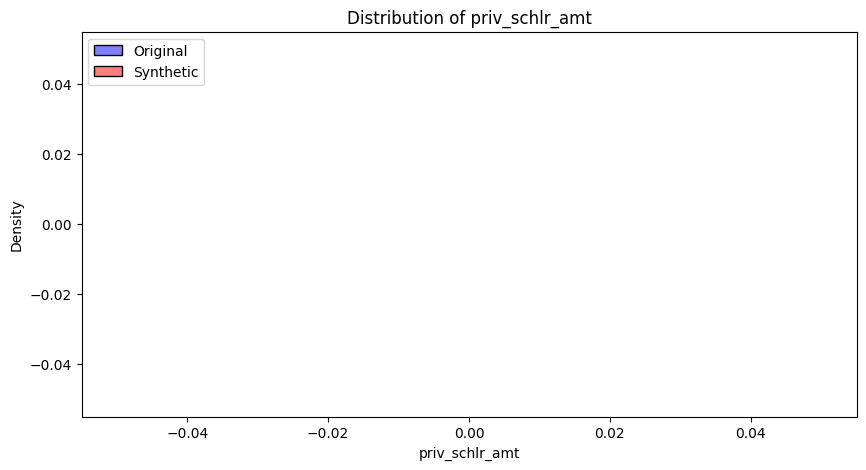

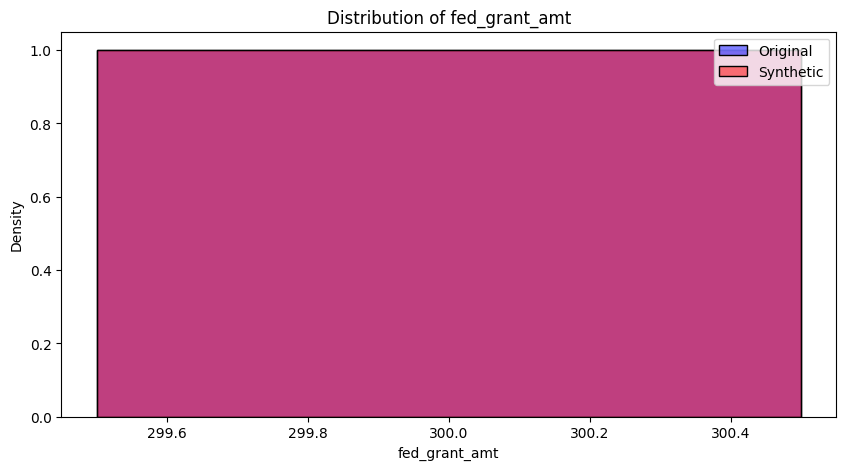

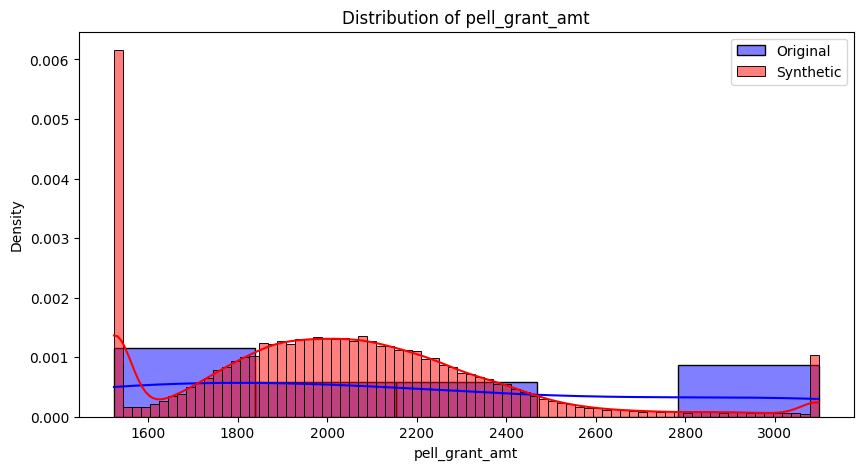

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


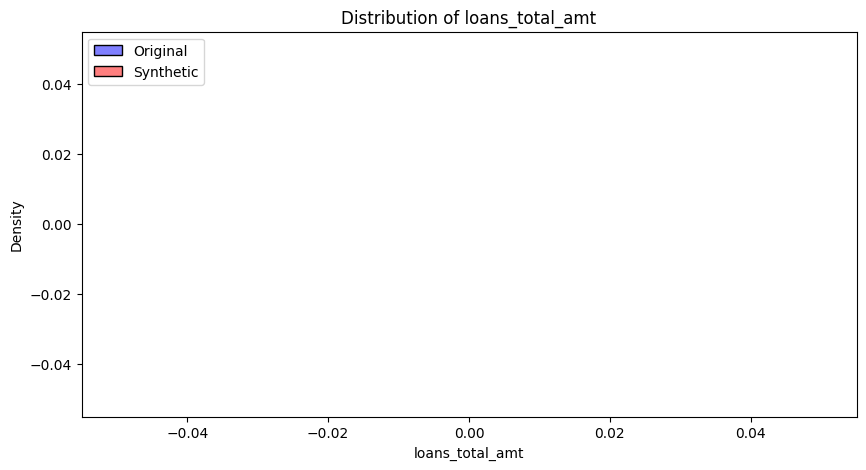

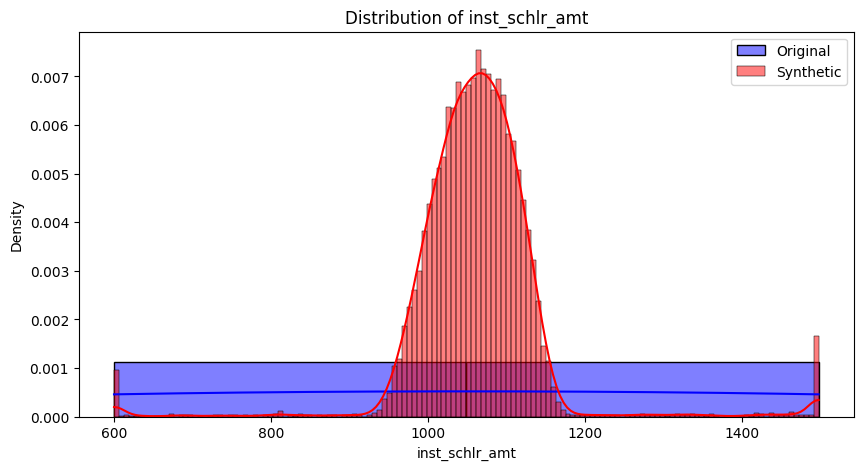

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


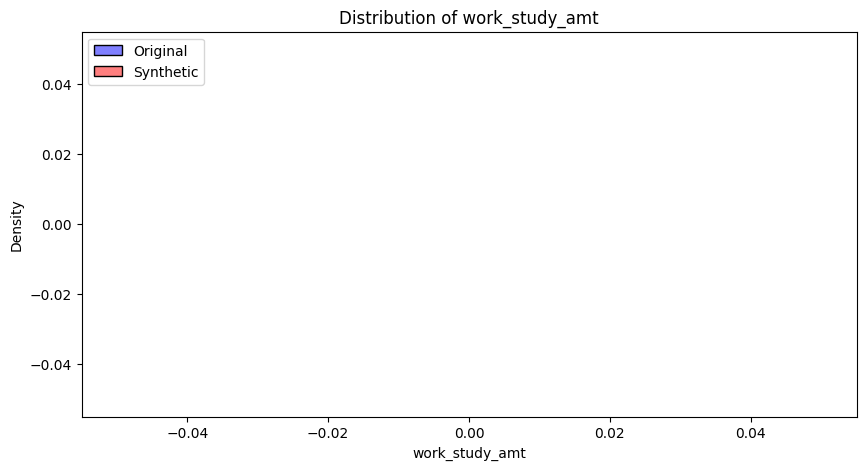

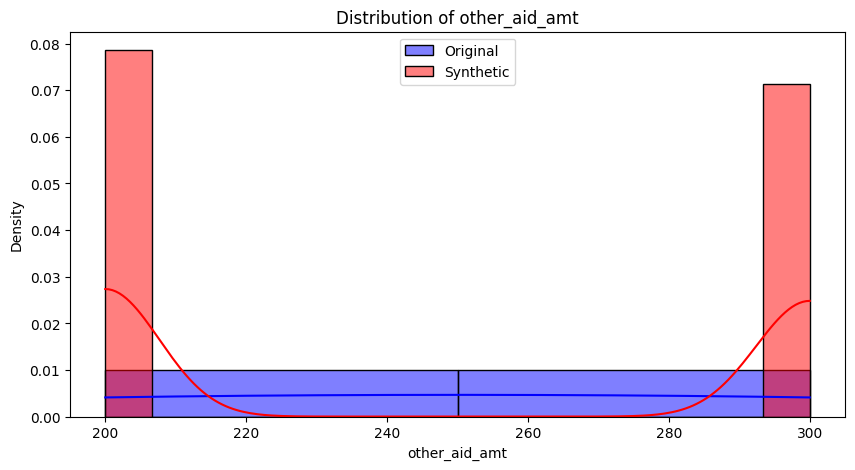

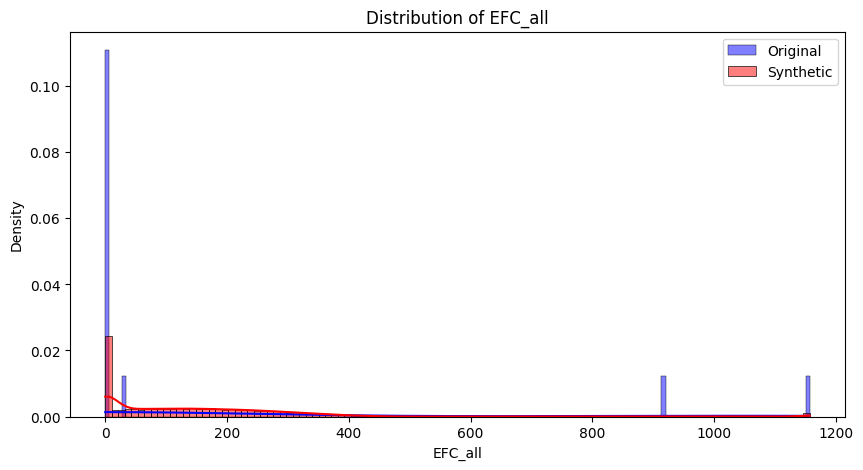

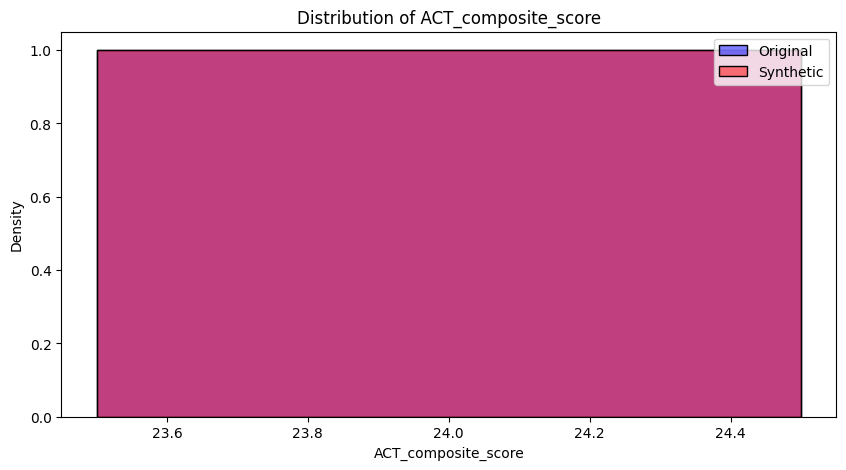

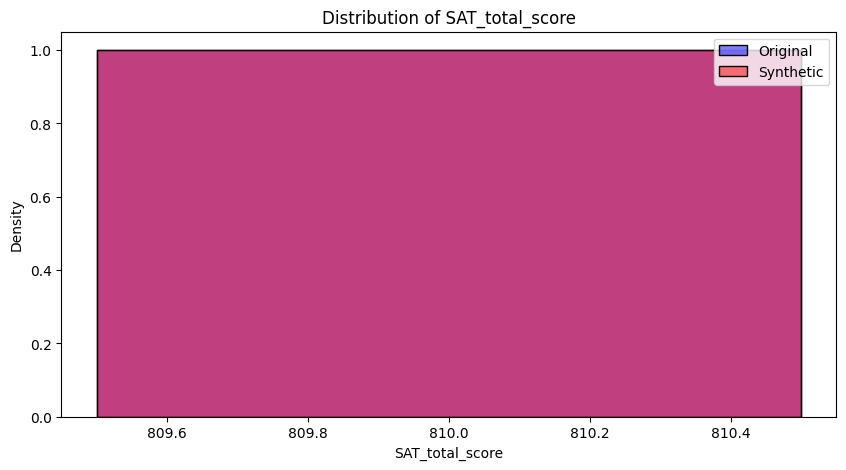

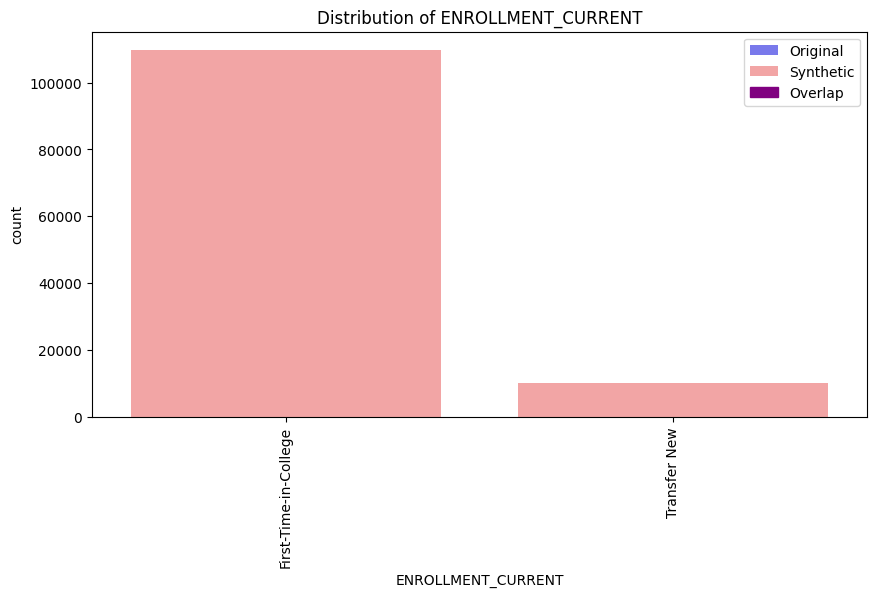

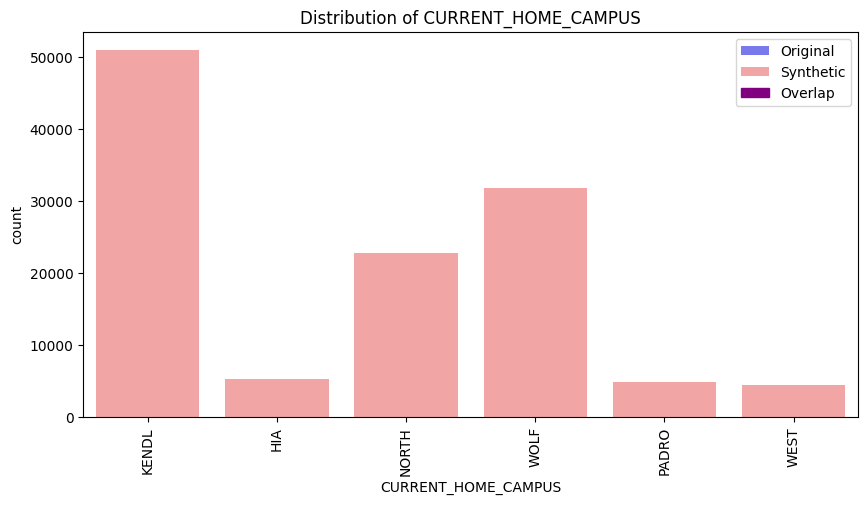

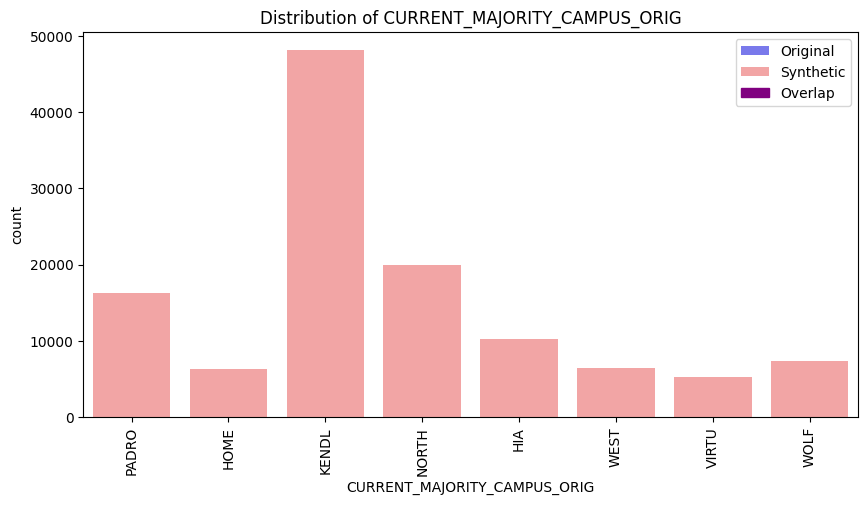

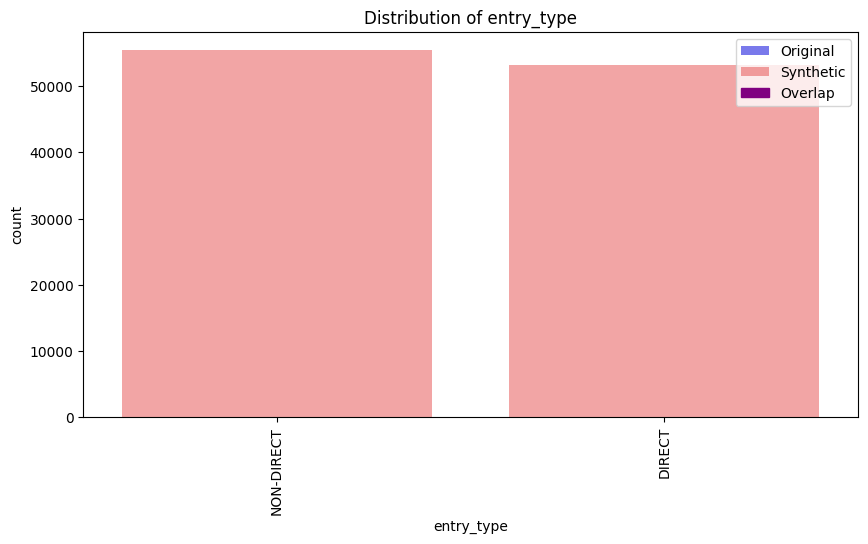

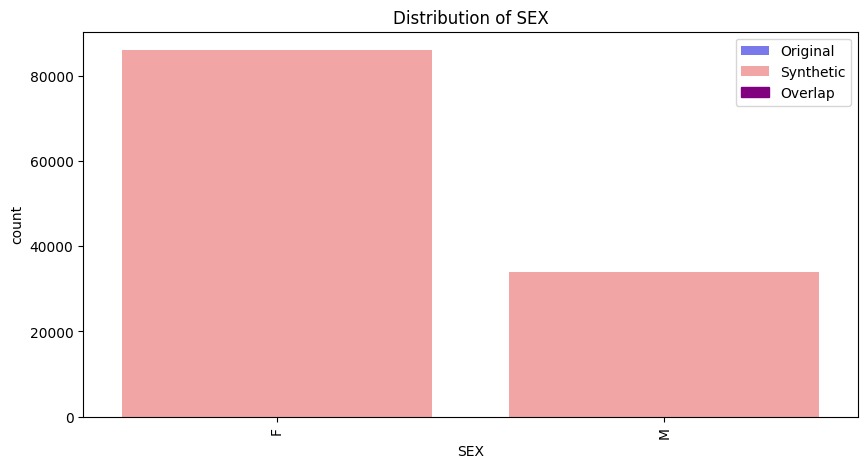

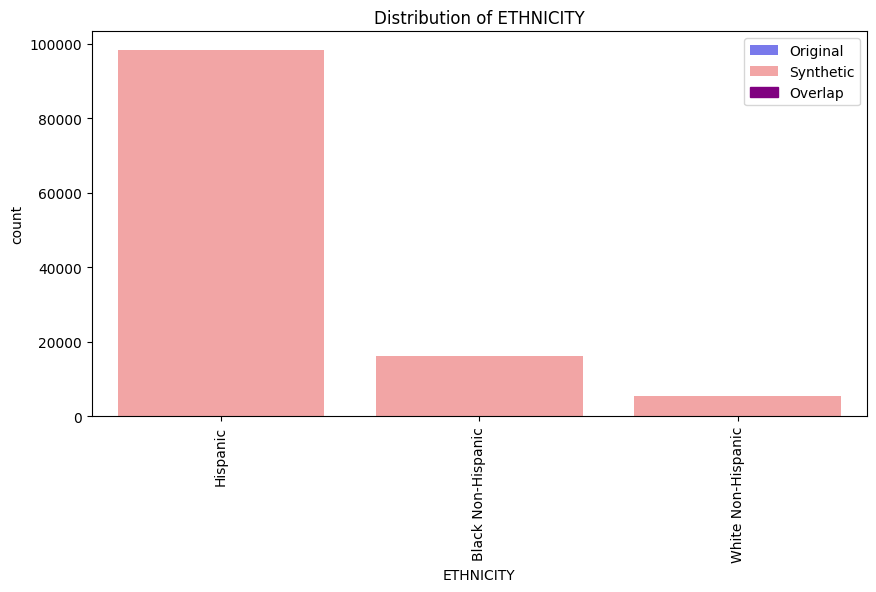

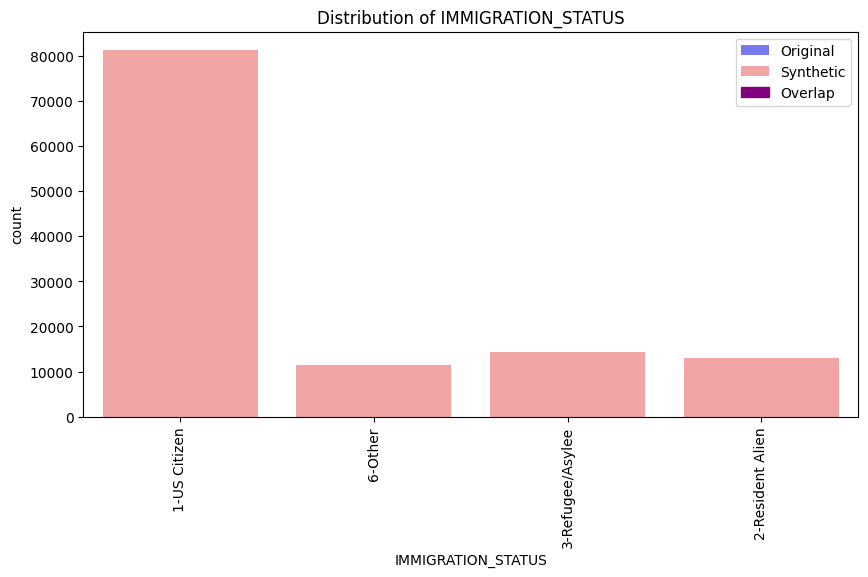

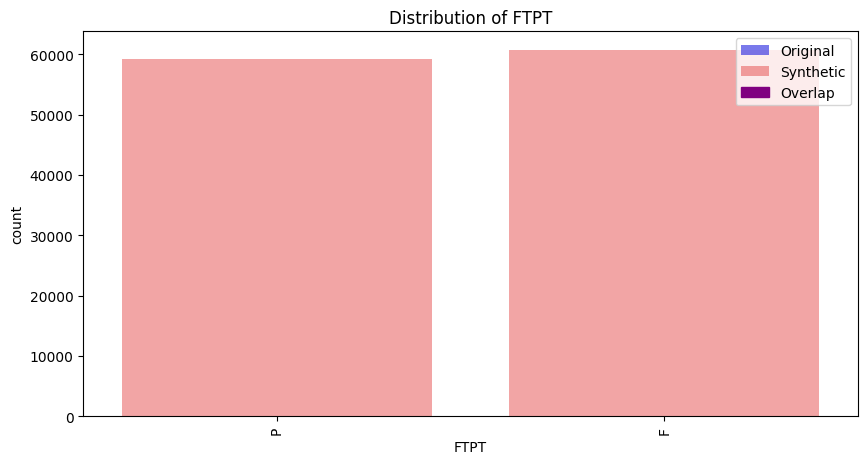

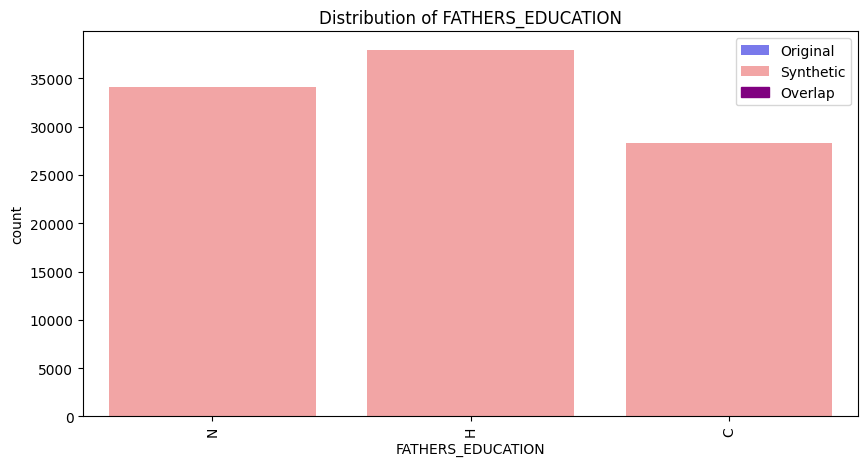

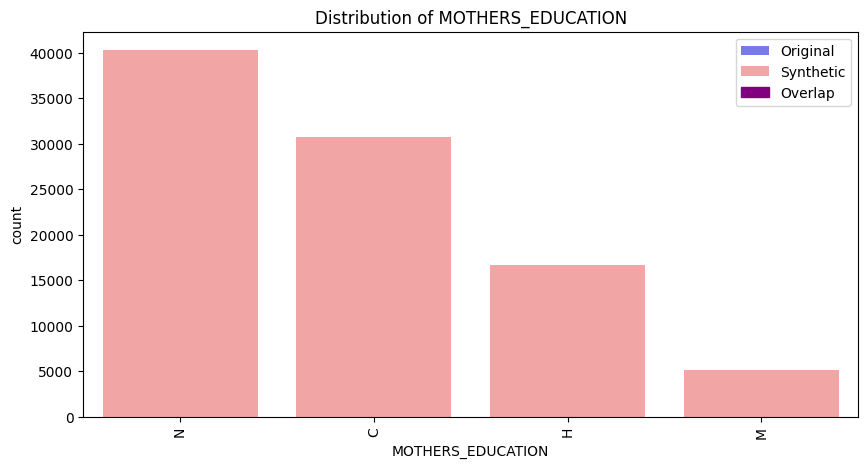

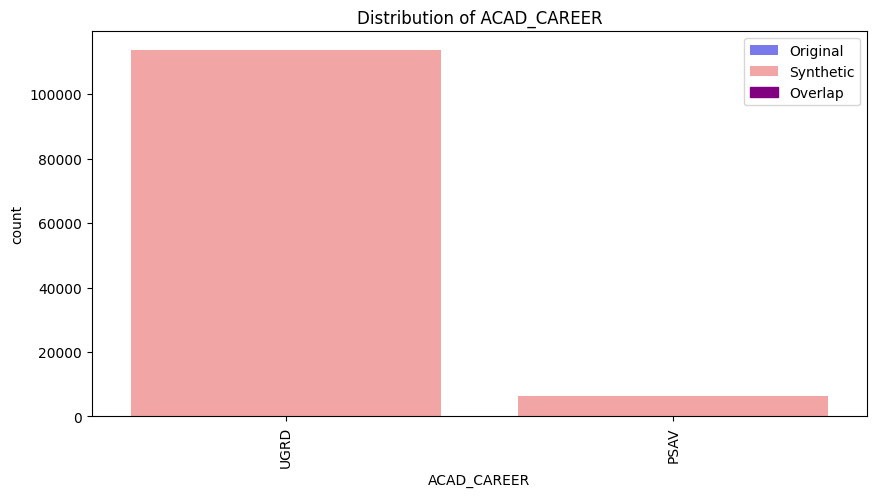

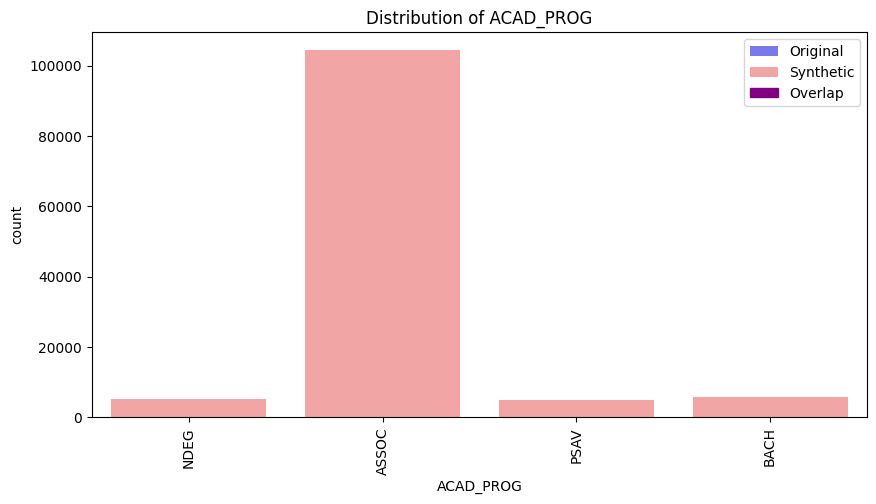

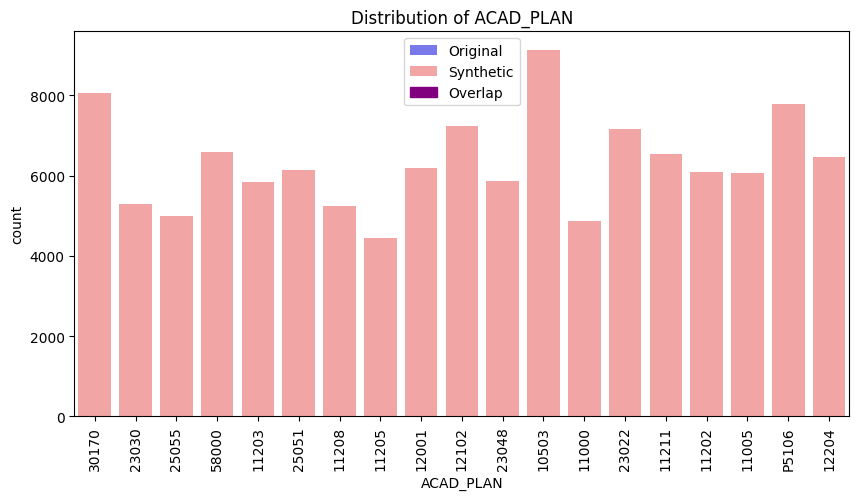

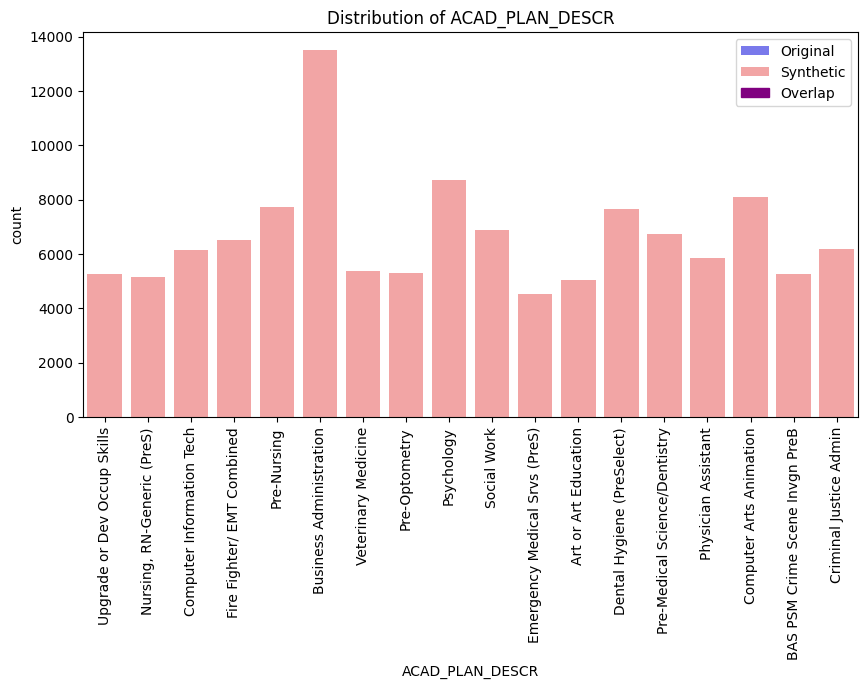

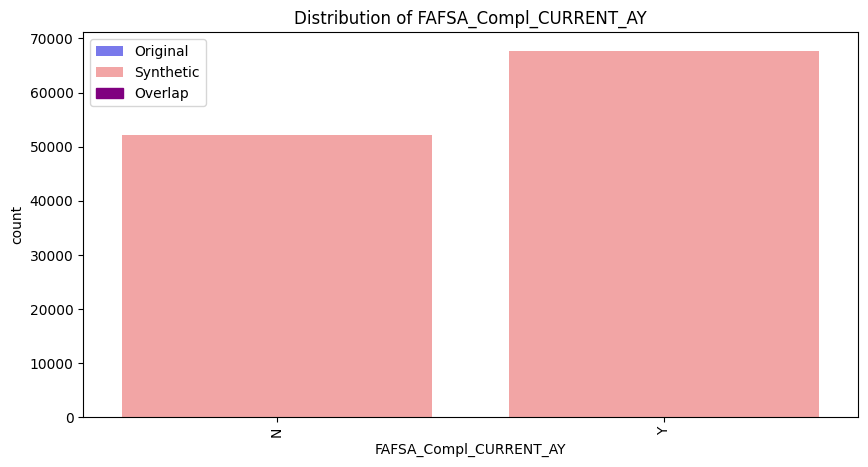

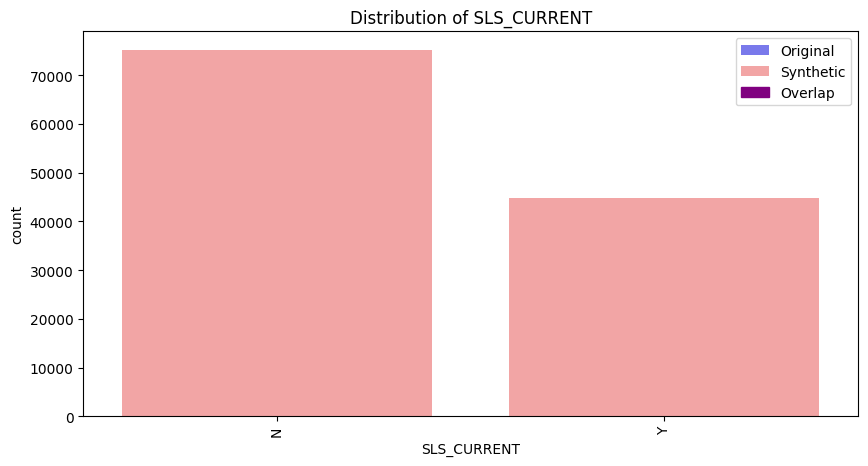

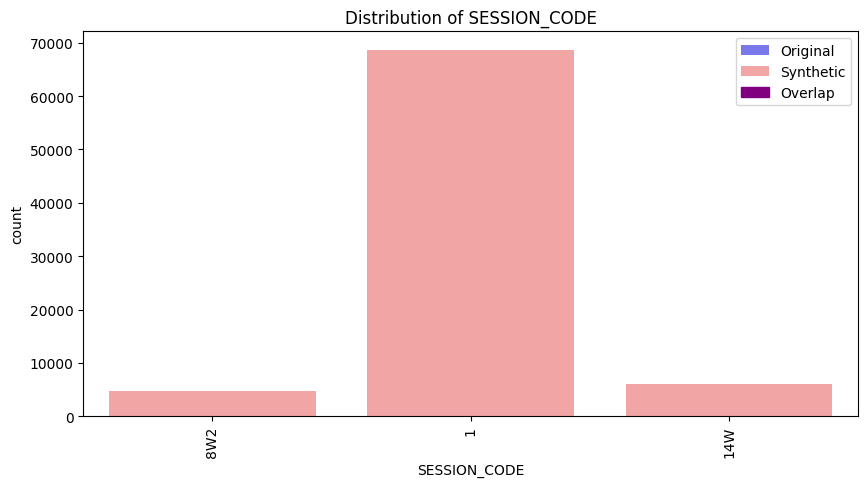

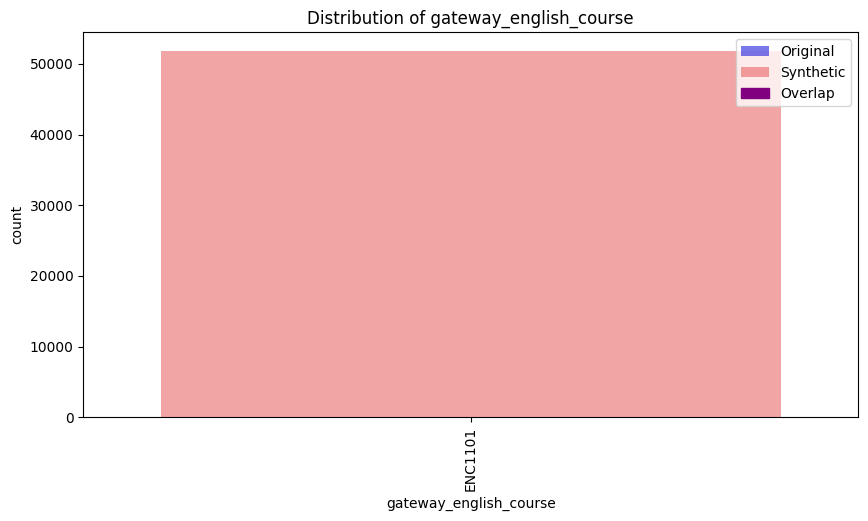

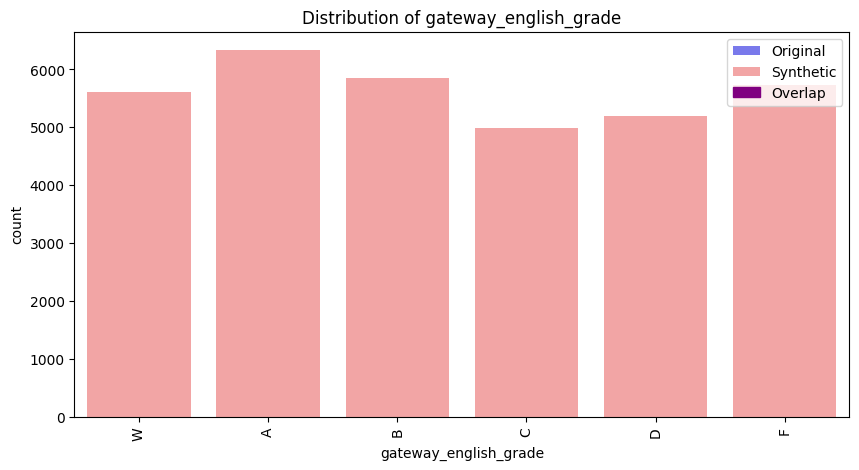

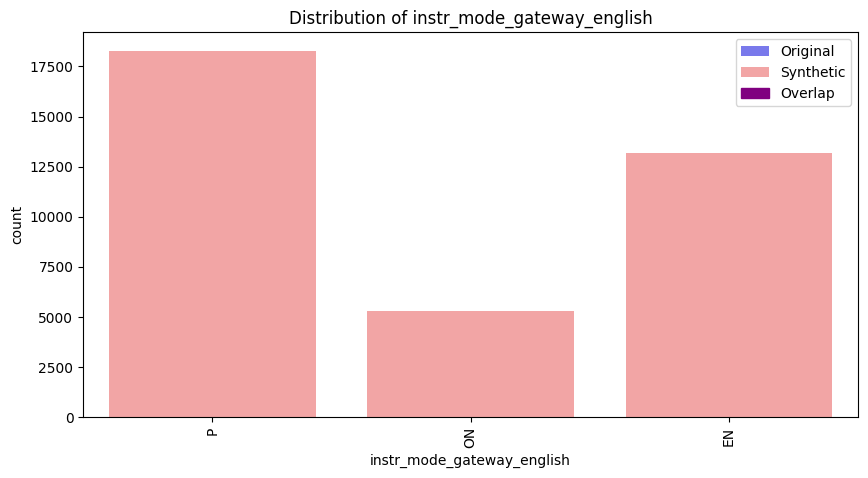

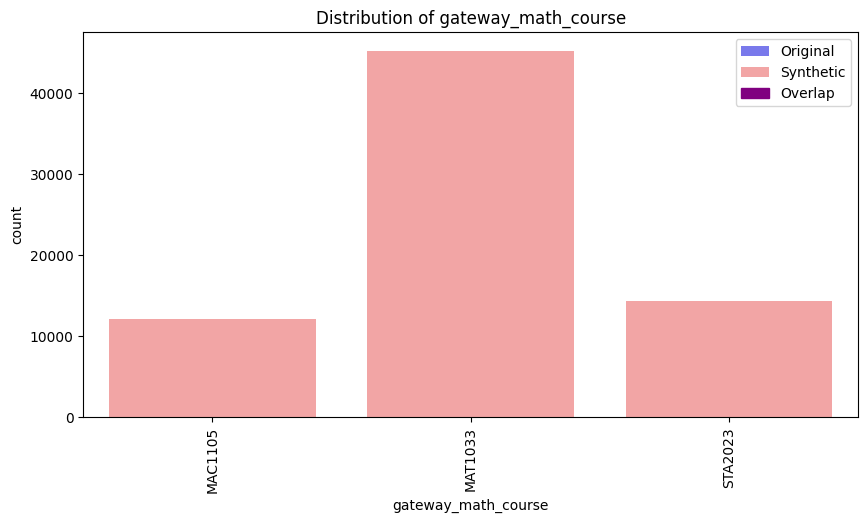

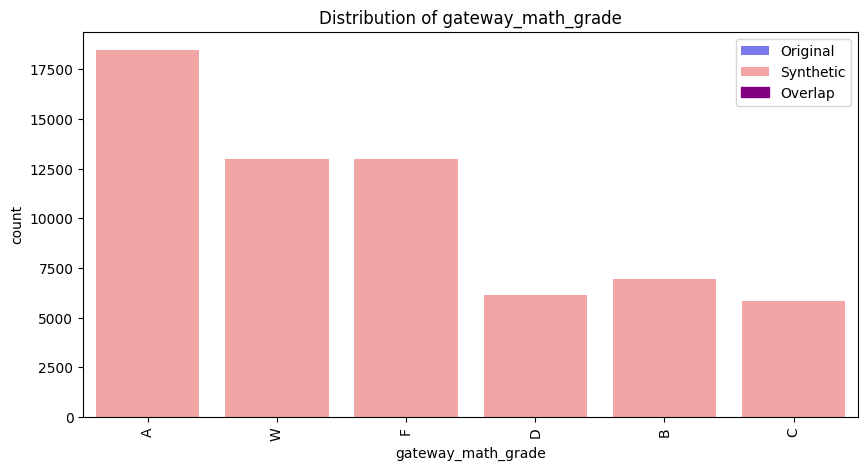

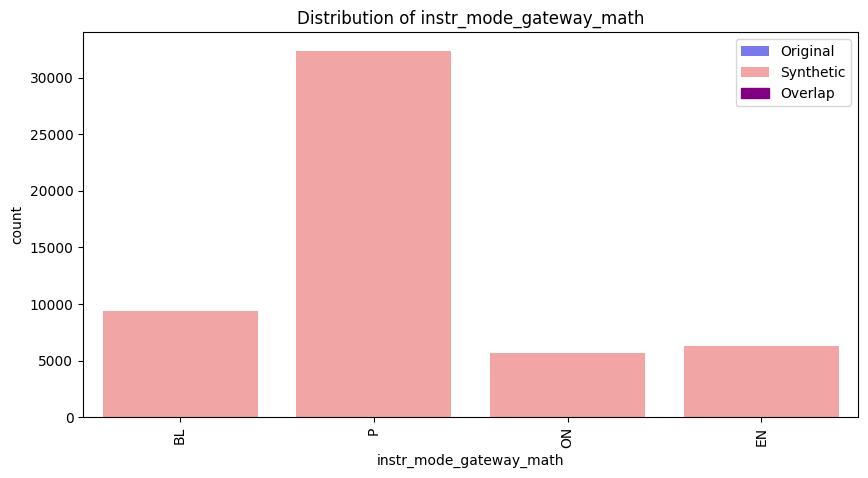

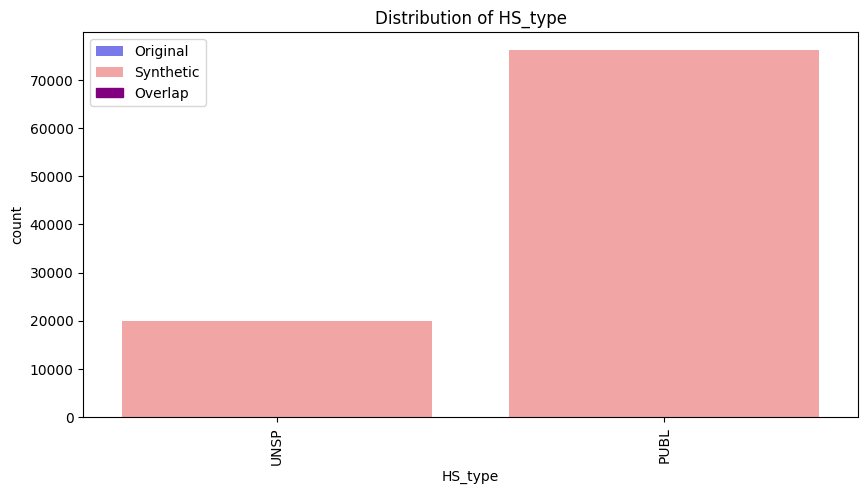

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` and `synthetic_data` are already loaded

# Function to plot comparison of distributions for numerical columns
def plot_distribution_comparison(original, synthetic, column):
    plt.figure(figsize=(10, 5))
    sns.histplot(original[column], color='blue', label='Original', kde=True, stat="density")
    sns.histplot(synthetic[column], color='red', label='Synthetic', kde=True, stat="density")
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()

# Function to plot comparison of distributions for categorical columns
def plot_categorical_comparison(original, synthetic, column):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=original[column], color='blue', label='Original', alpha=0.6)
    sns.countplot(x=synthetic[column], color='red', label='Synthetic', alpha=0.4)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)  # Rotate x-axis labels
    handles, labels = plt.gca().get_legend_handles_labels()
    # Add a patch for the overlap (purple) if it exists
    from matplotlib.patches import Patch
    handles.append(Patch(color='purple', label='Overlap'))
    plt.legend(handles=handles)
    plt.show()

# Example numerical column plot
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plot_distribution_comparison(data, synthetic_data, column)

# Example categorical column plot
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    plot_categorical_comparison(data, synthetic_data, column)


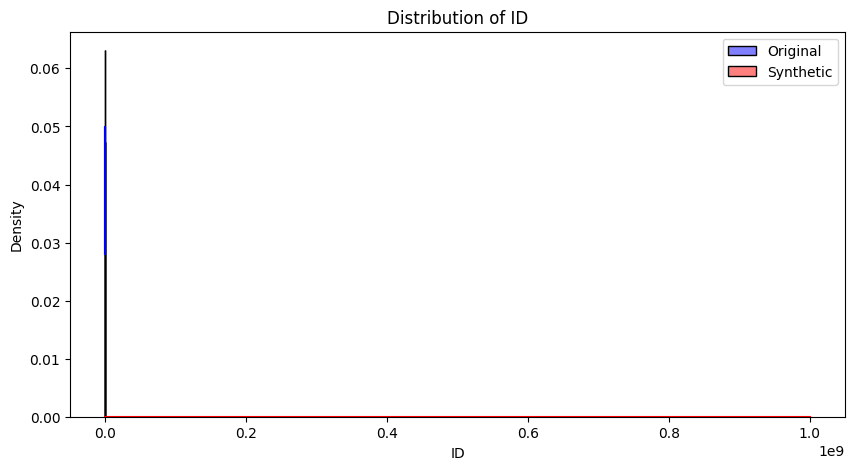

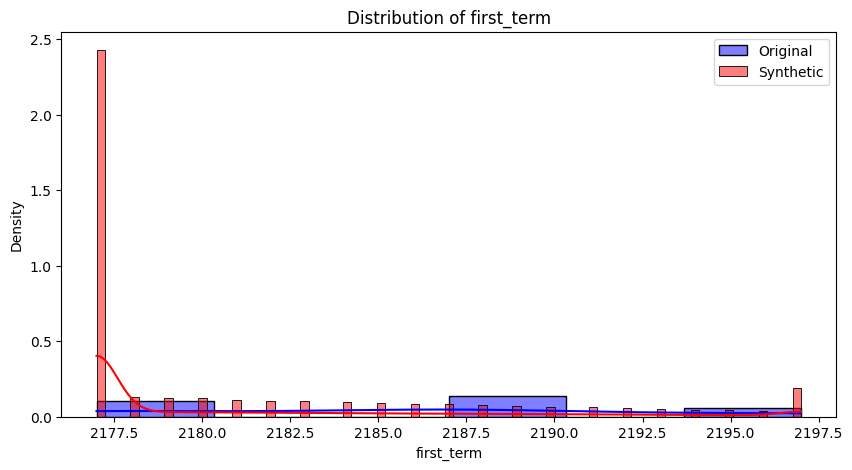

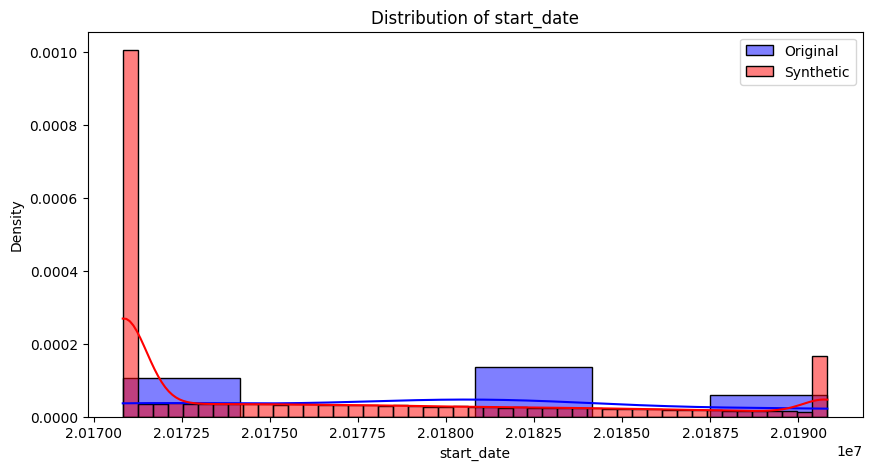

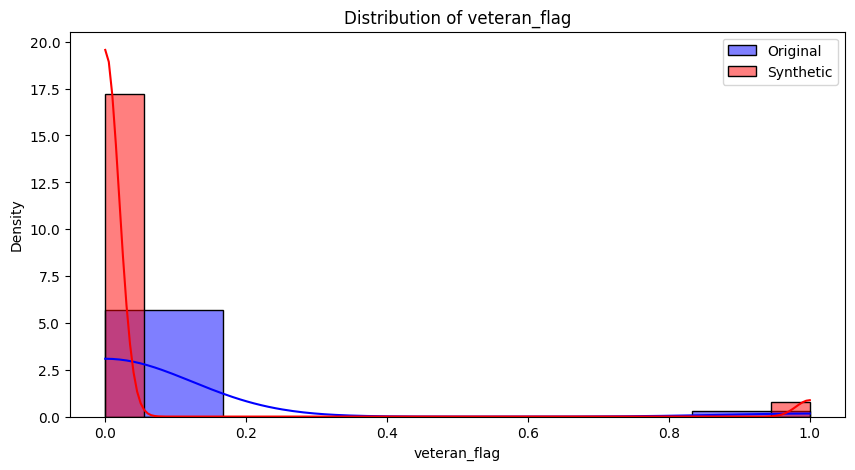

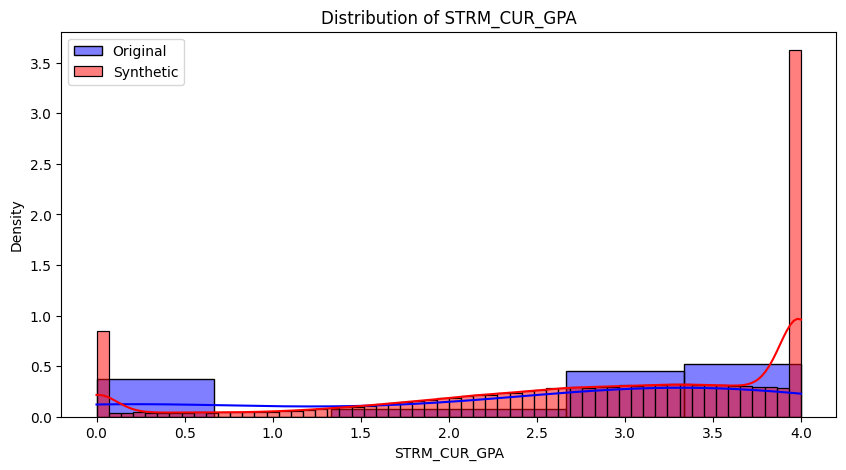

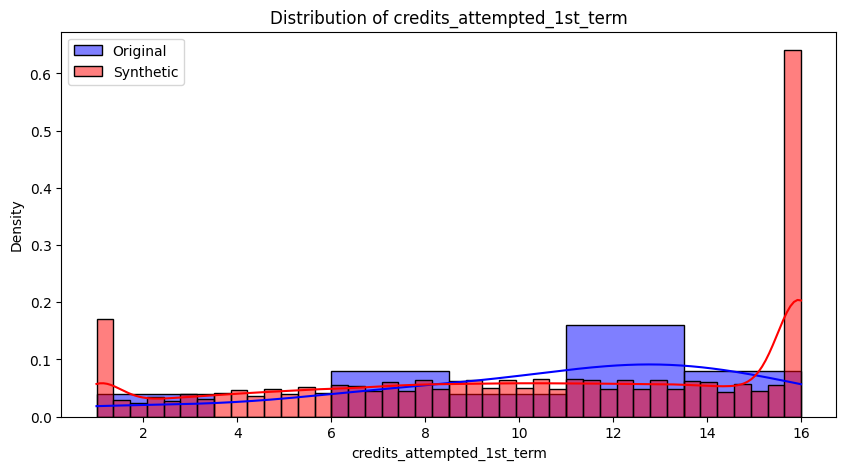

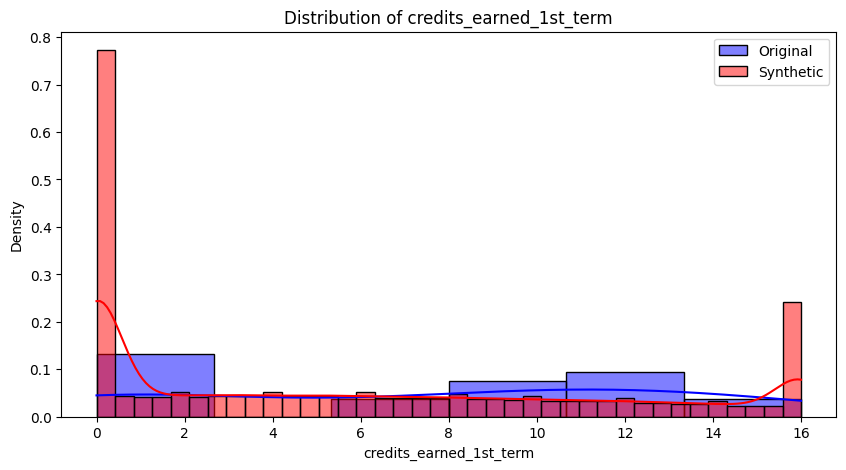

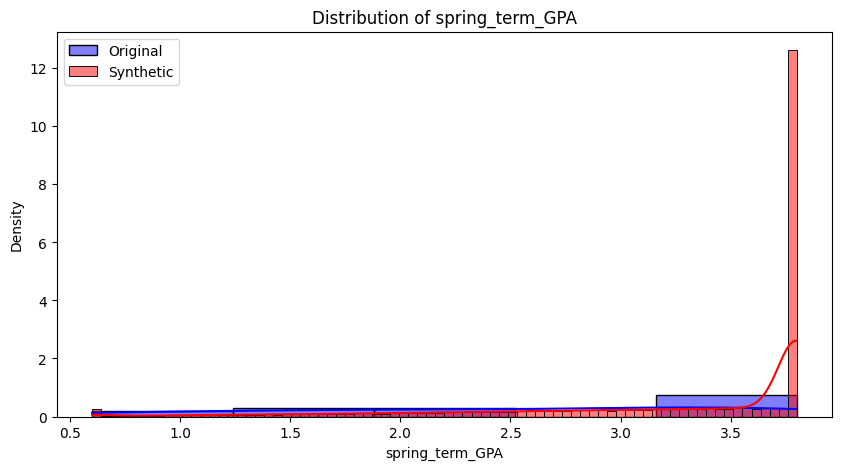

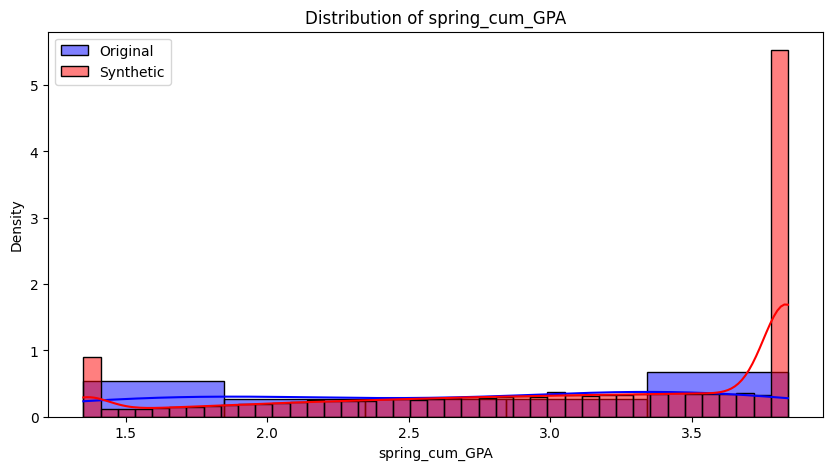

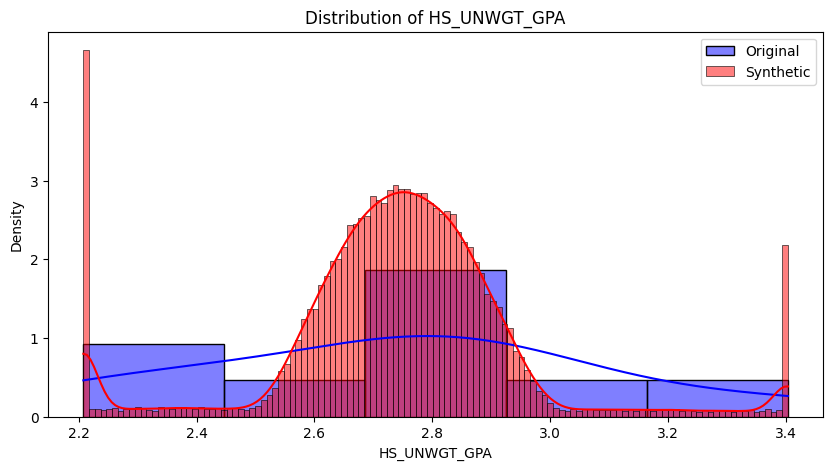

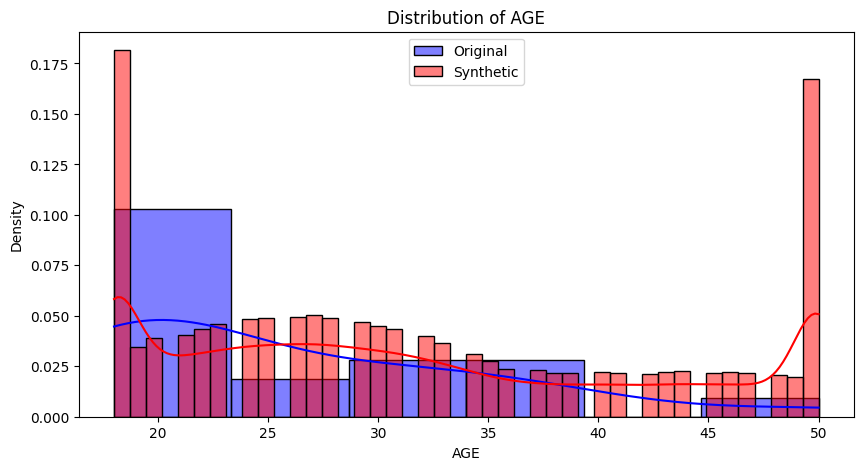

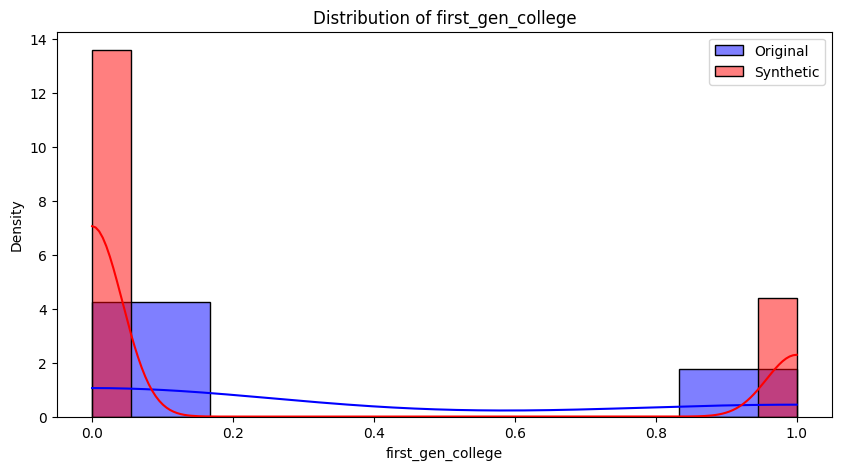

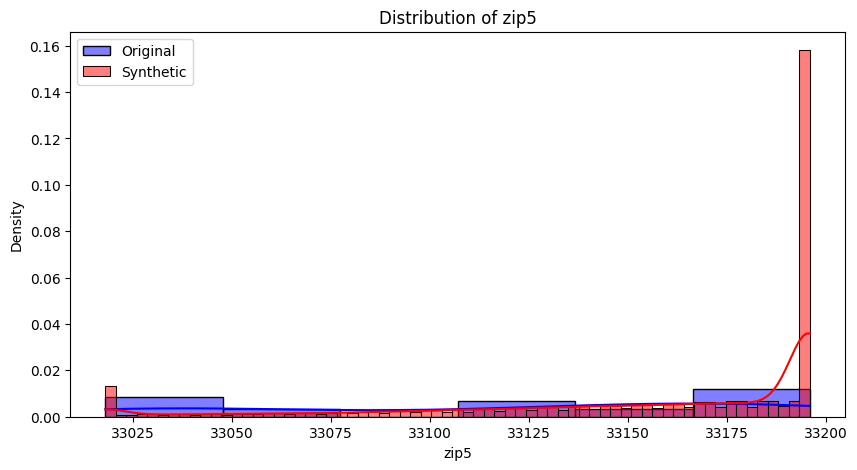

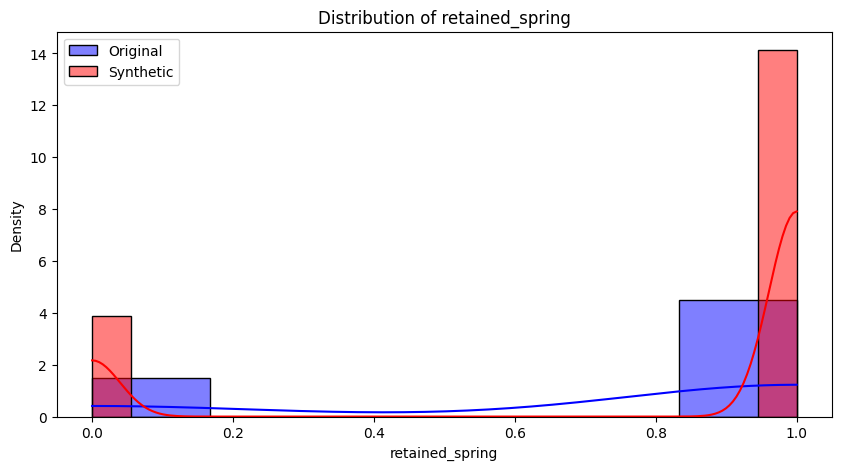

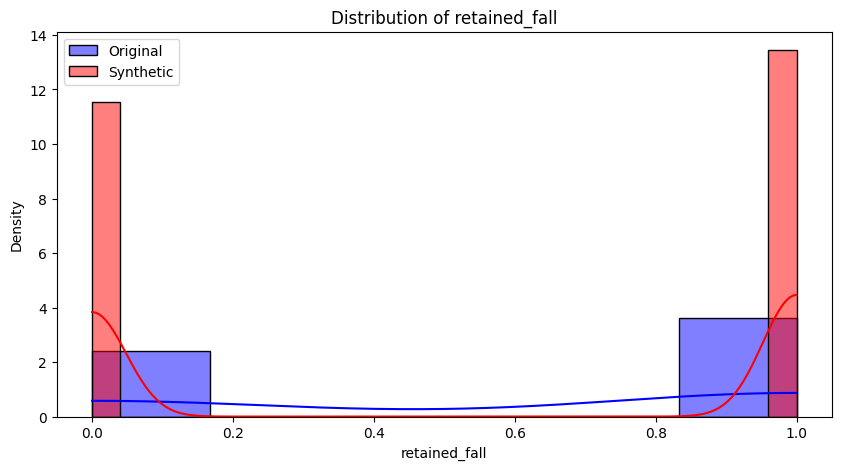

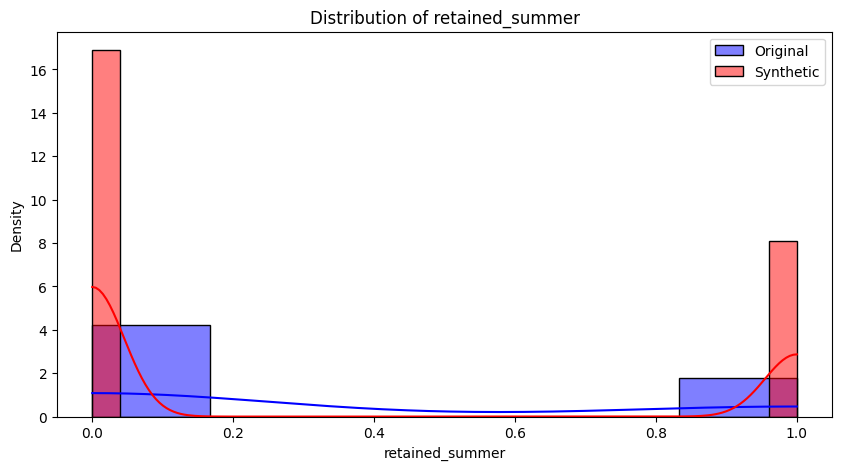

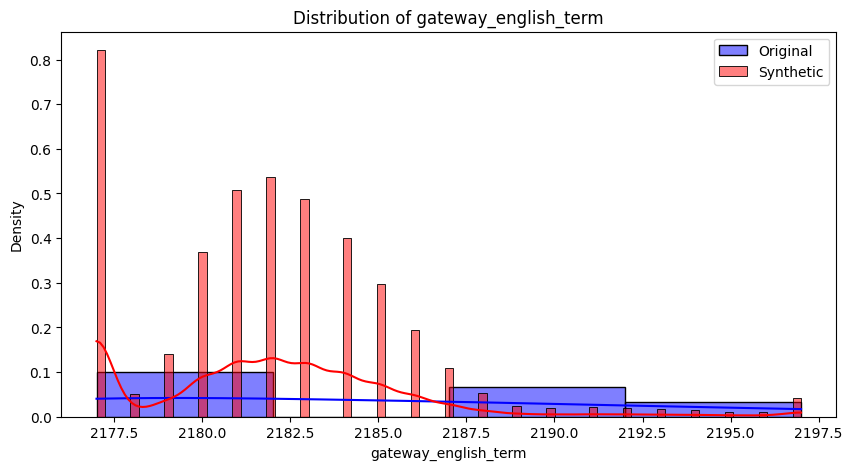

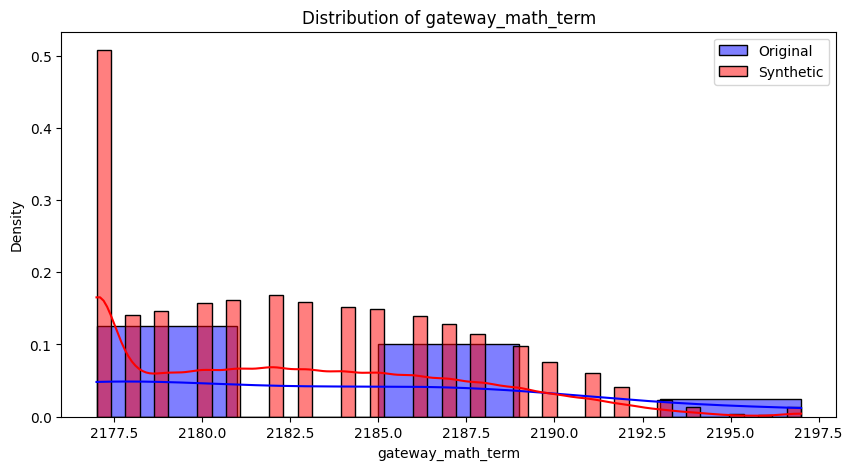

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


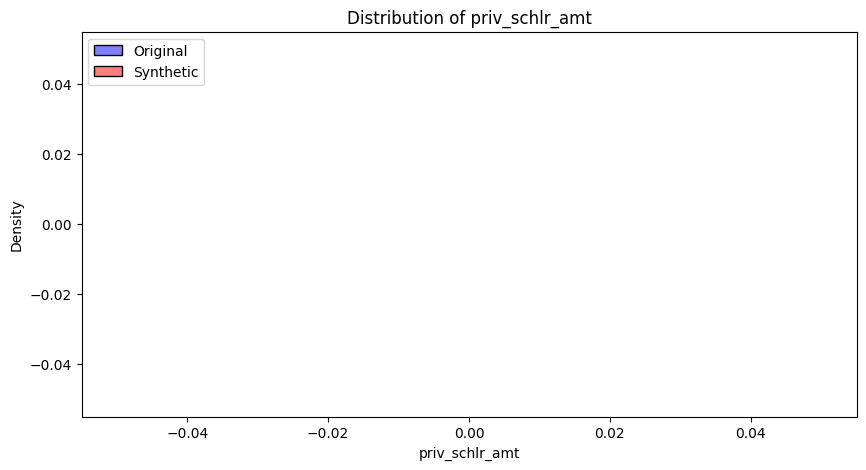

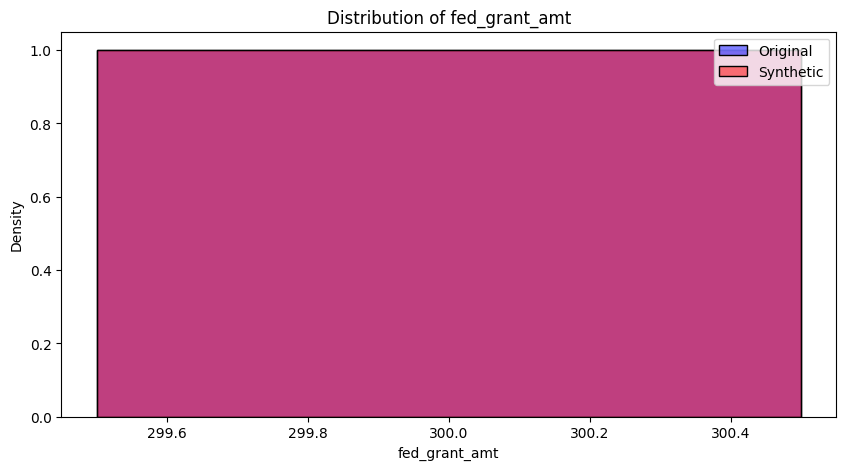

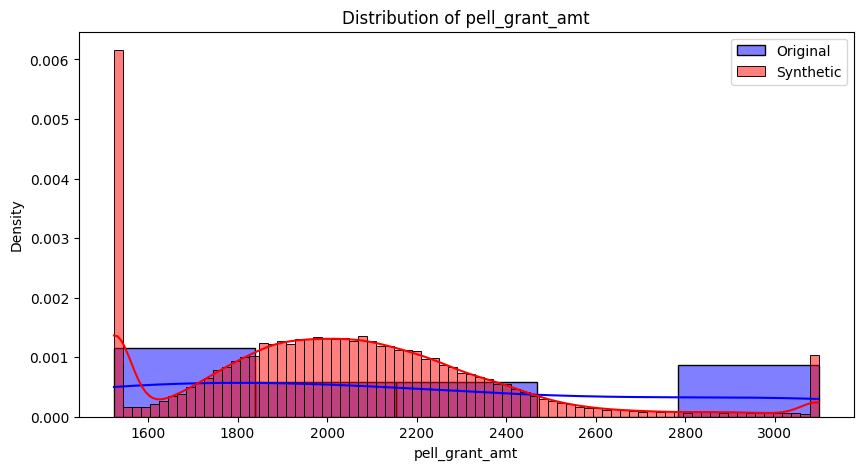

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


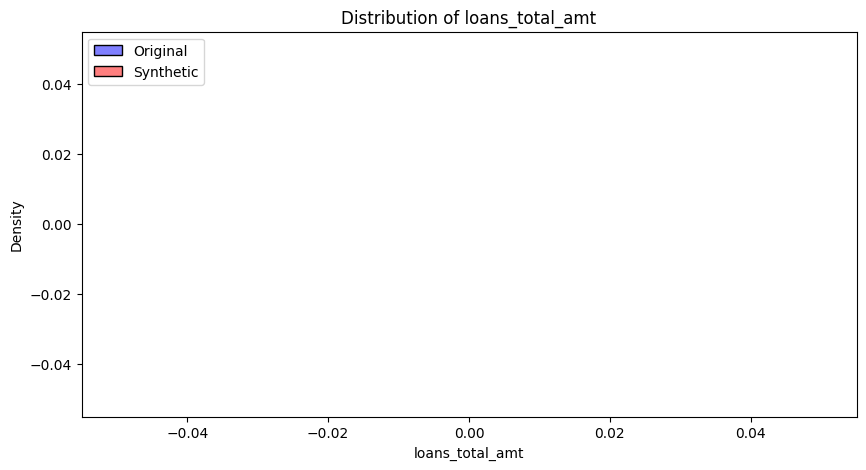

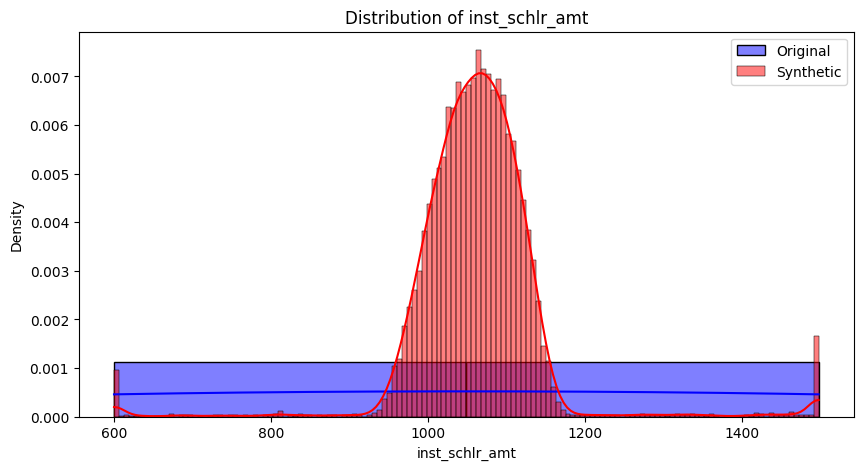

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


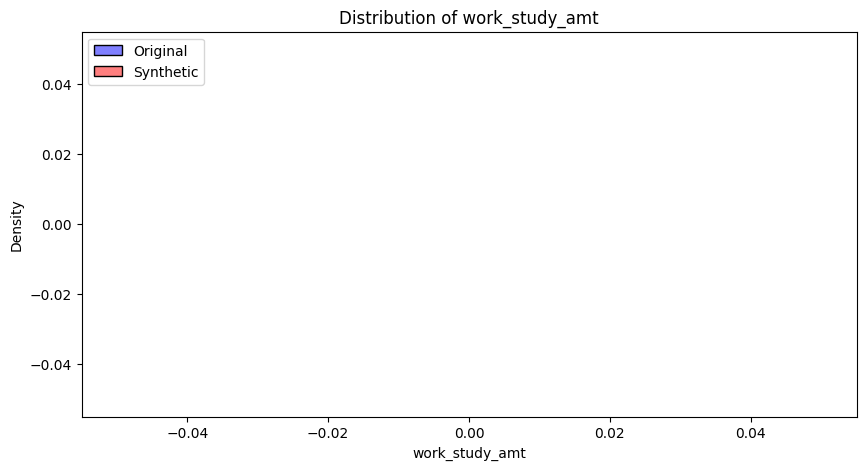

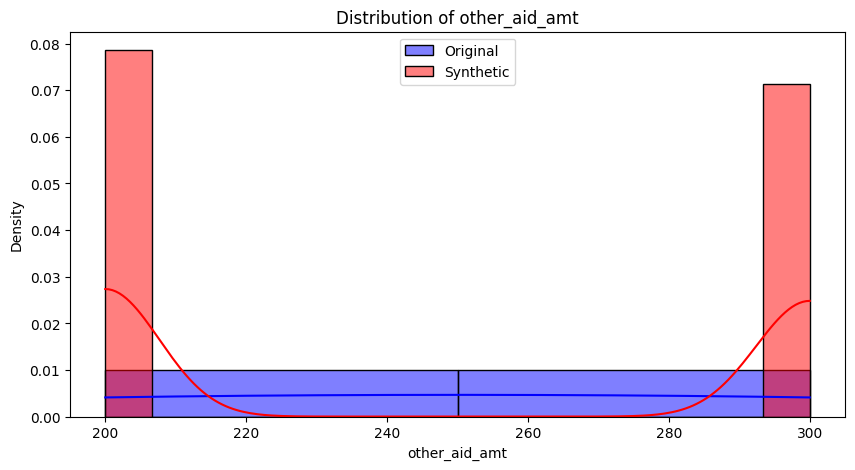

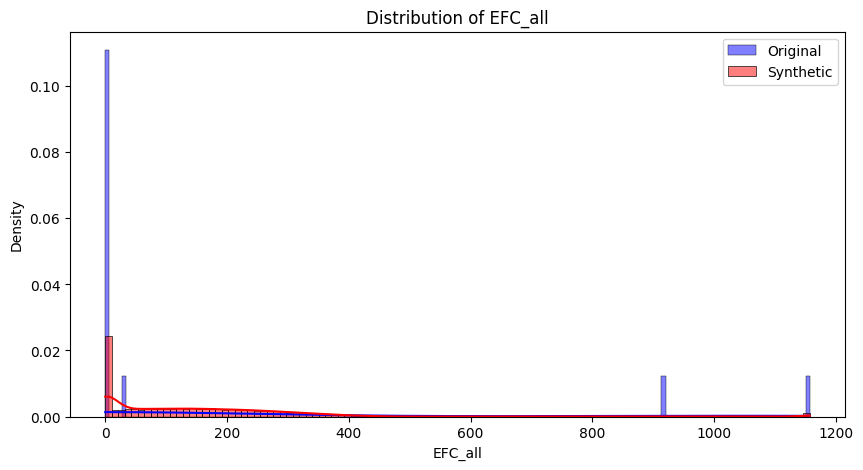

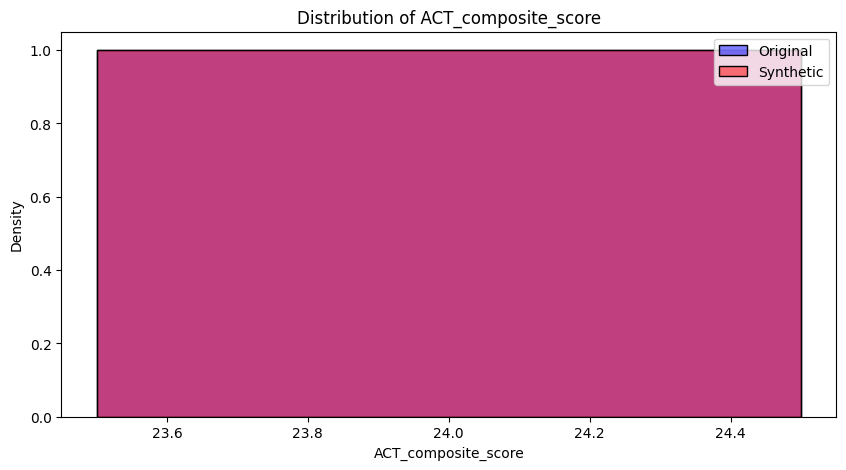

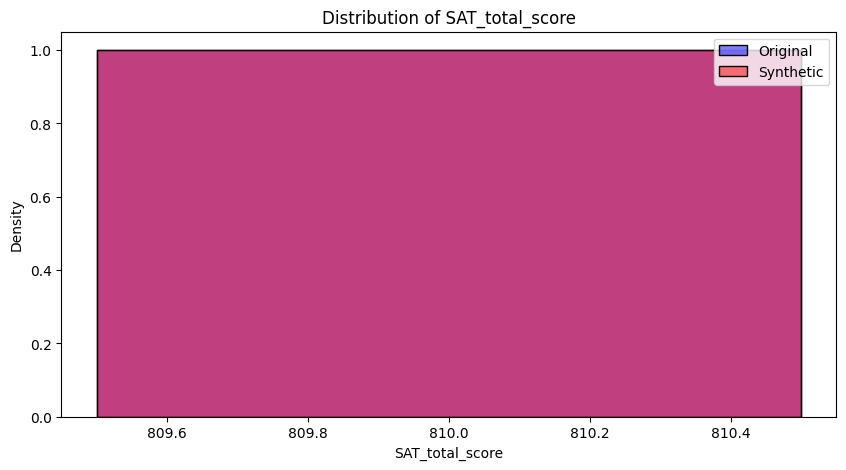

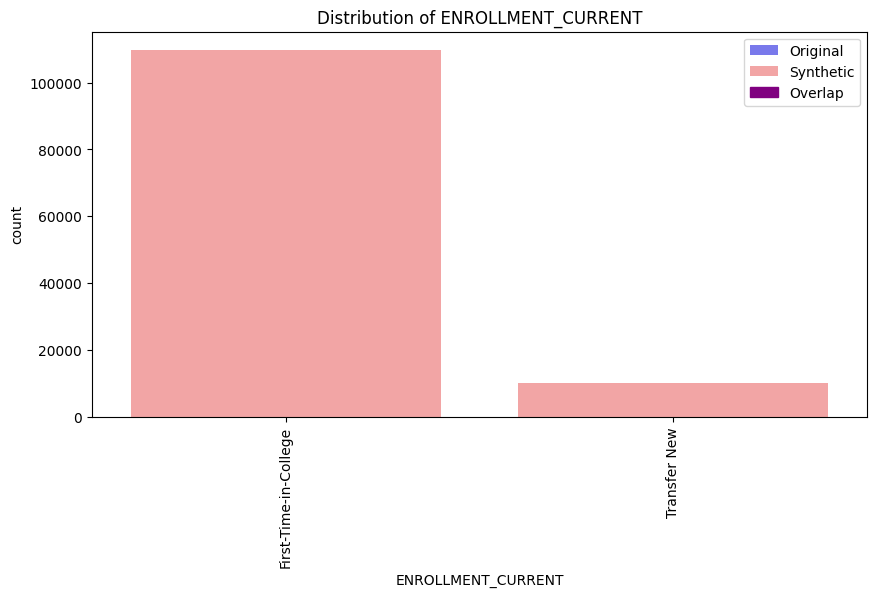

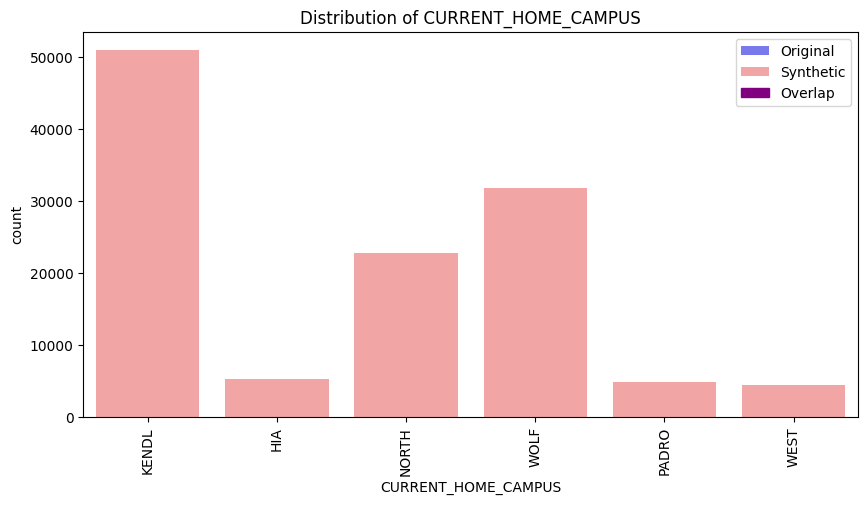

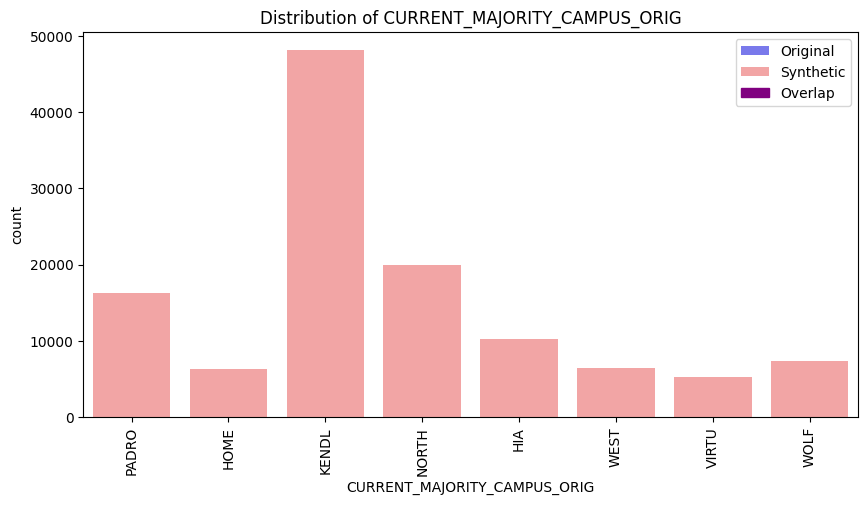

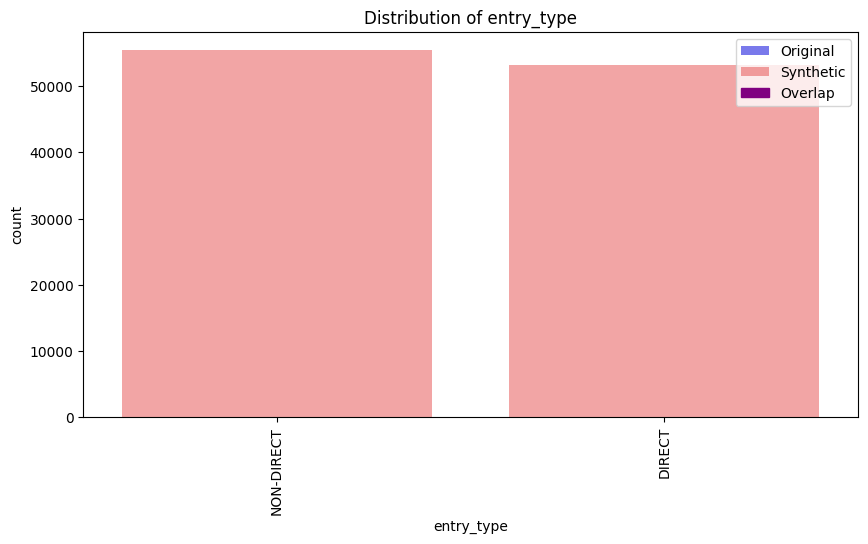

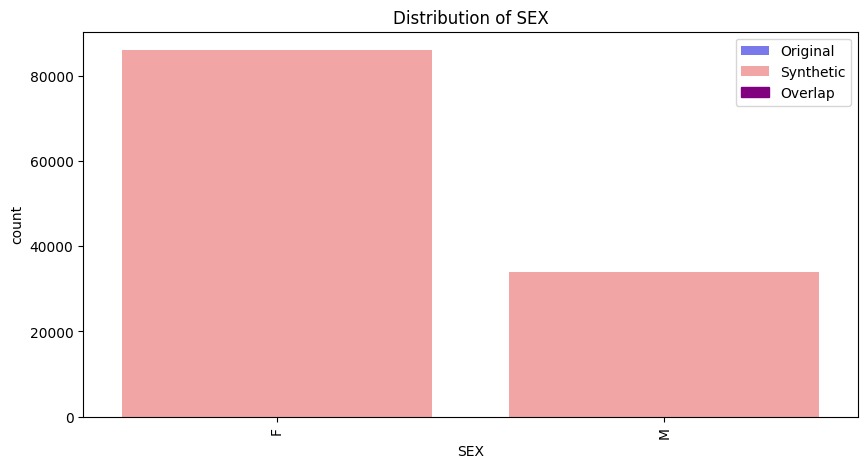

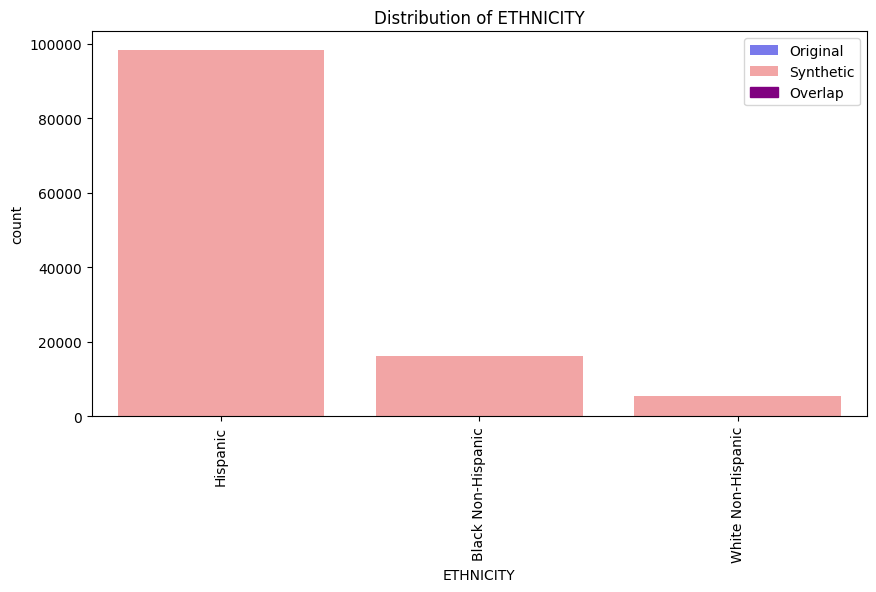

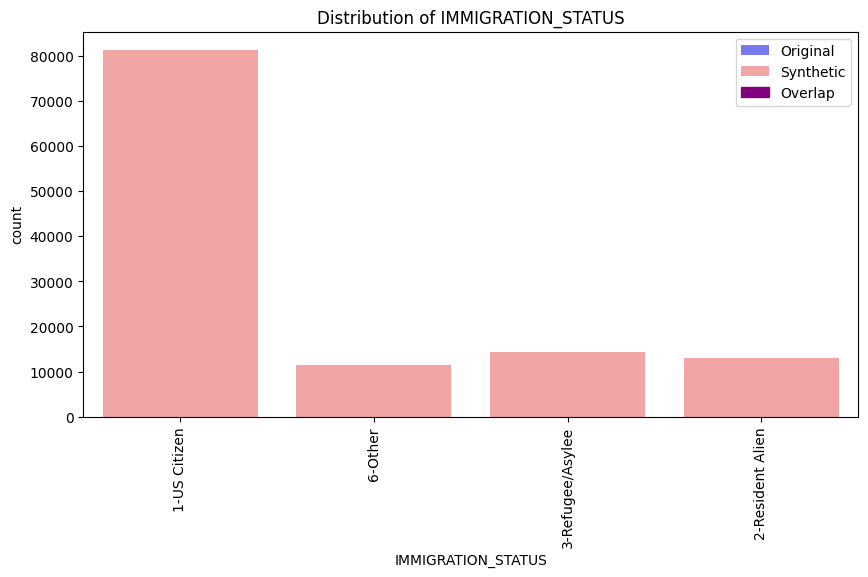

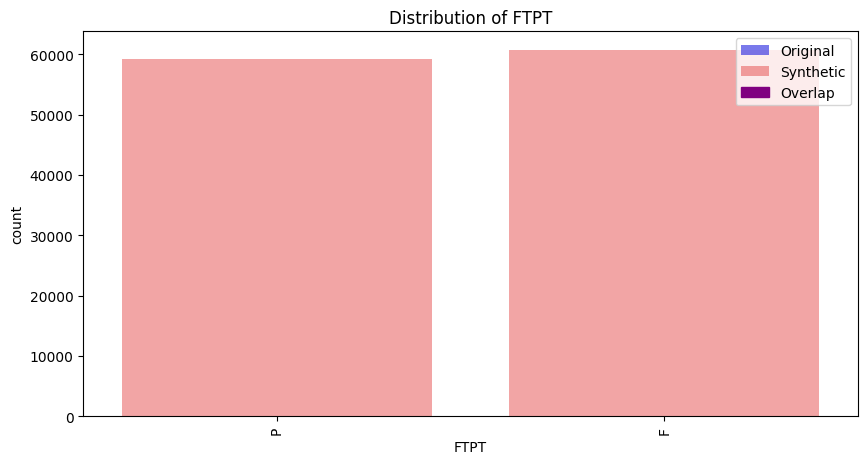

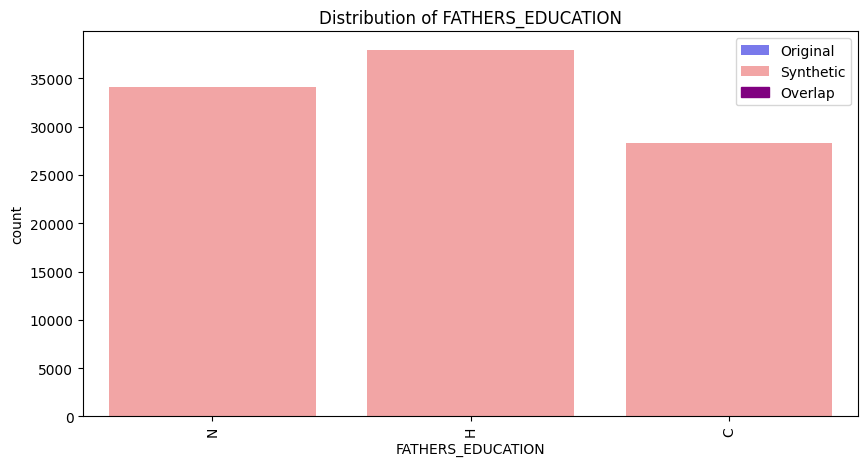

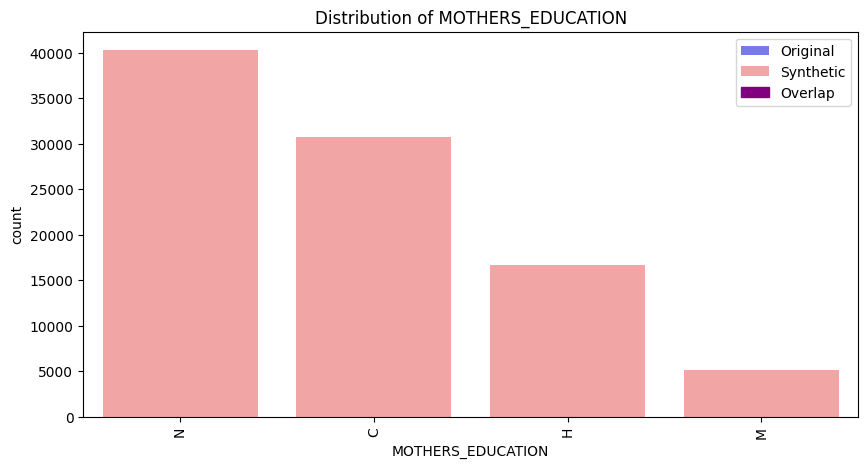

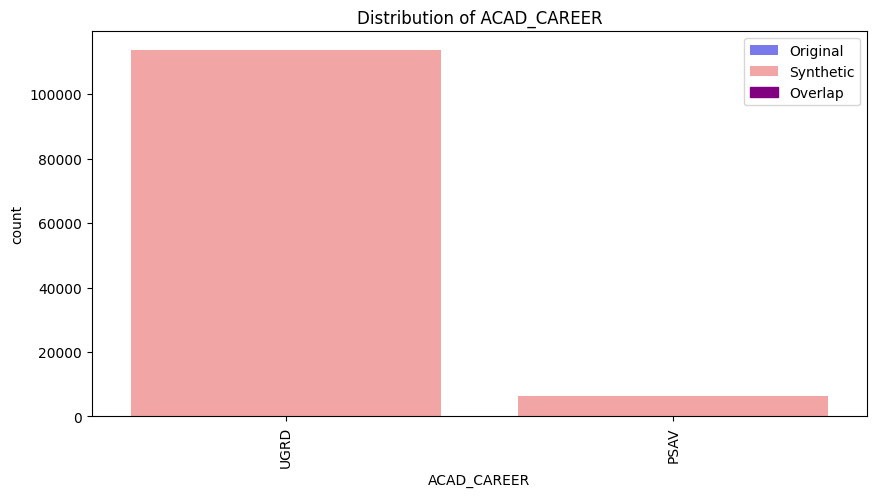

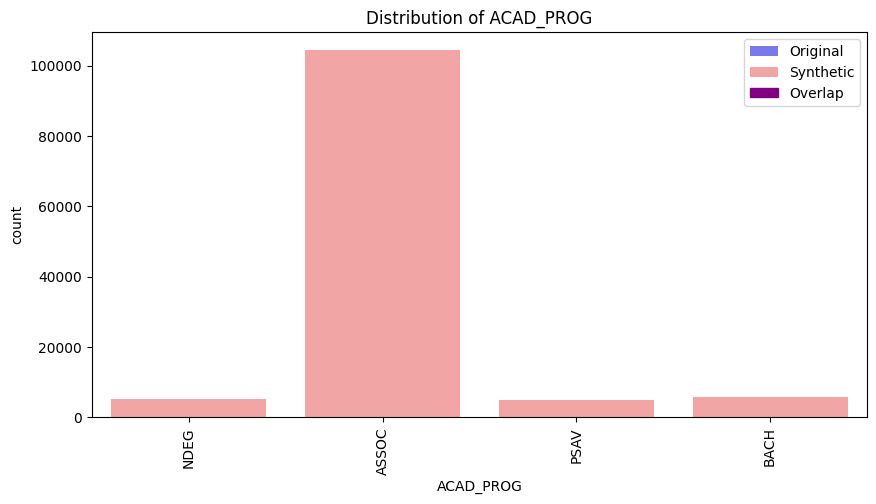

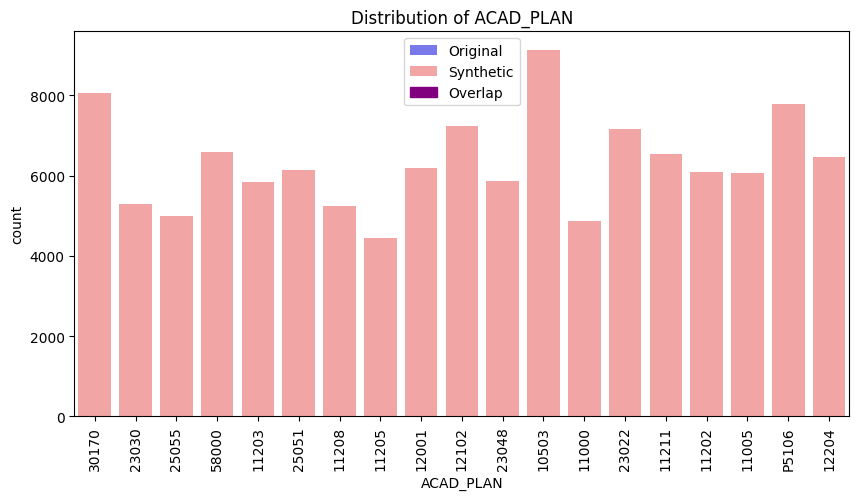

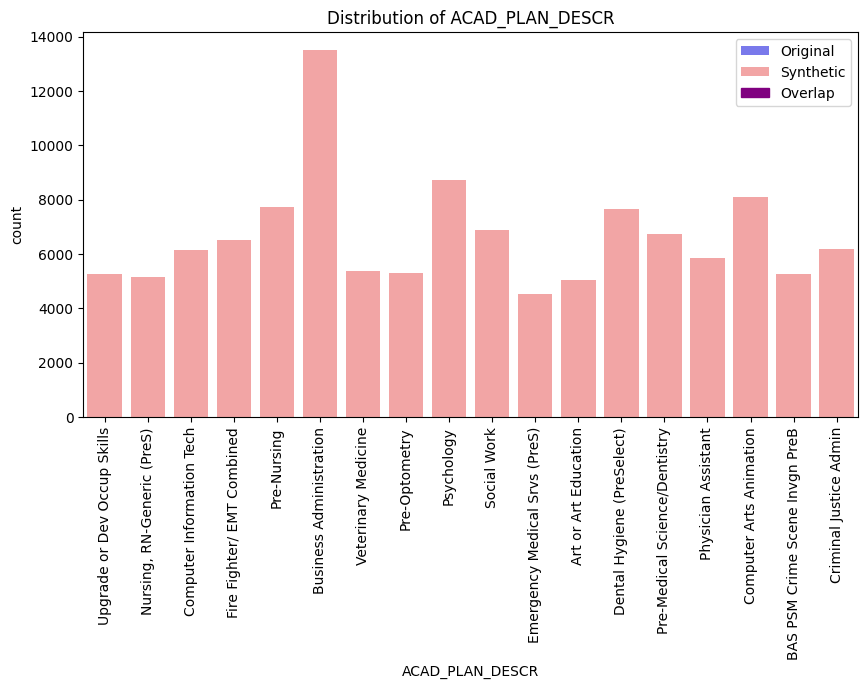

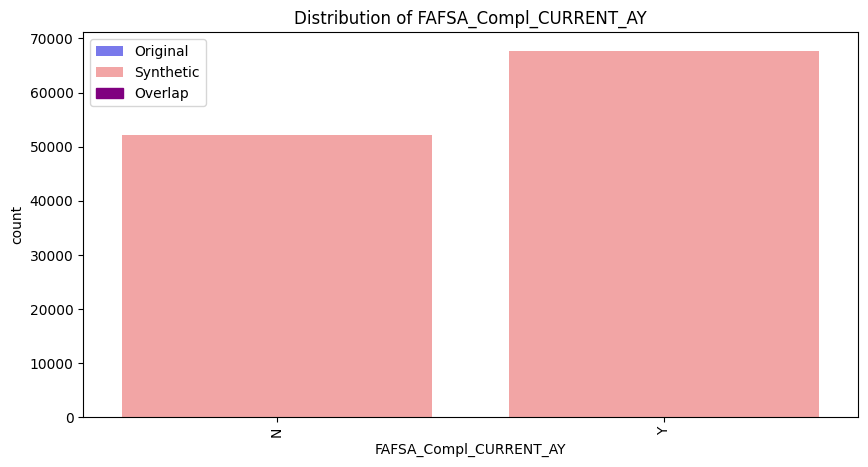

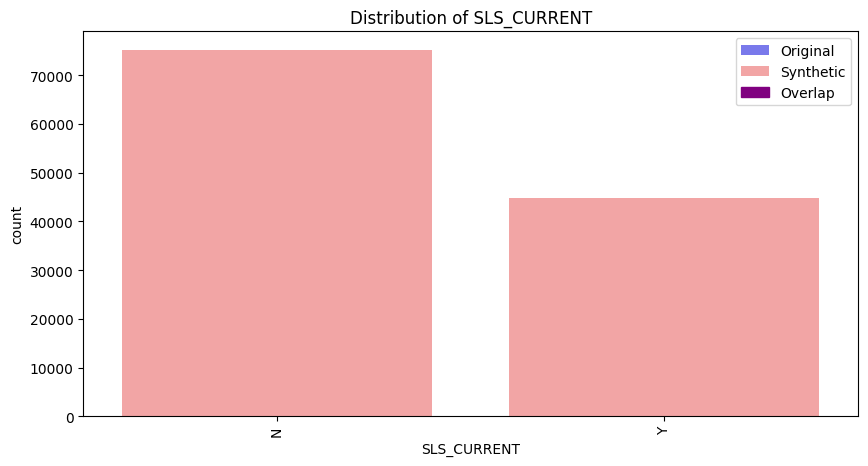

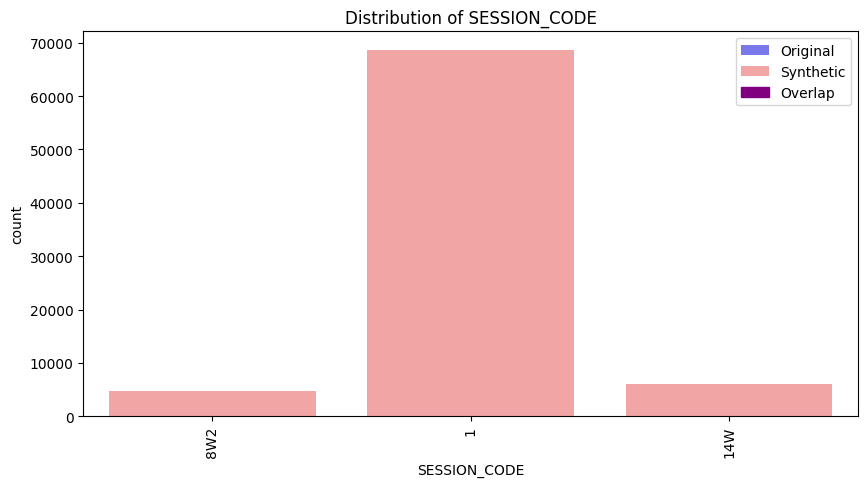

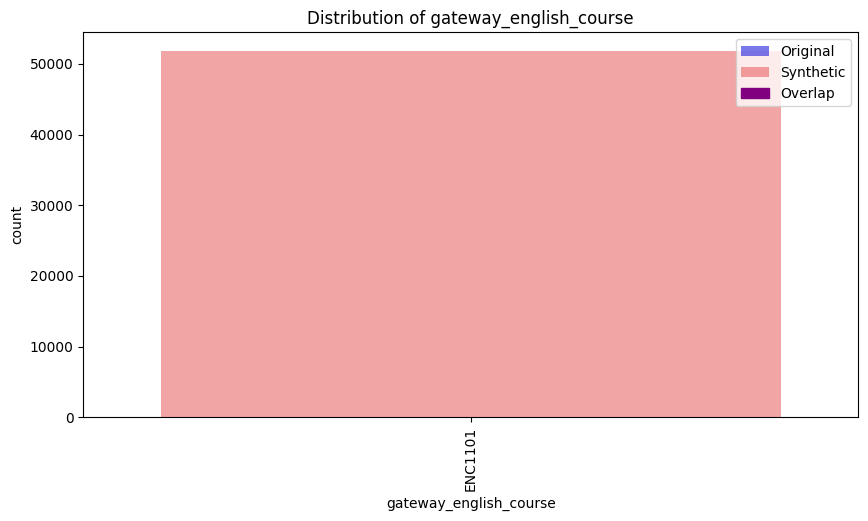

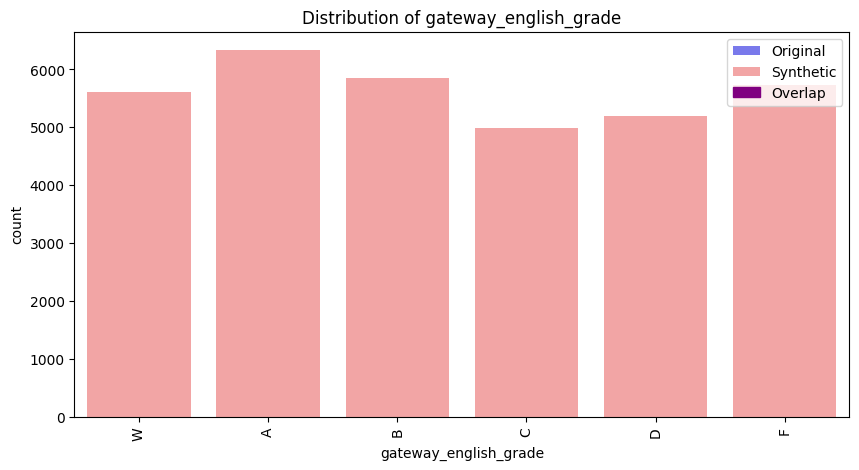

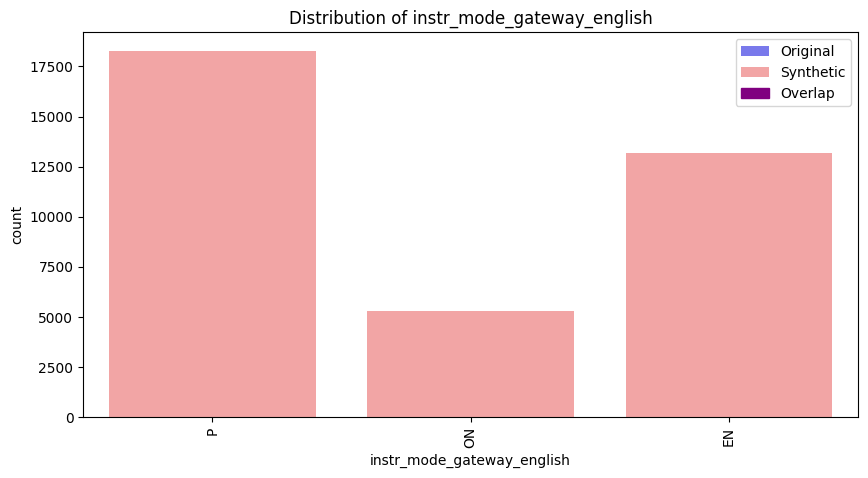

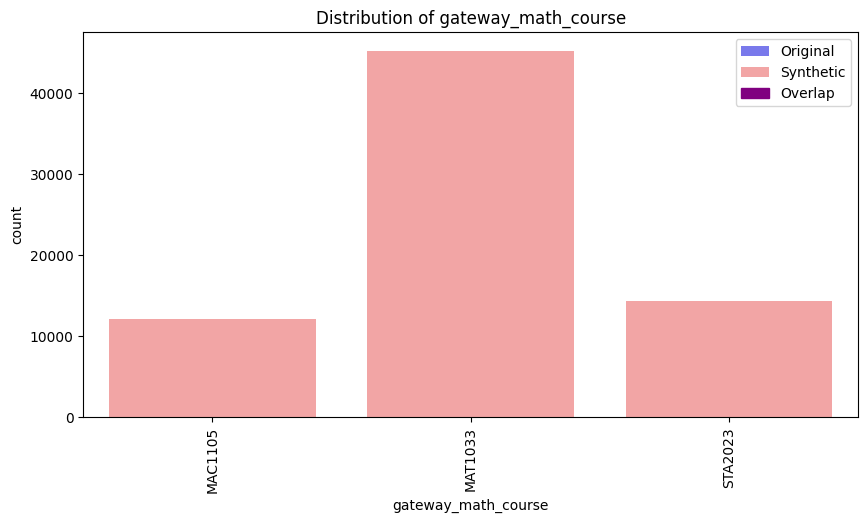

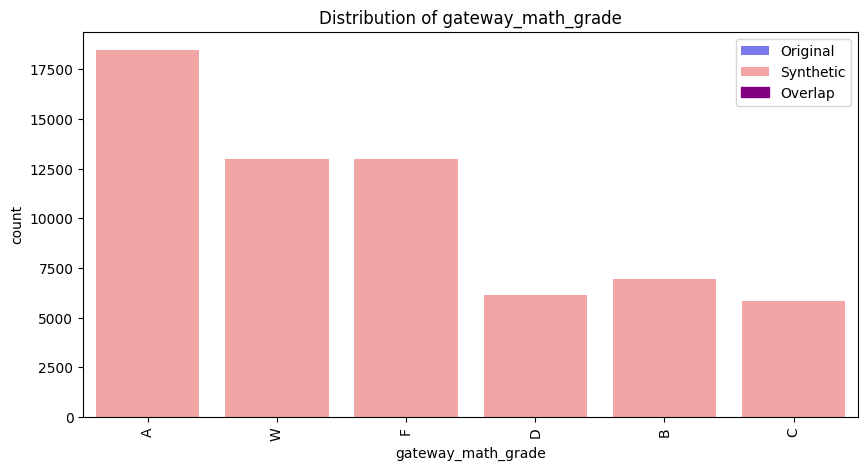

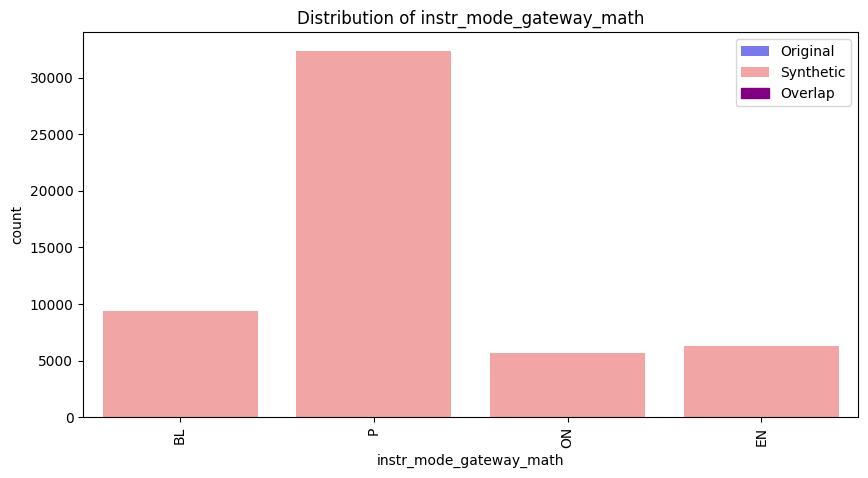

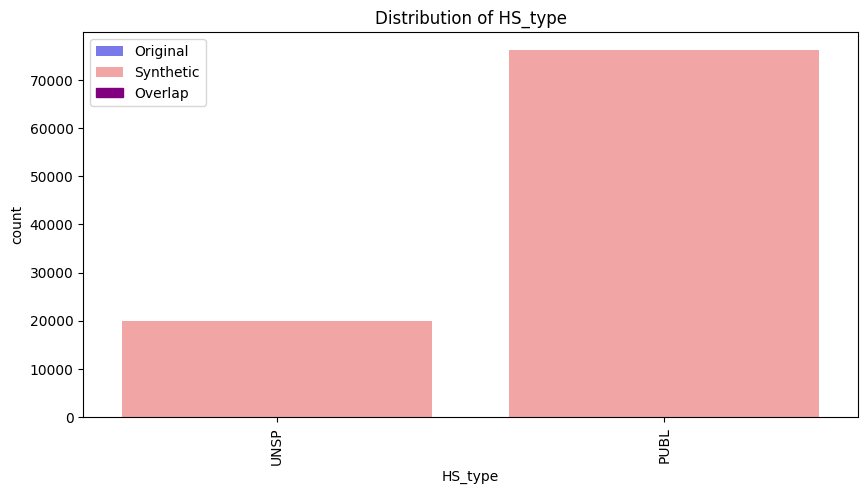

In [ ]:
# Function to plot comparison of distributions for numerical columns
def plot_distribution_comparison(original, synthetic, column):
    plt.figure(figsize=(10, 5))
    sns.histplot(original[column], color='blue', label='Original', kde=True, stat="density")
    sns.histplot(synthetic[column], color='red', label='Synthetic', kde=True, stat="density")
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()

# Function to plot comparison of distributions for categorical columns
def plot_categorical_comparison(original, synthetic, column):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=original[column], color='blue', label='Original', alpha=0.6)
    sns.countplot(x=synthetic[column], color='red', label='Synthetic', alpha=0.4)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)  # Rotate x-axis labels
    handles, labels = plt.gca().get_legend_handles_labels()
    # Add a patch for the overlap (purple) if it exists
    from matplotlib.patches import Patch
    handles.append(Patch(color='purple', label='Overlap'))
    plt.legend(handles=handles)
    plt.show()

# Example numerical column plot
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plot_distribution_comparison(data, synthetic_data, column)

# Example categorical column plot
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    plot_categorical_comparison(data, synthetic_data, column)


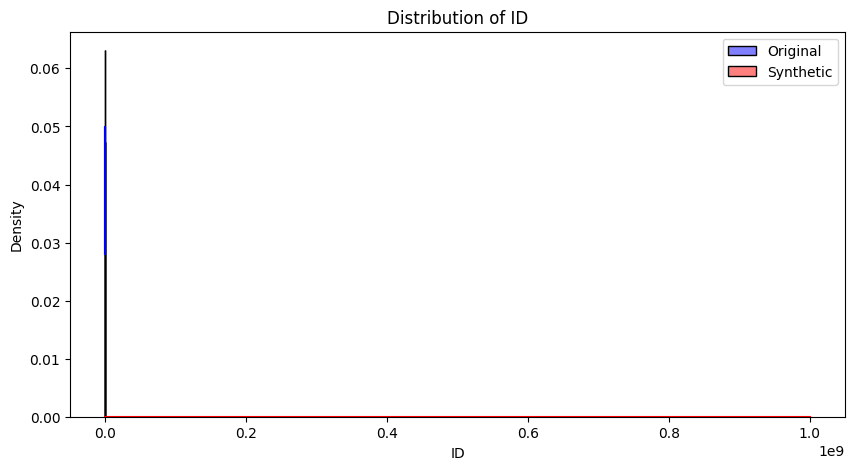

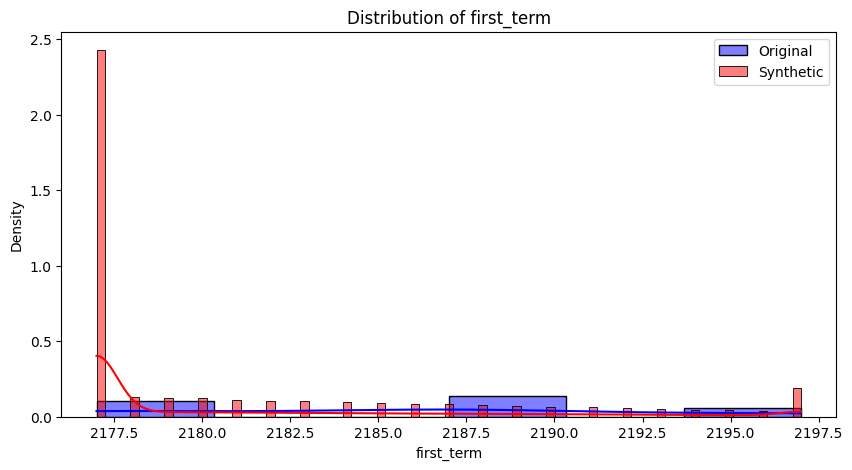

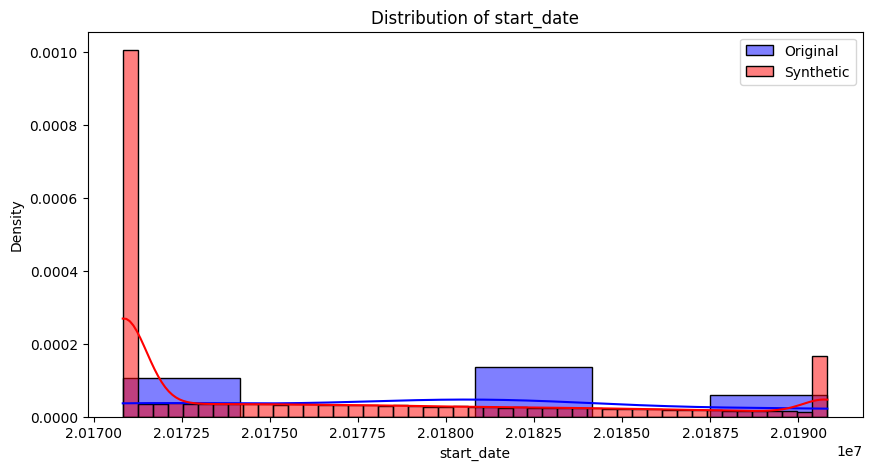

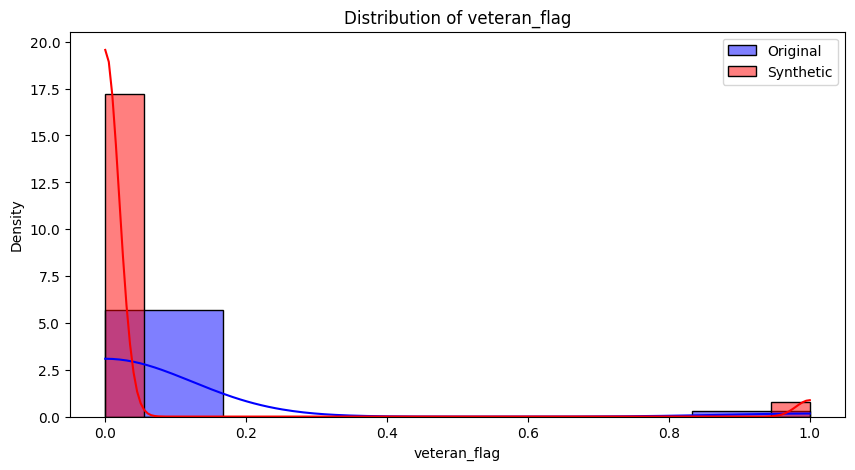

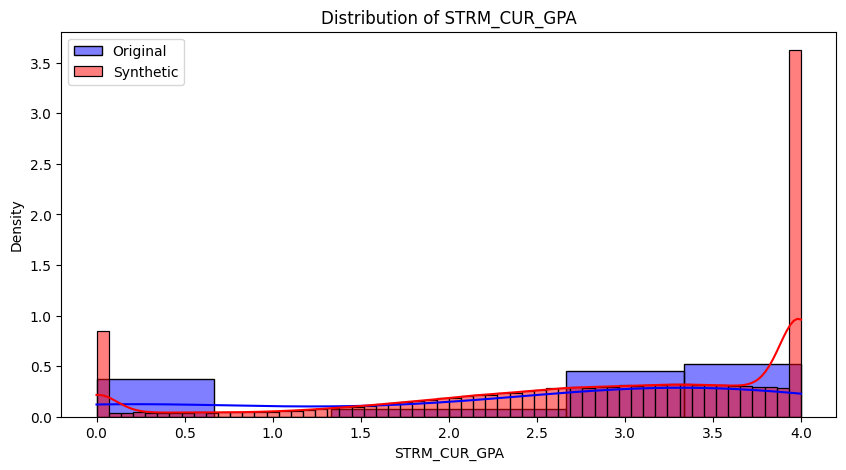

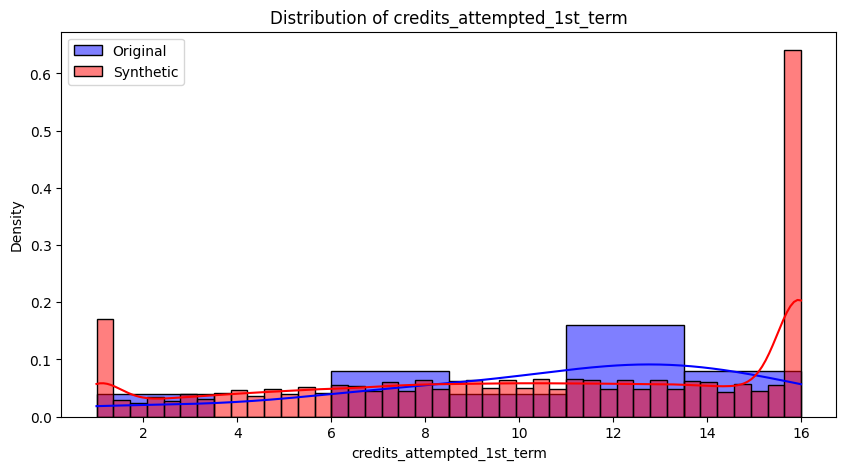

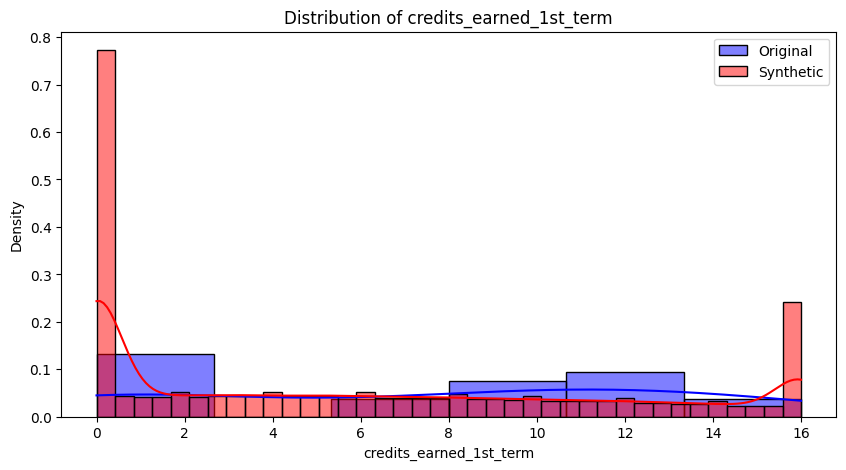

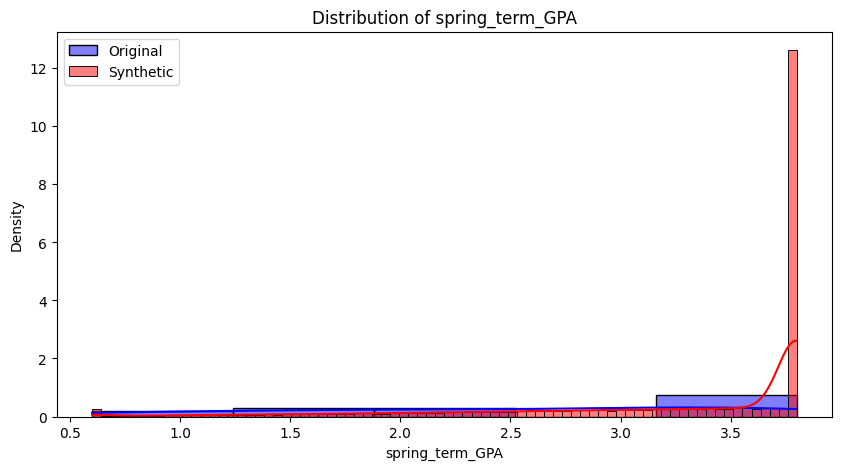

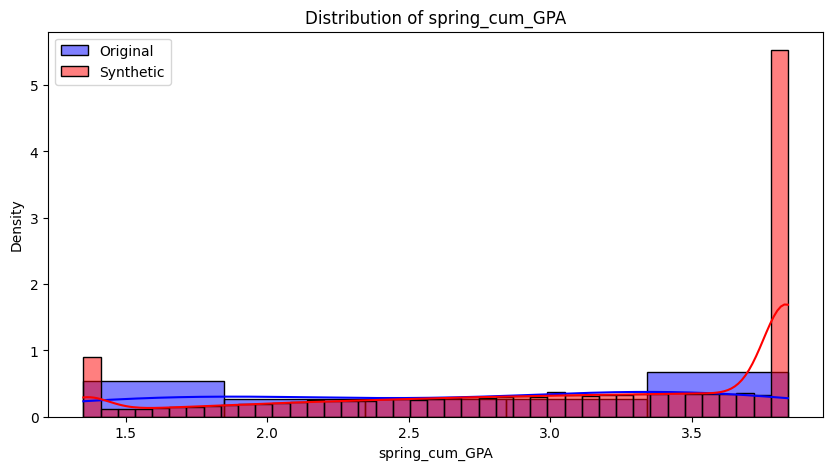

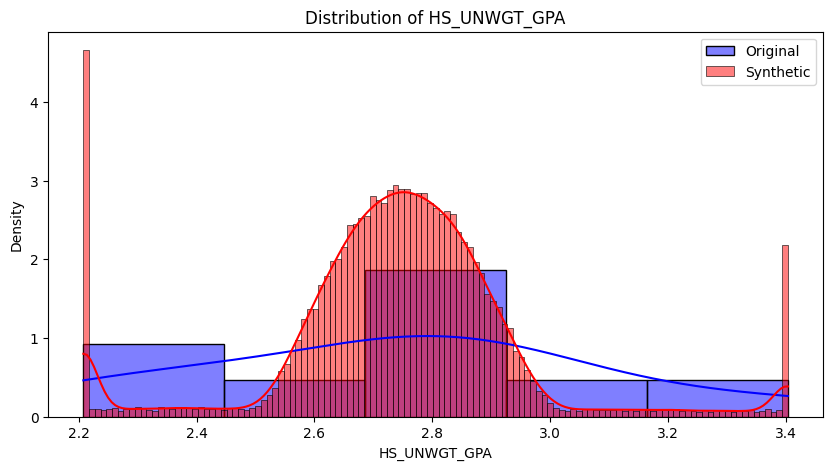

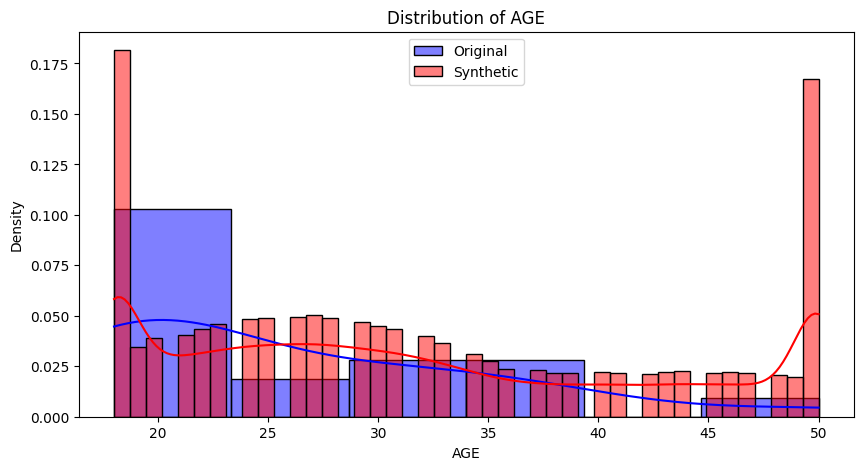

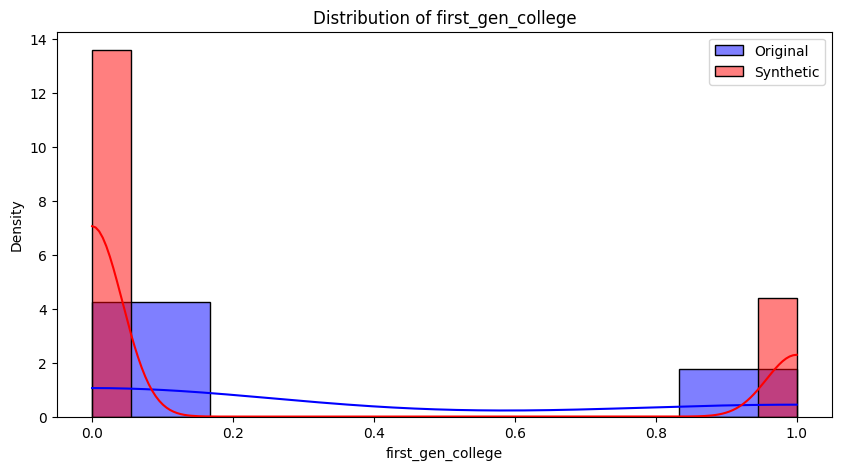

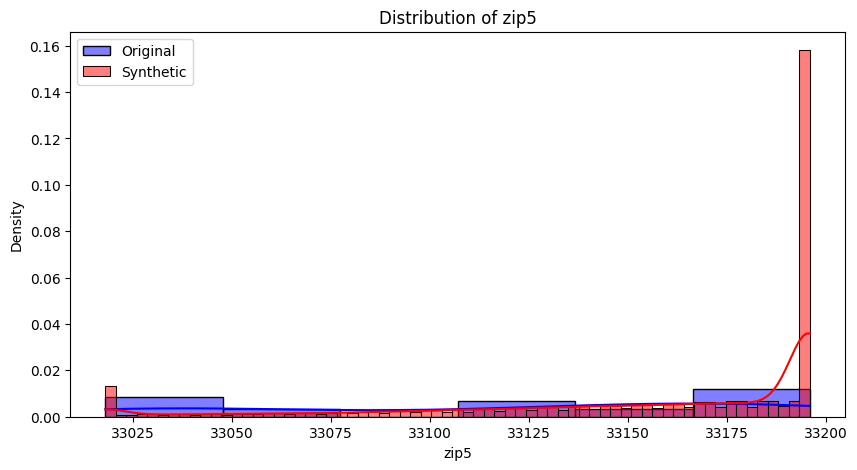

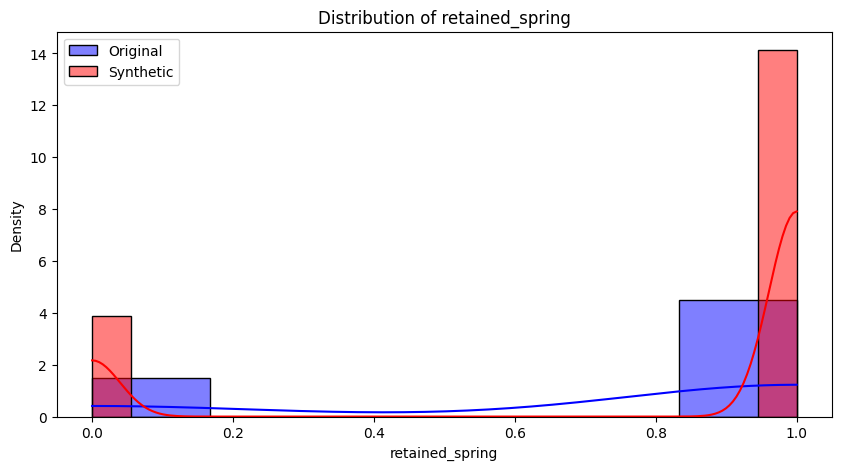

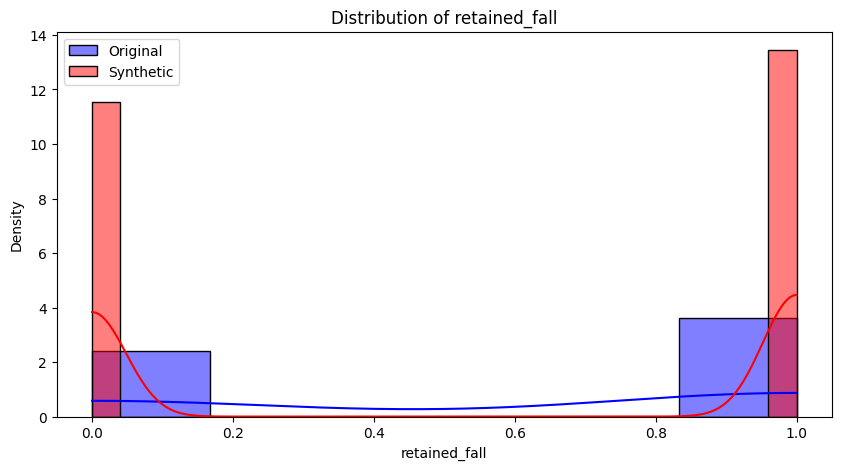

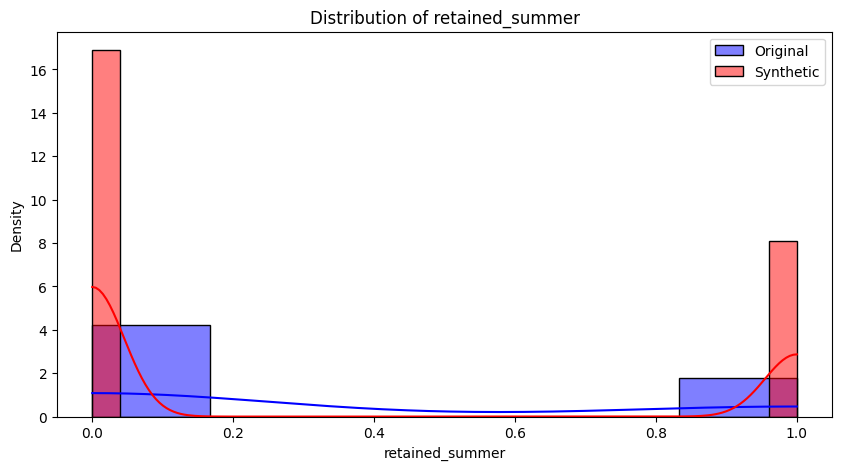

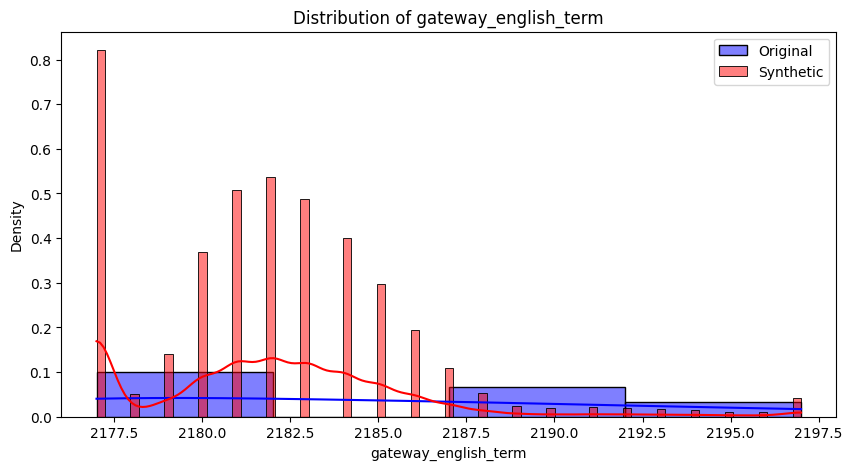

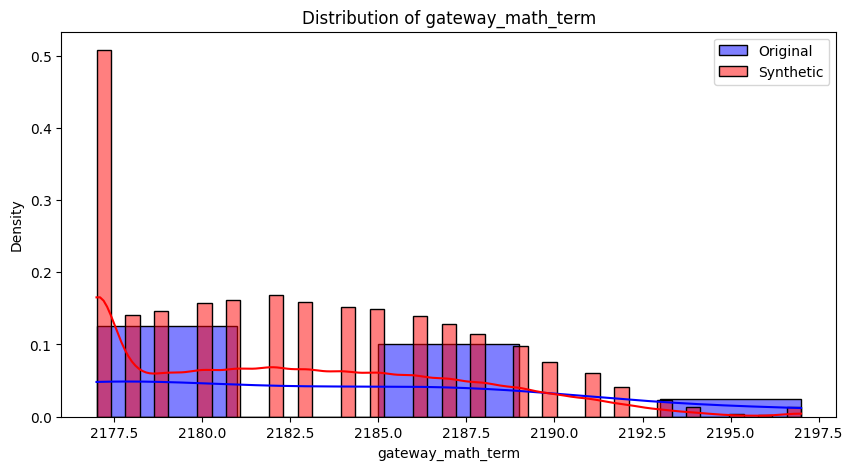

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


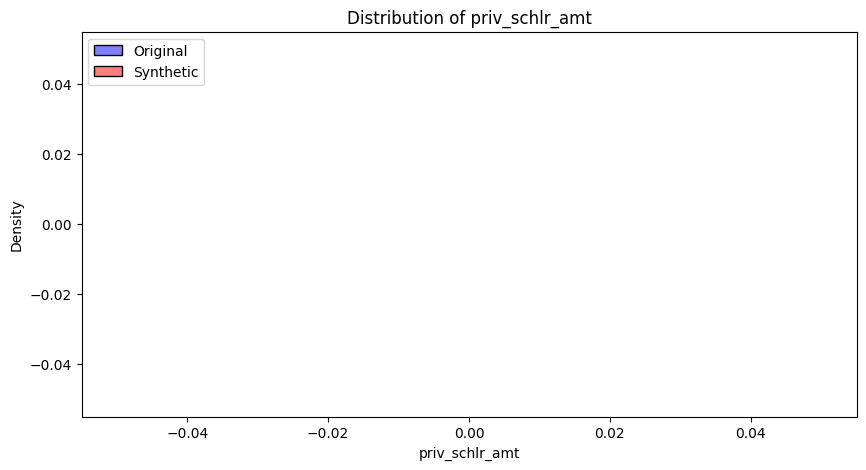

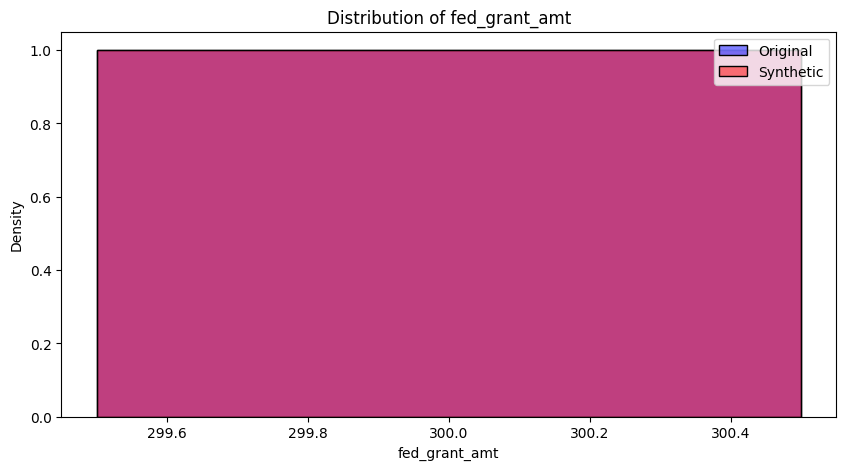

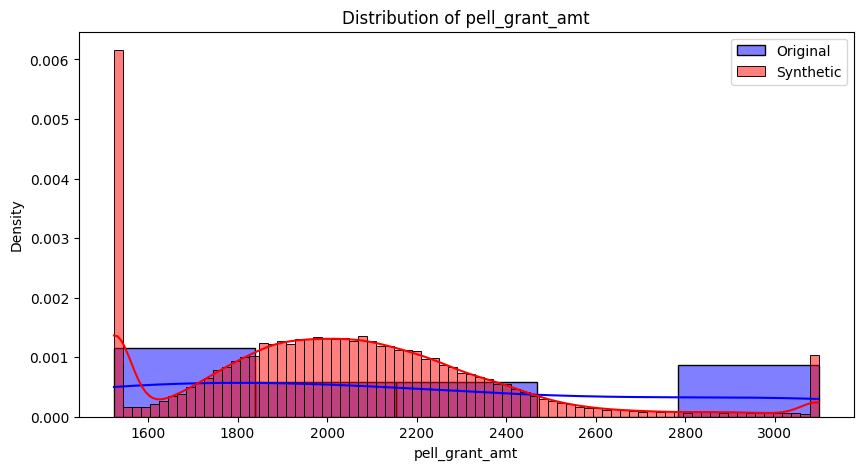

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


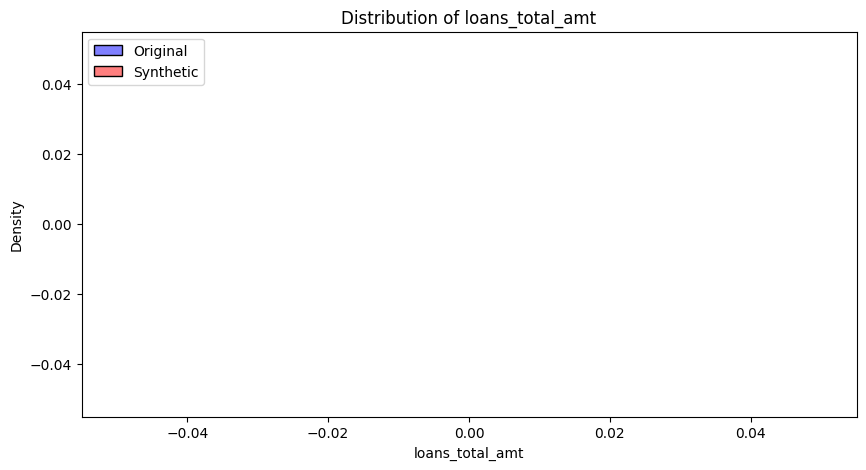

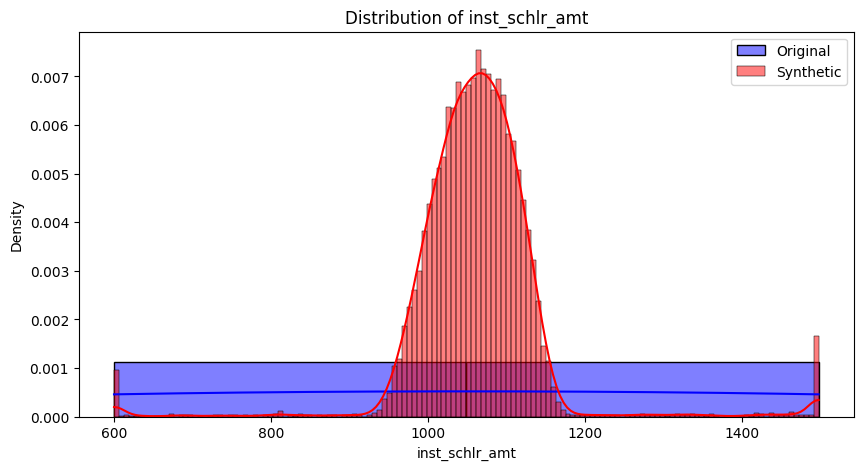

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


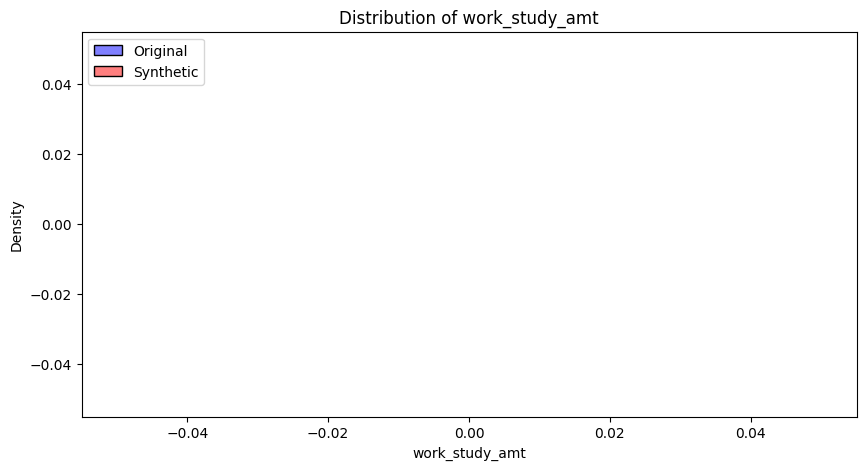

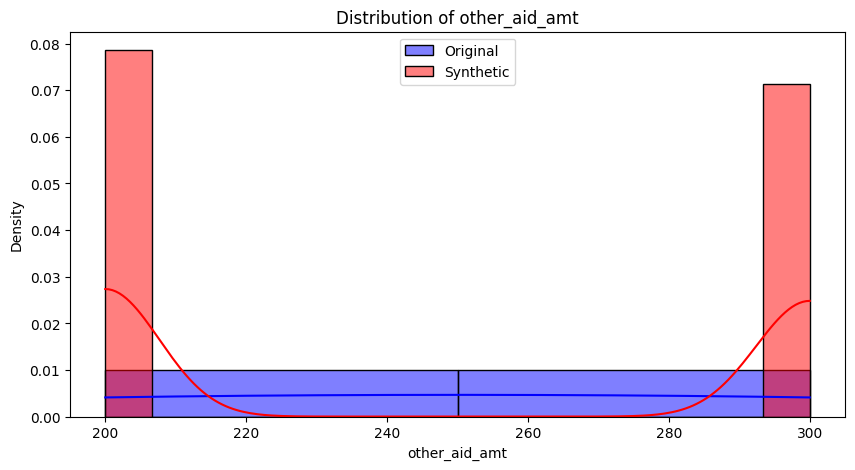

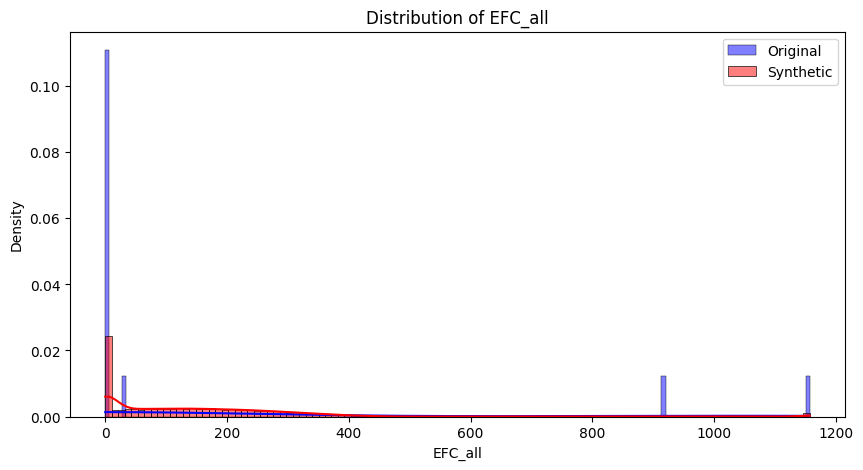

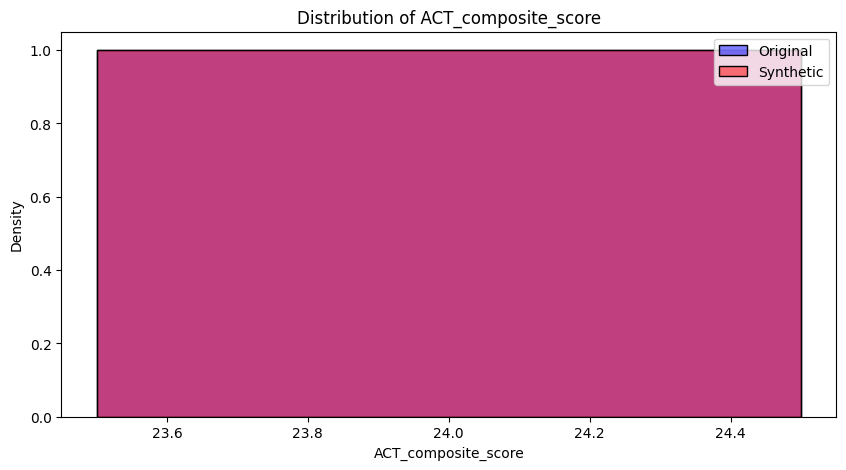

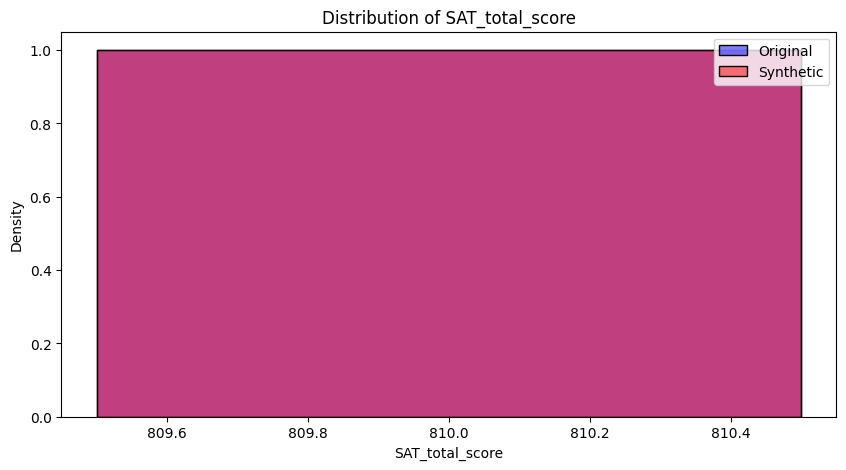

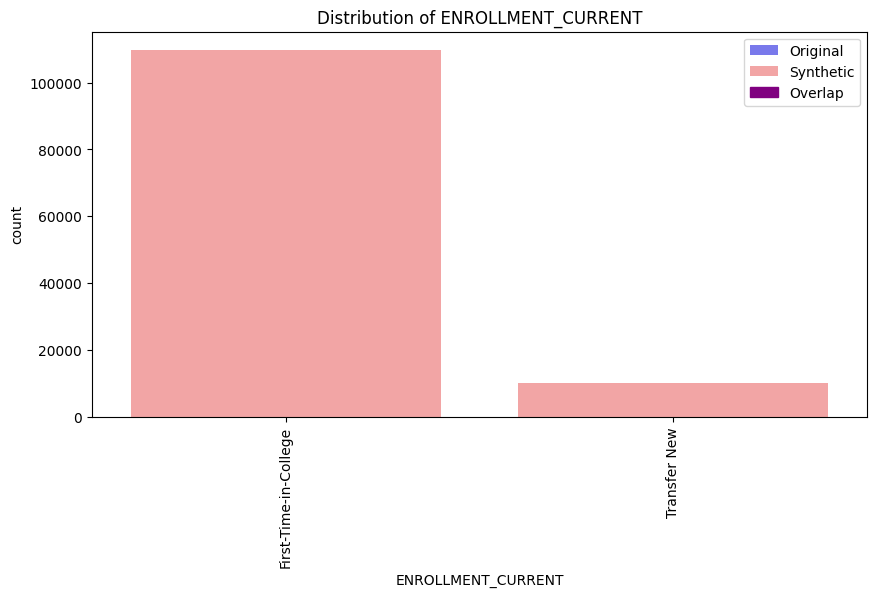

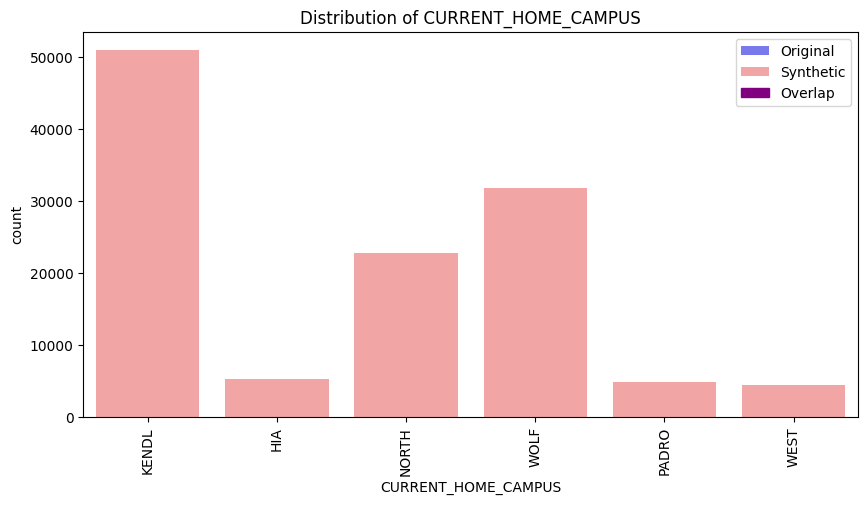

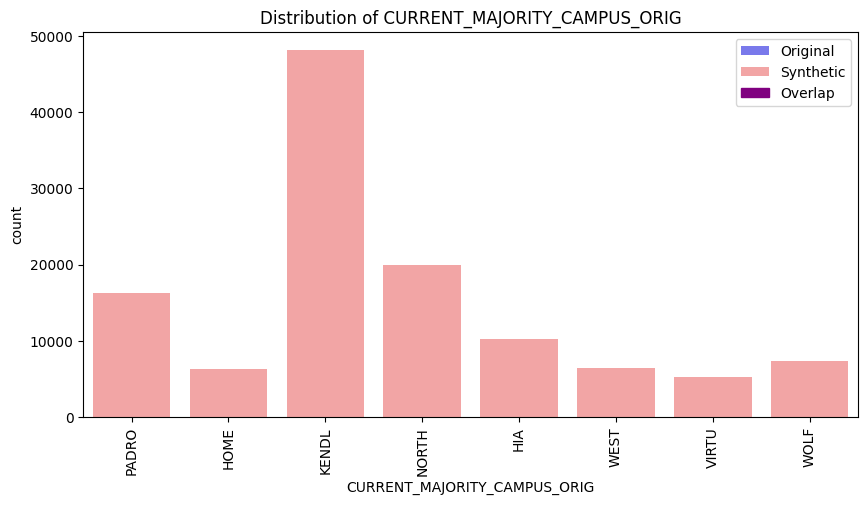

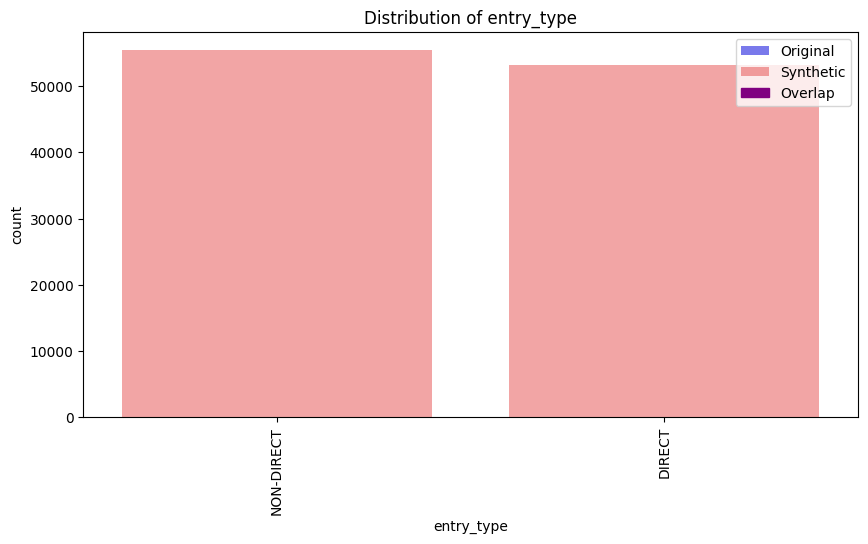

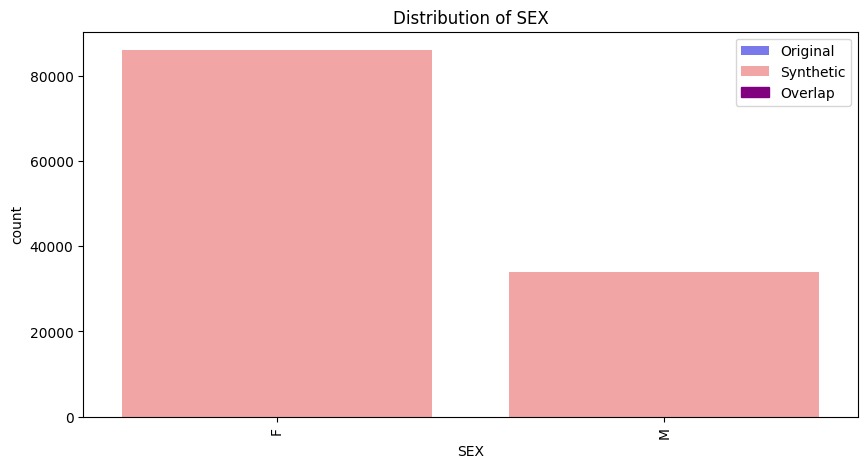

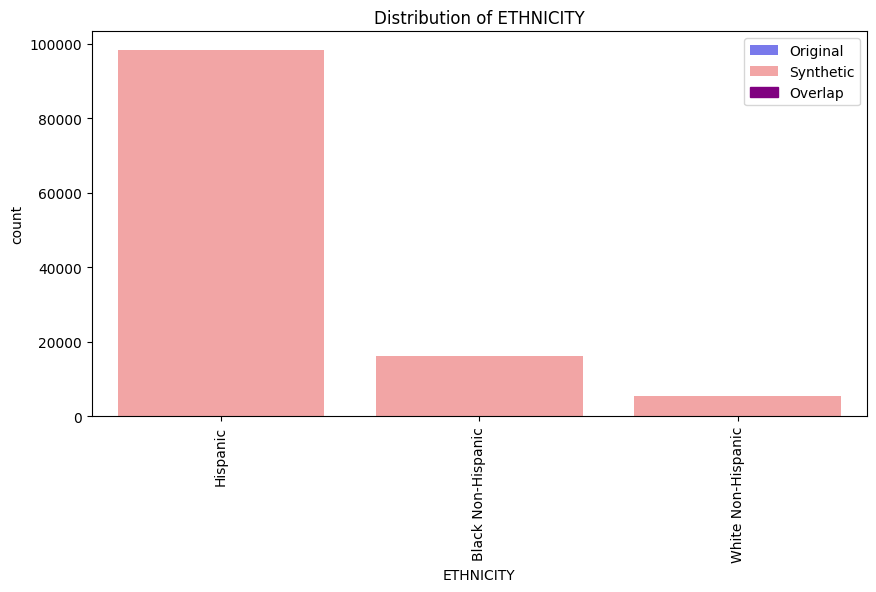

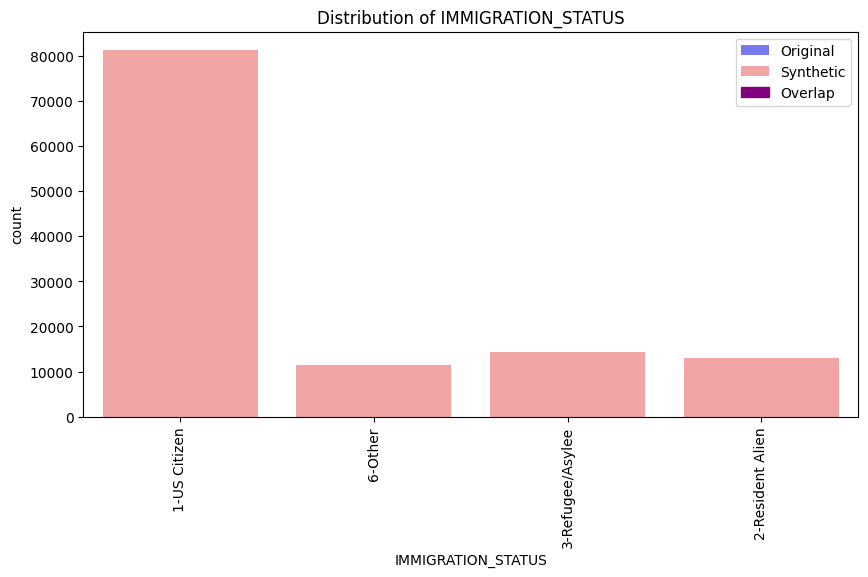

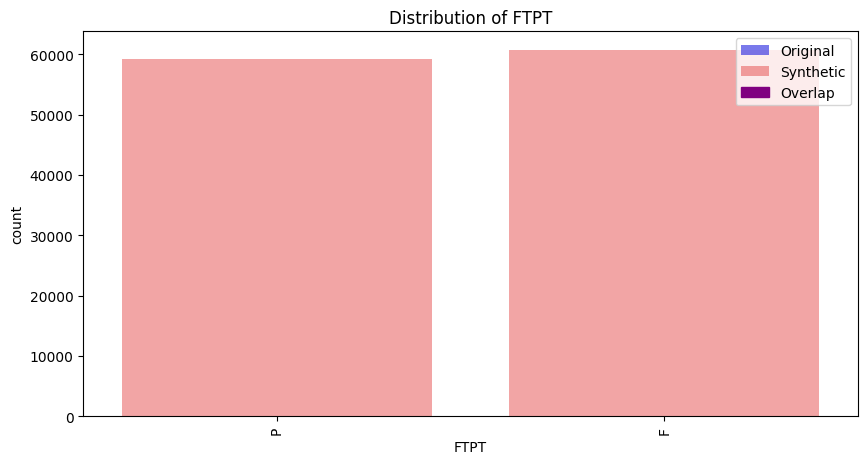

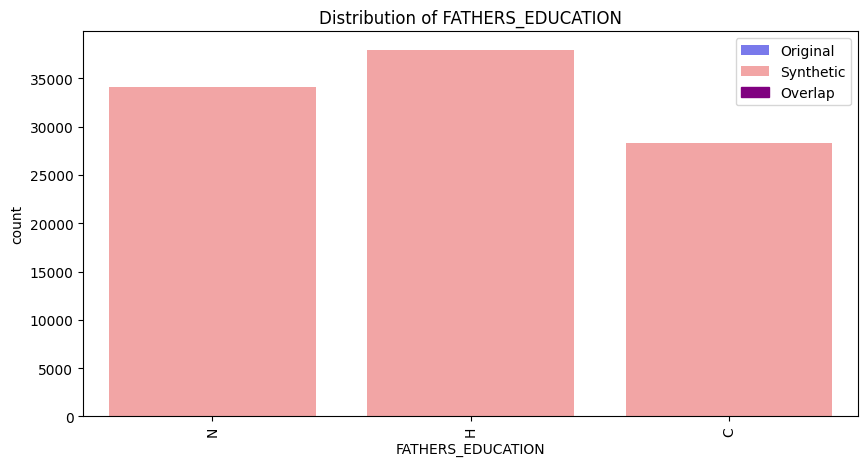

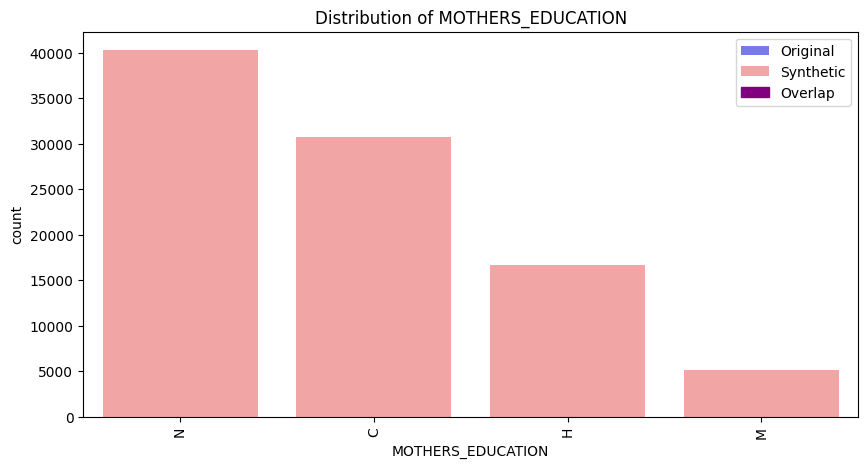

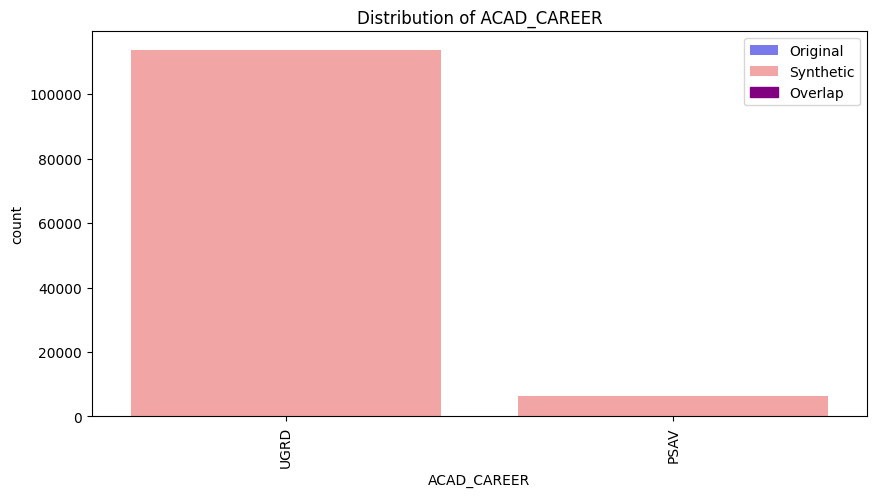

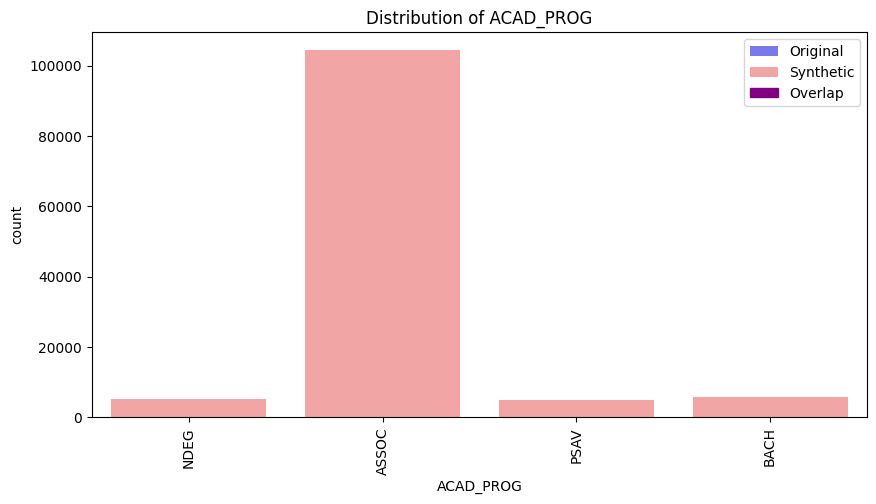

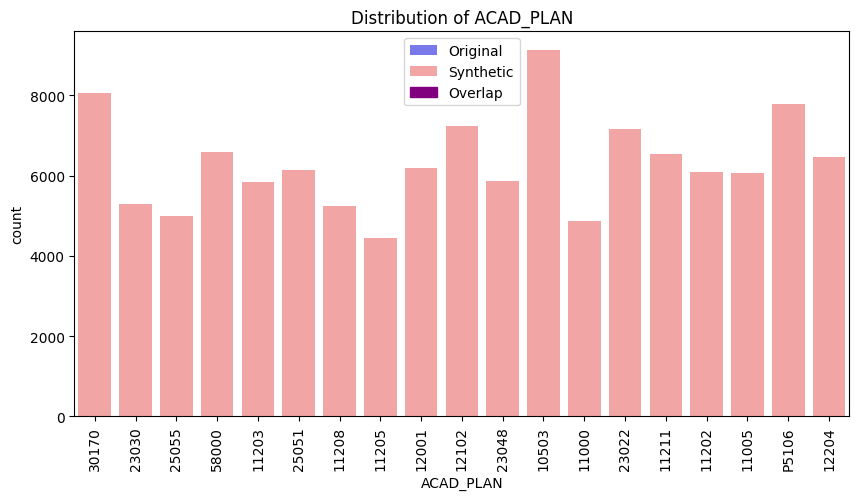

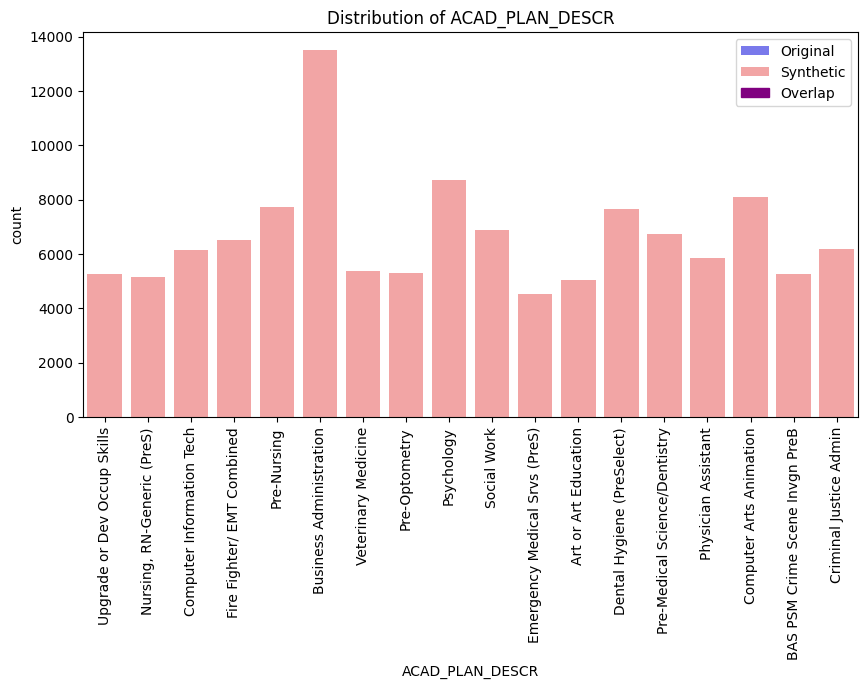

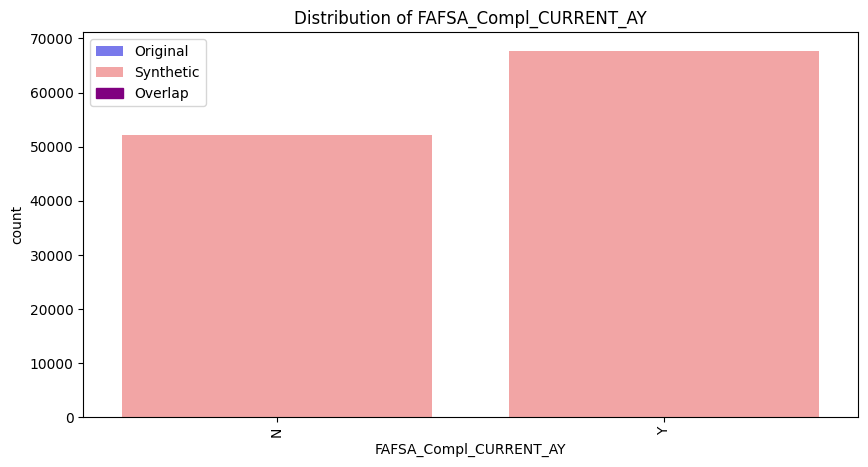

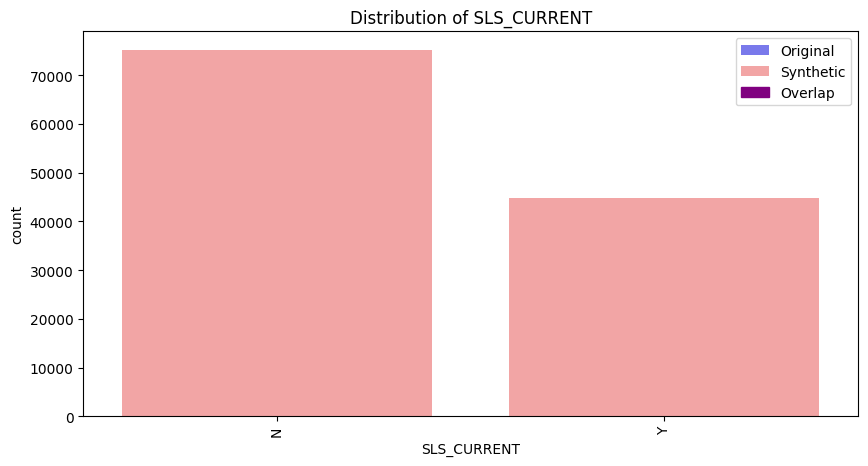

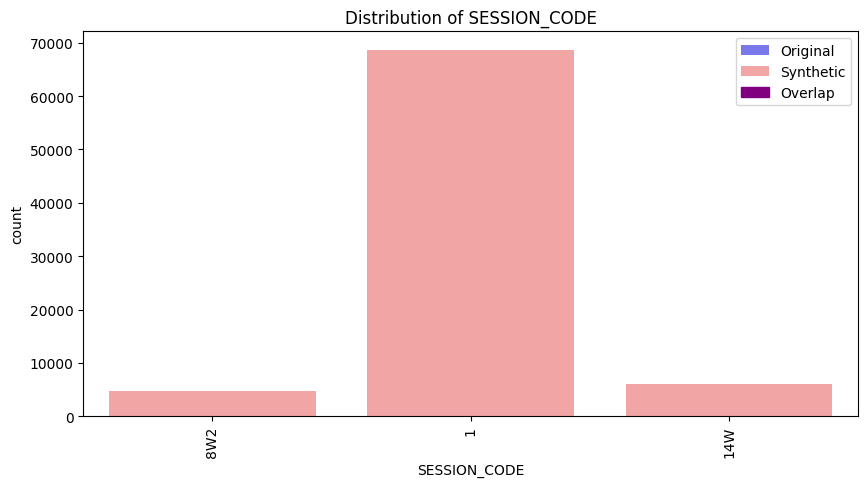

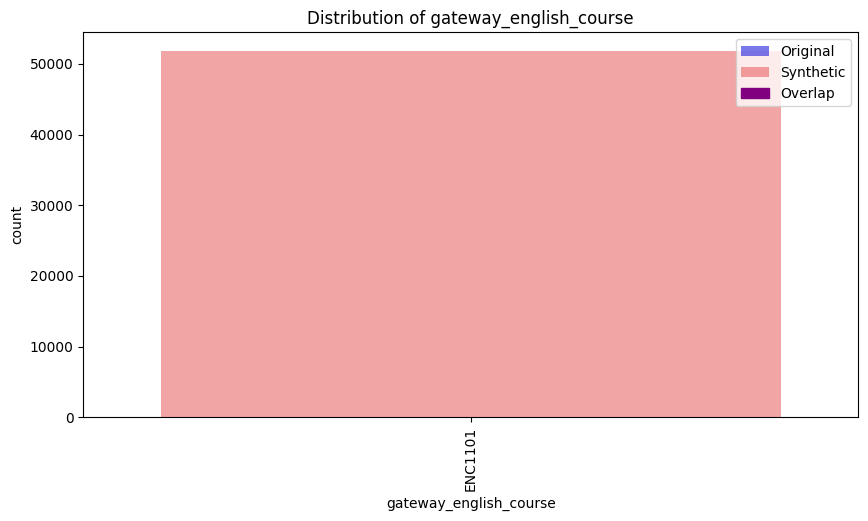

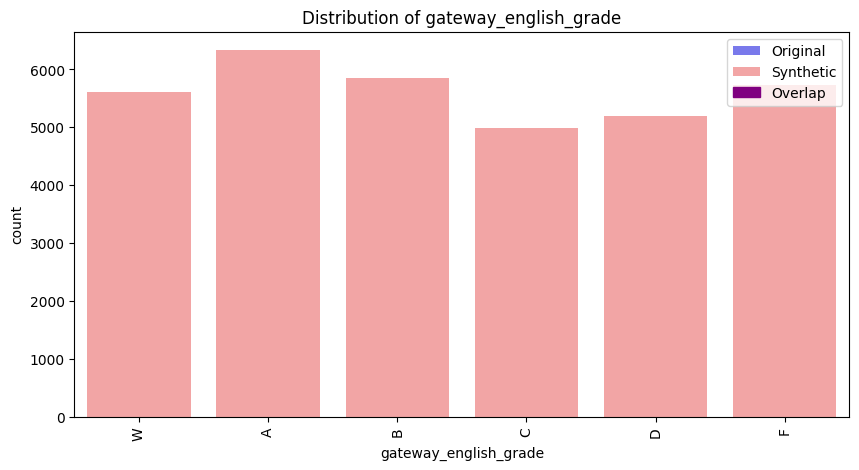

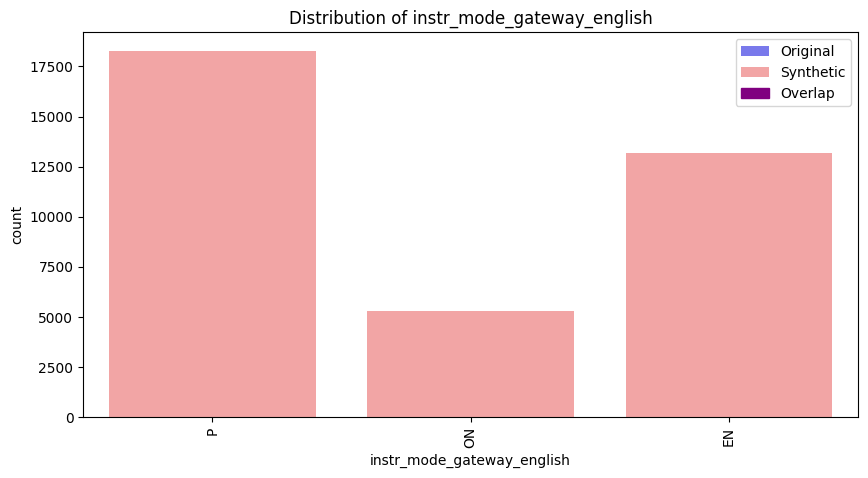

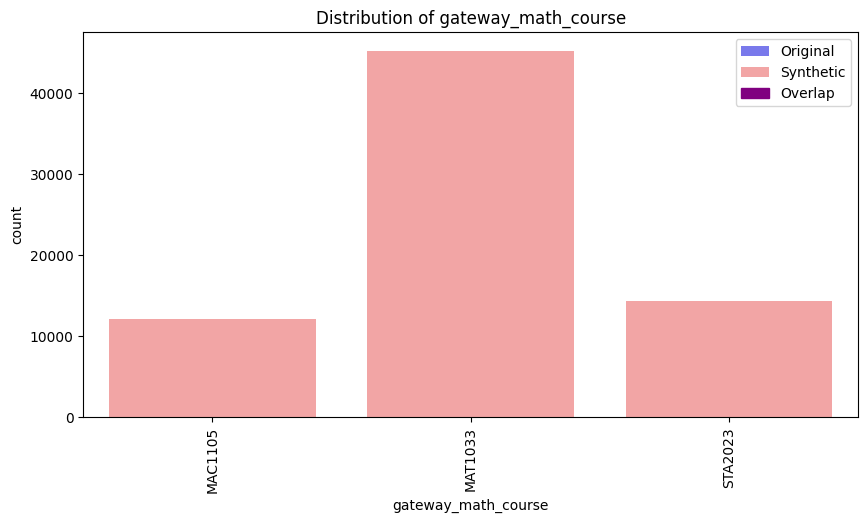

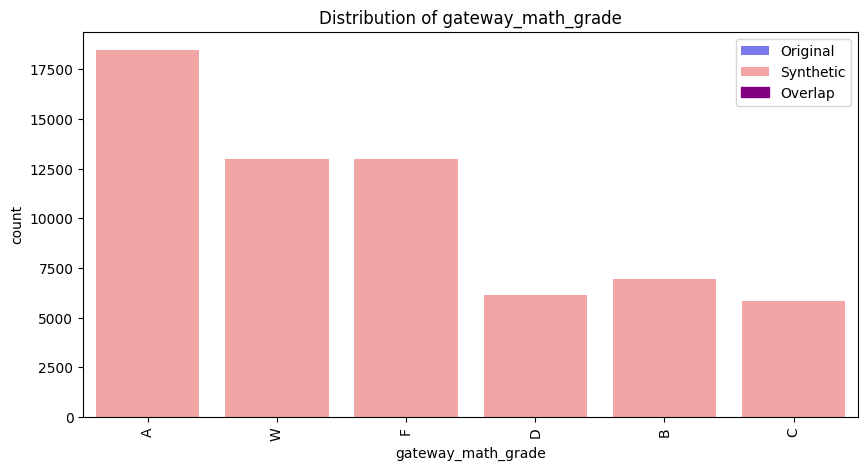

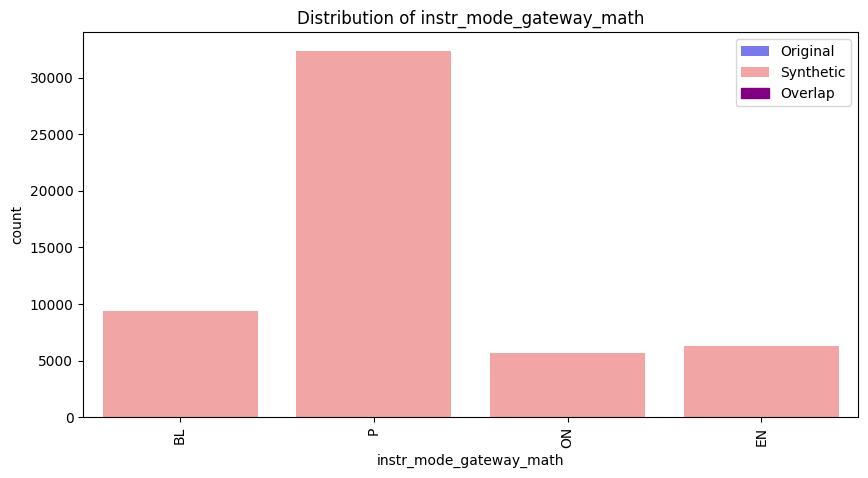

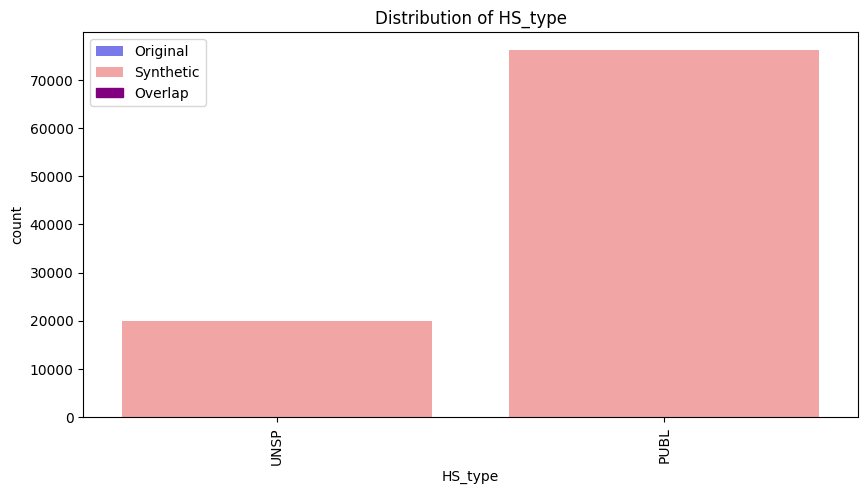

In [ ]:
# Function to plot comparison of distributions for numerical columns
def plot_distribution_comparison(original, synthetic, column):
    plt.figure(figsize=(10, 5))
    sns.histplot(original[column], color='blue', label='Original', kde=True, stat="density")
    sns.histplot(synthetic[column], color='red', label='Synthetic', kde=True, stat="density")
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()

# Function to plot comparison of distributions for categorical columns
def plot_categorical_comparison(original, synthetic, column):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=original[column], color='blue', label='Original', alpha=0.6)
    sns.countplot(x=synthetic[column], color='red', label='Synthetic', alpha=0.4)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)  # Rotate x-axis labels
    handles, labels = plt.gca().get_legend_handles_labels()
    # Add a patch for the overlap (purple) if it exists
    from matplotlib.patches import Patch
    handles.append(Patch(color='purple', label='Overlap'))
    plt.legend(handles=handles)
    plt.show()

# Example numerical column plot
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plot_distribution_comparison(data, synthetic_data, column)

# Example categorical column plot
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    plot_categorical_comparison(data, synthetic_data, column)


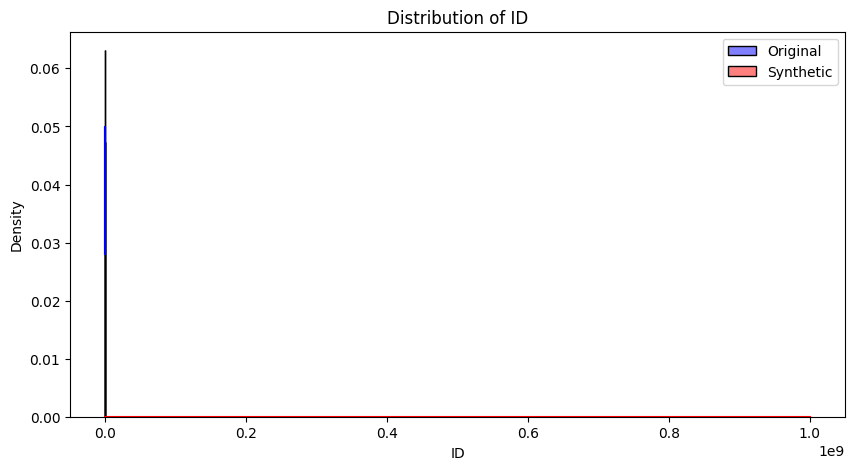

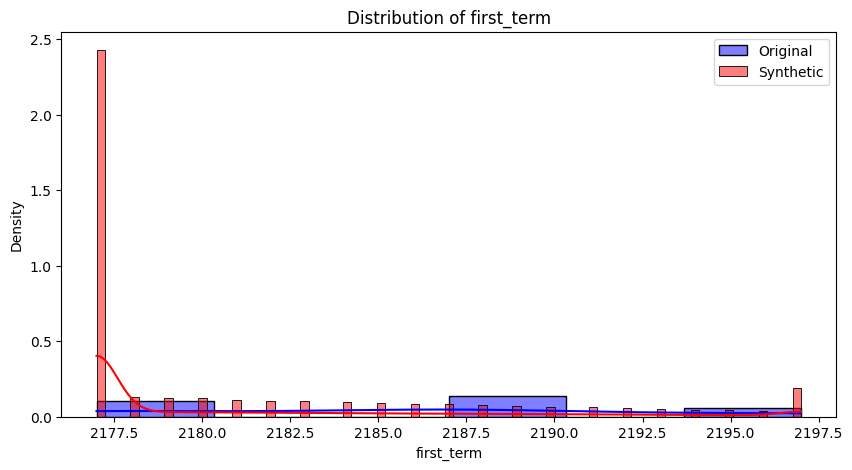

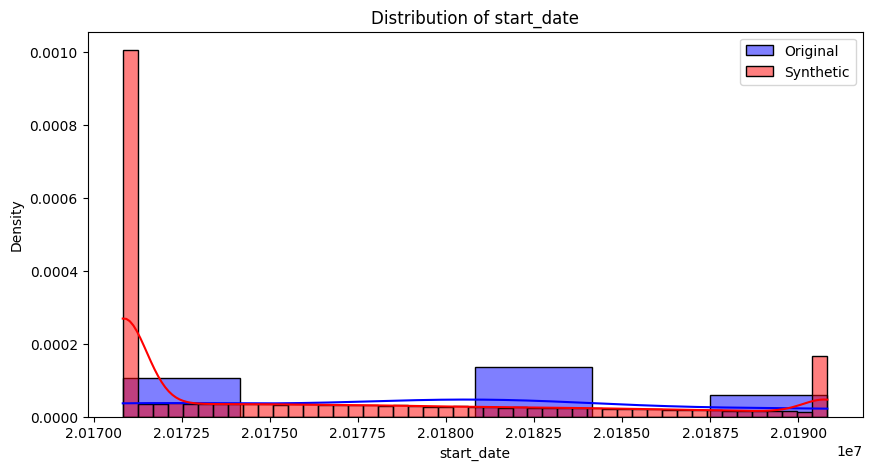

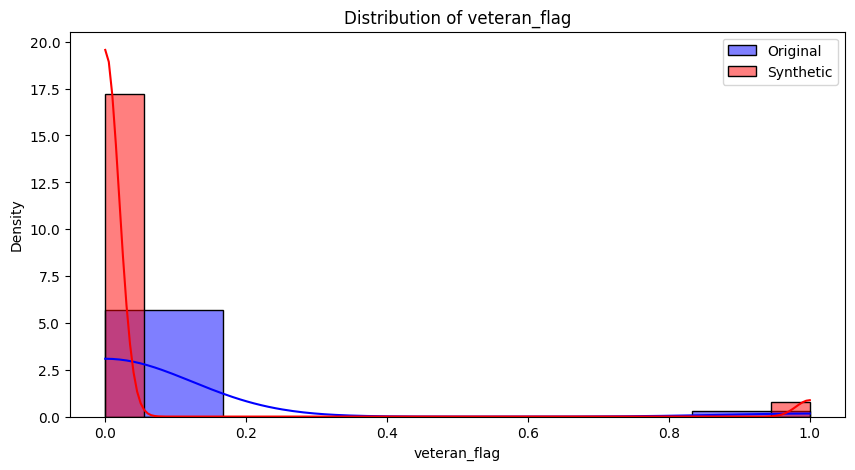

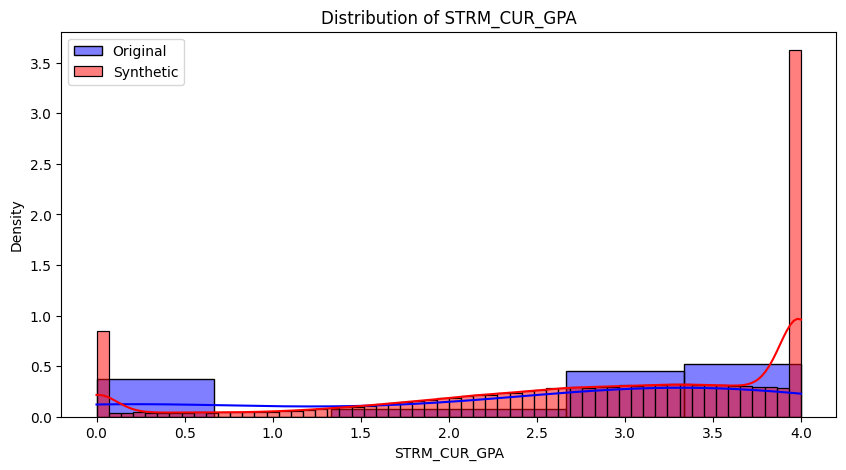

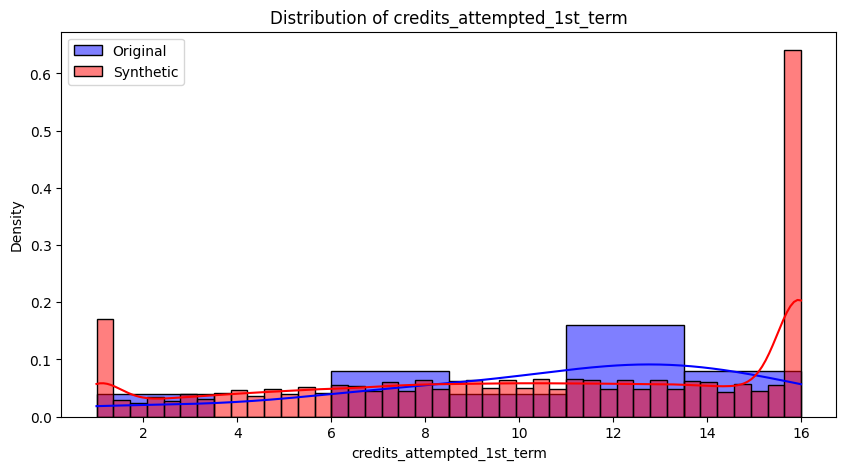

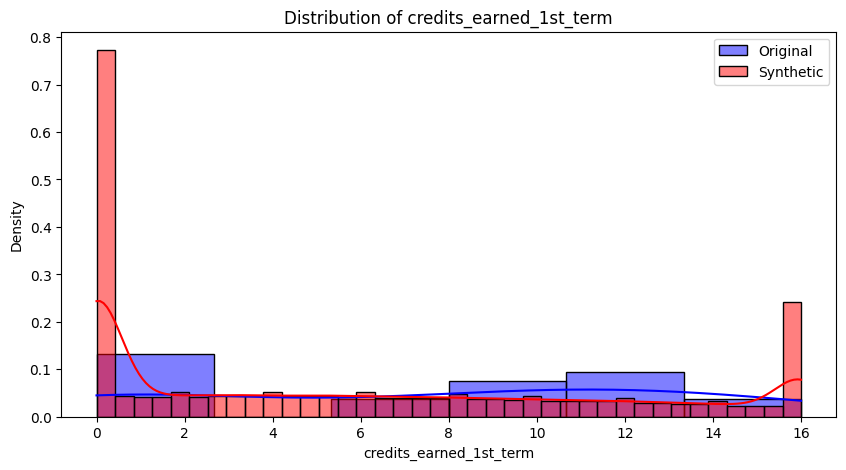

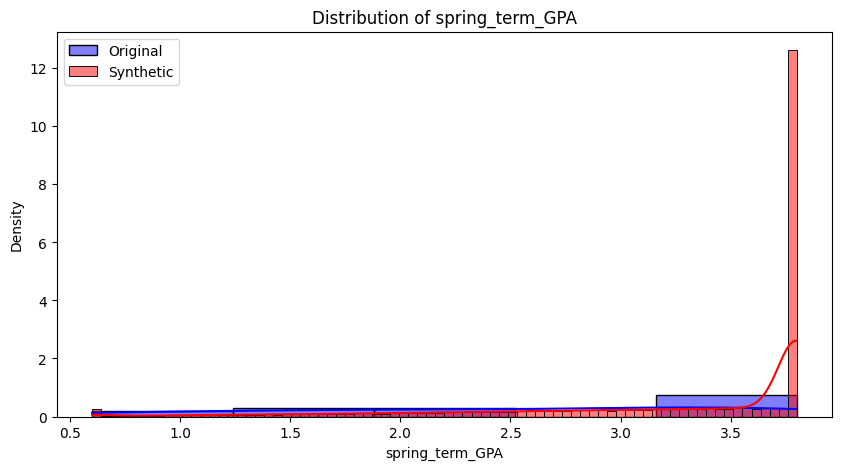

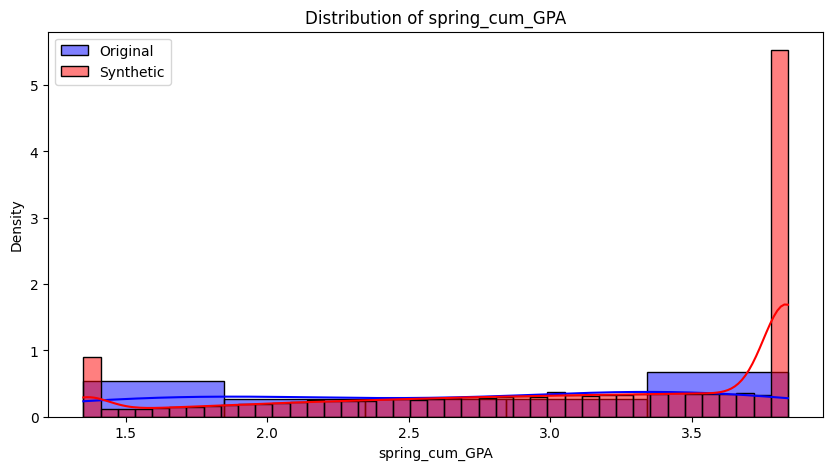

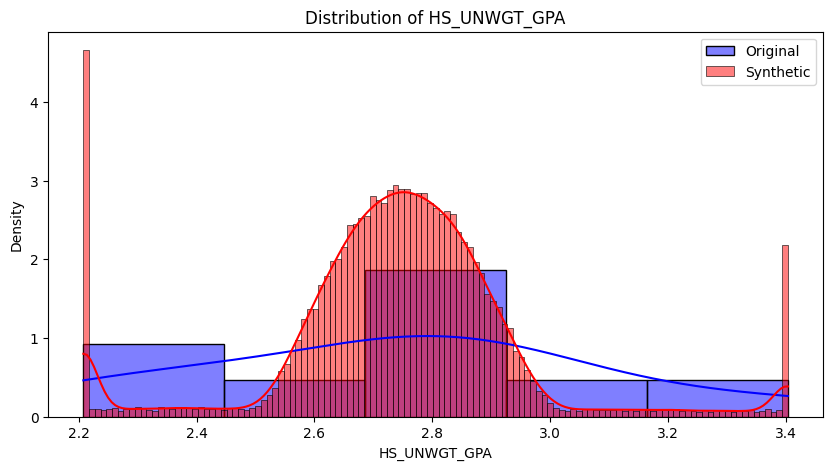

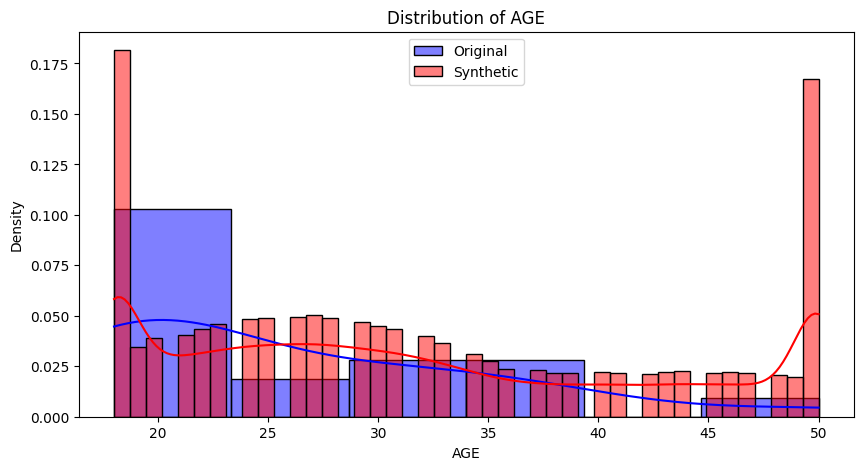

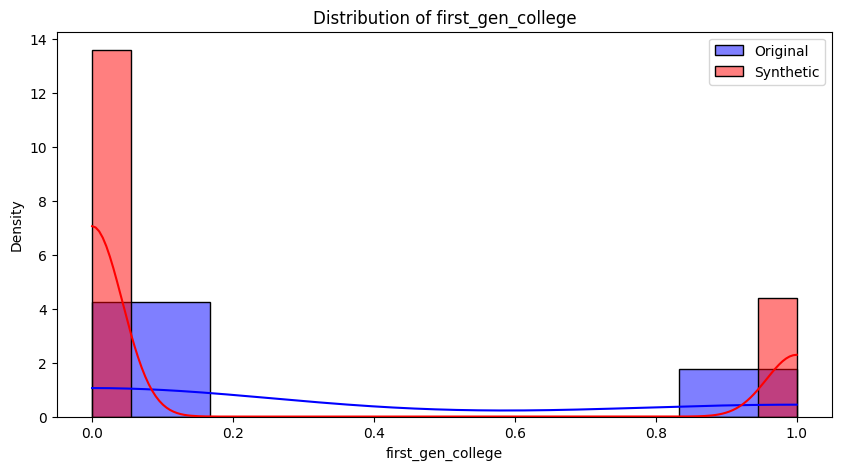

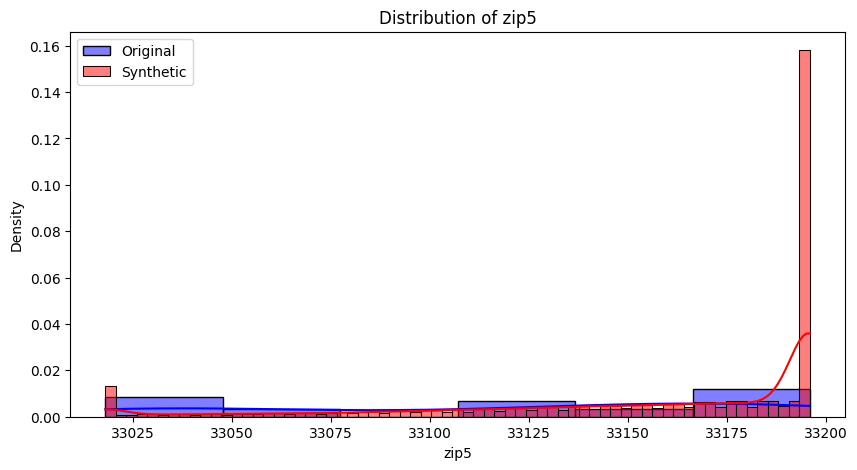

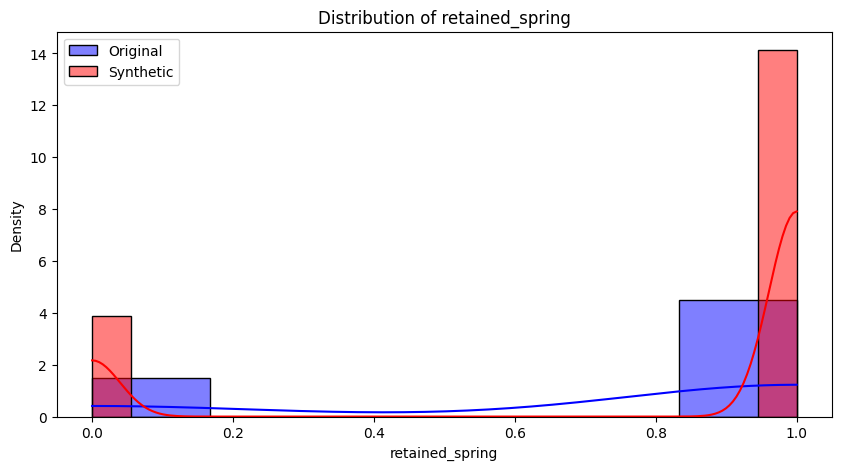

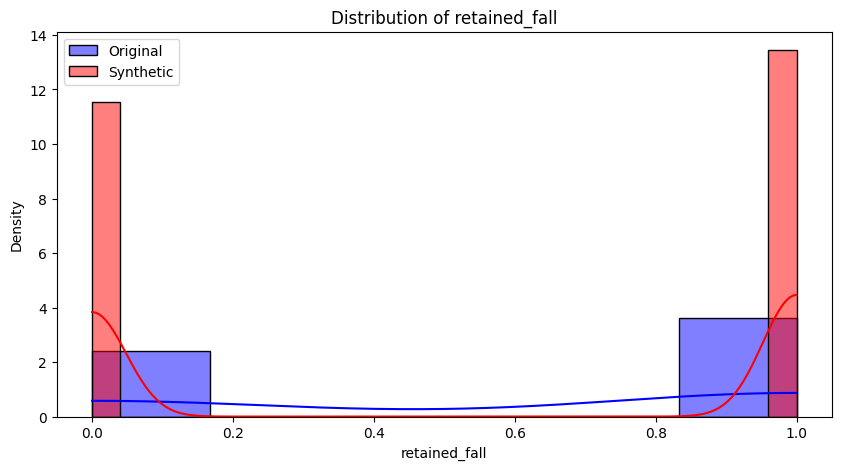

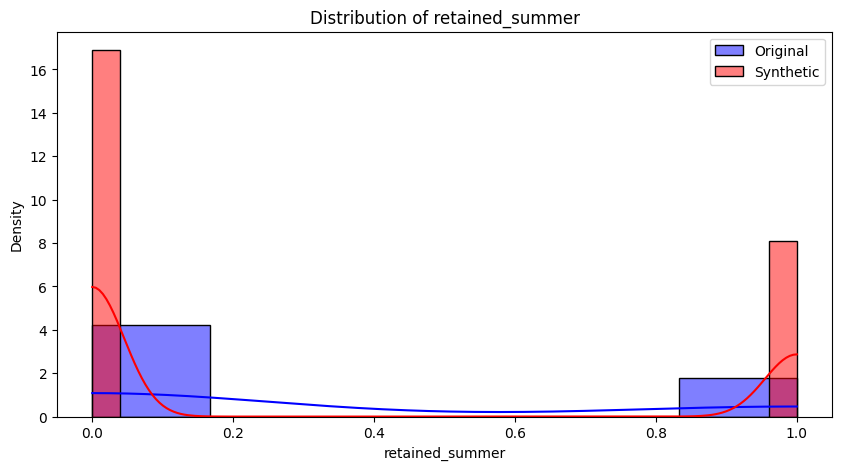

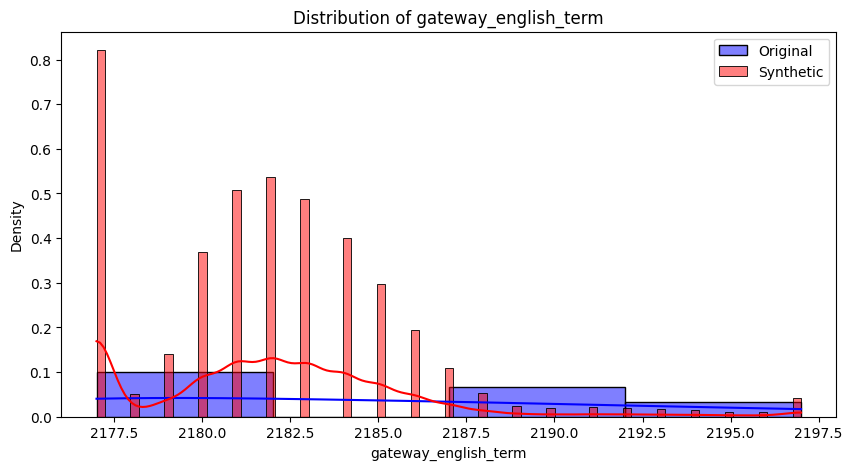

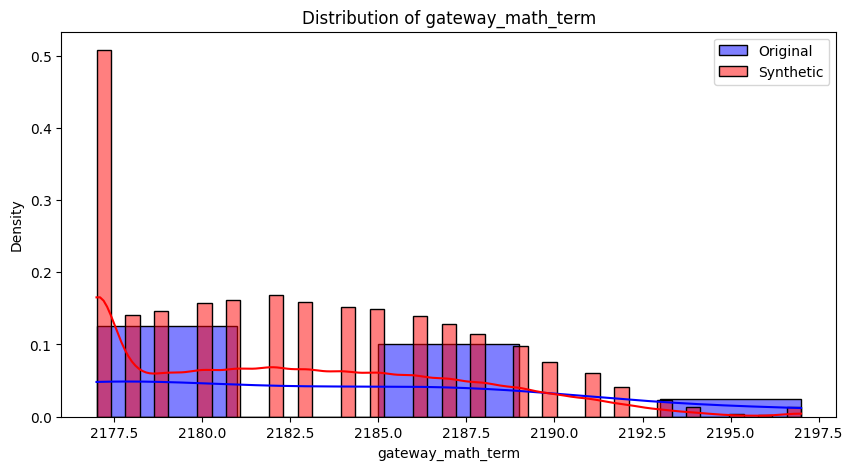

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


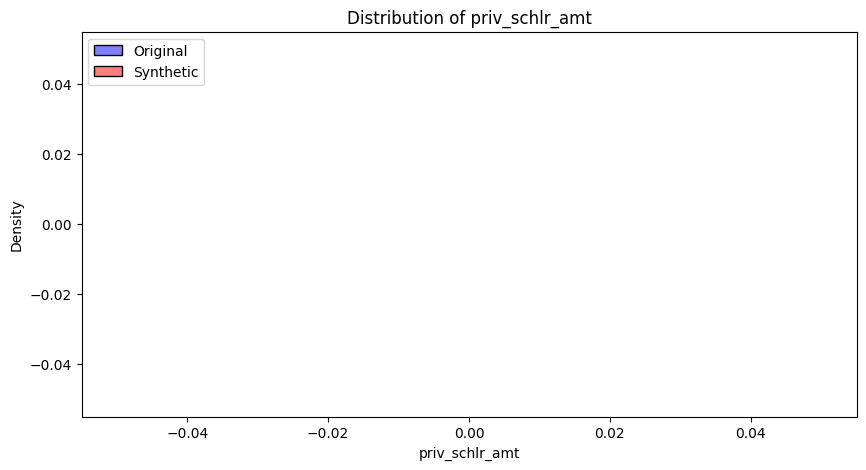

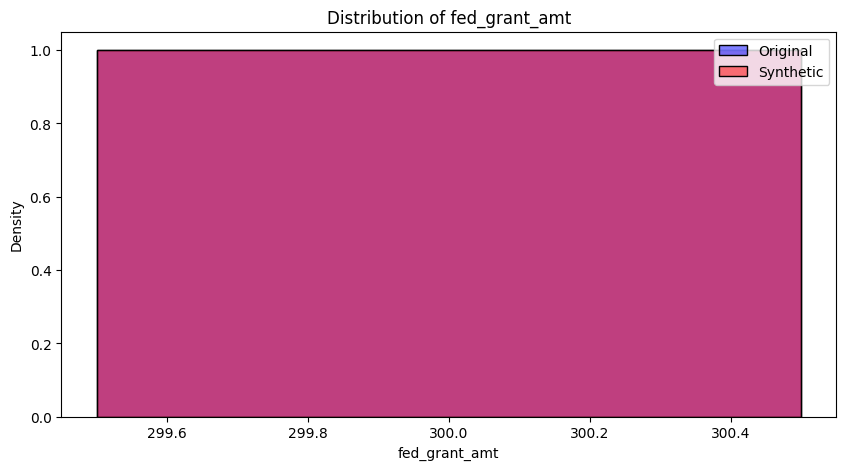

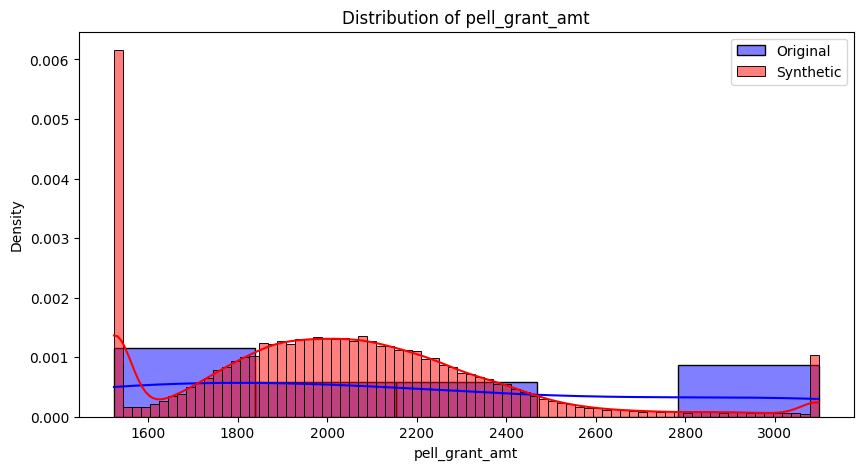

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


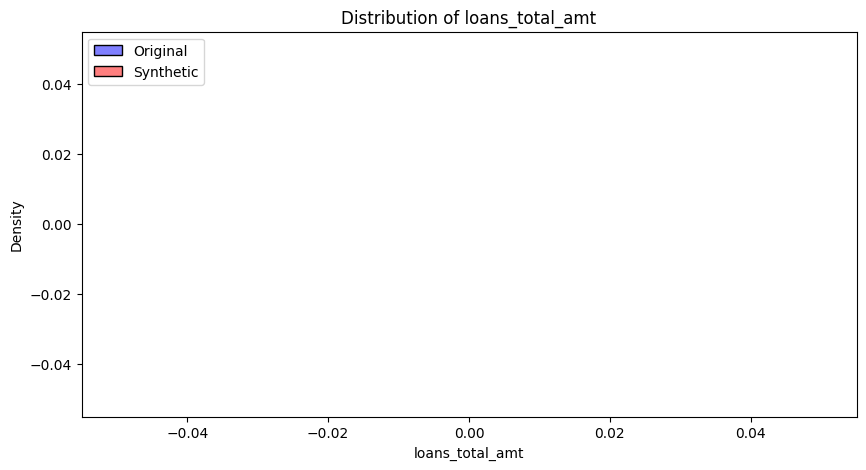

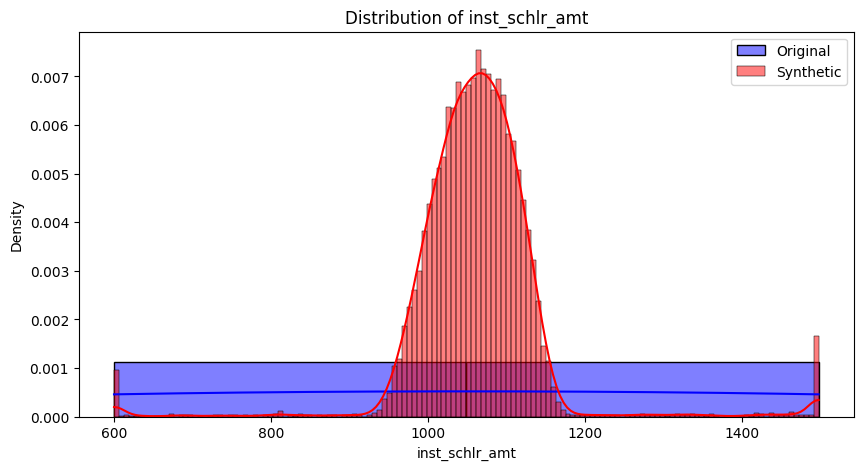

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


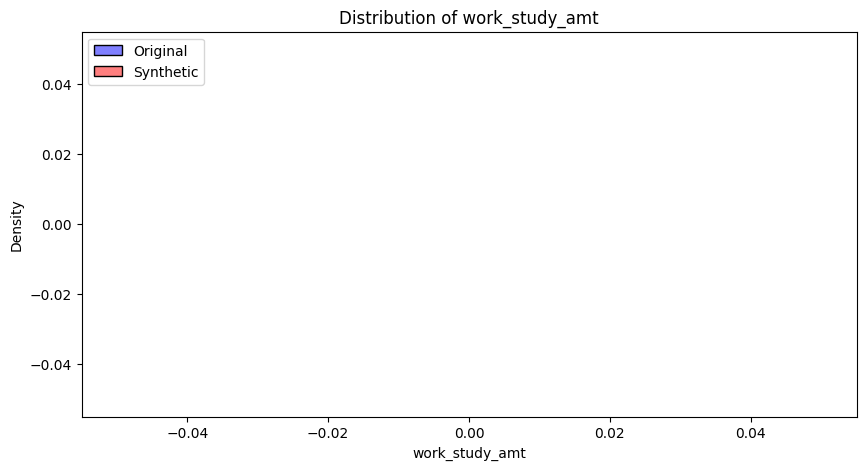

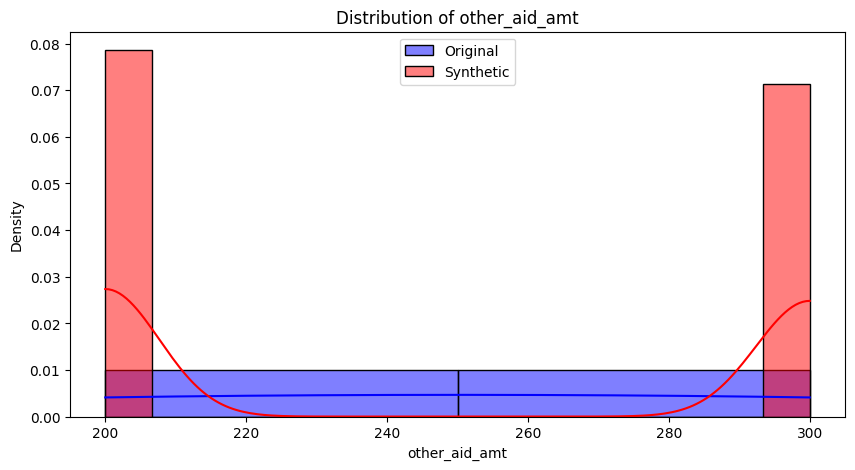

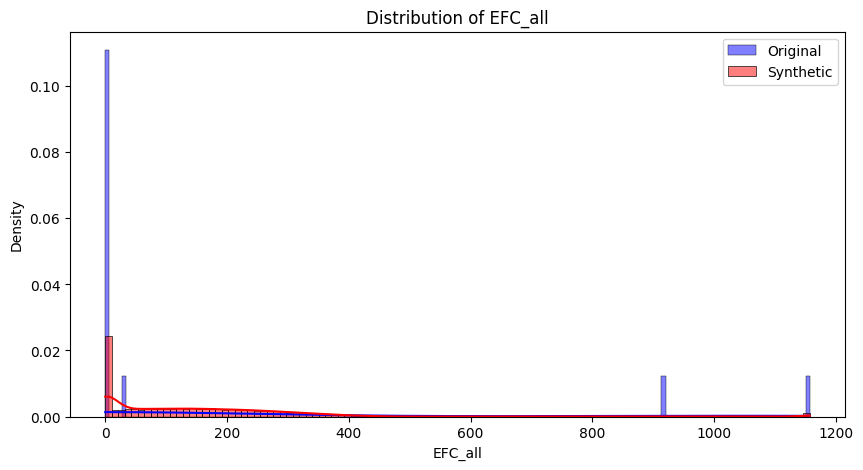

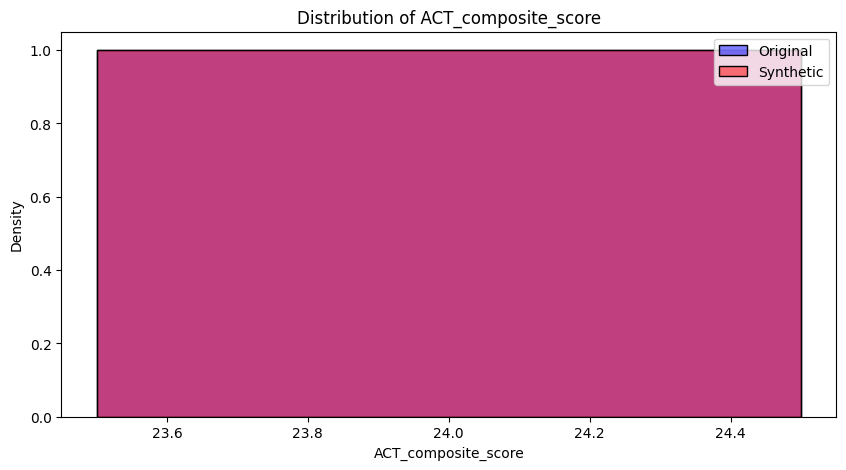

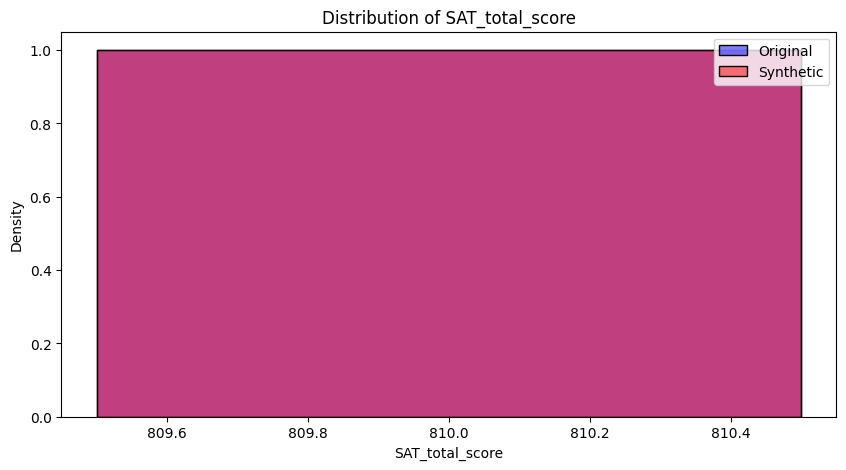

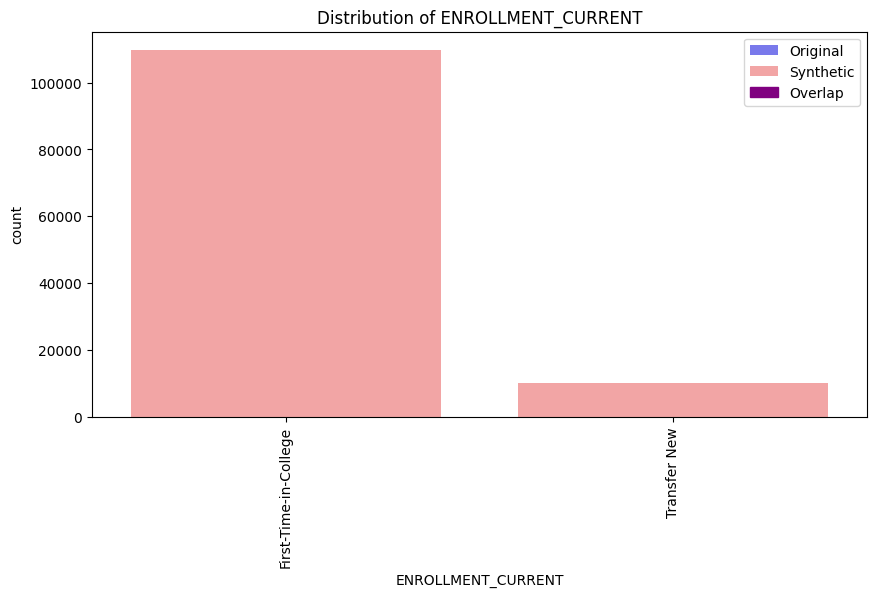

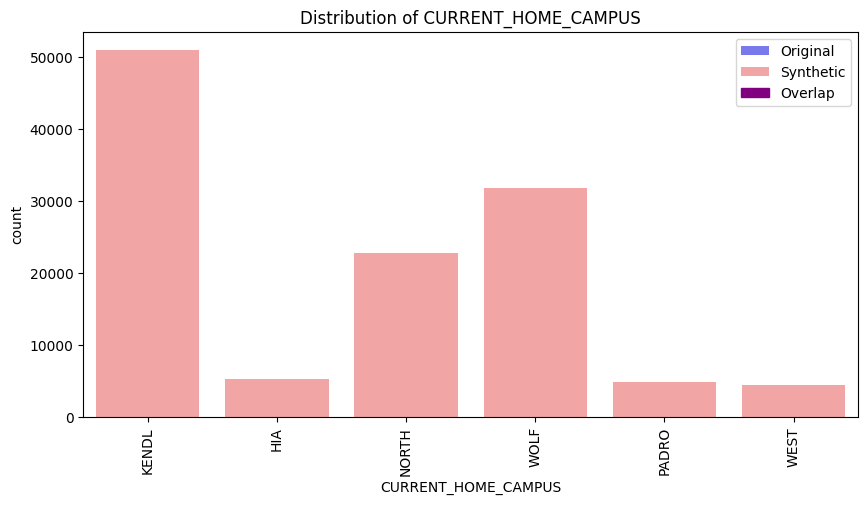

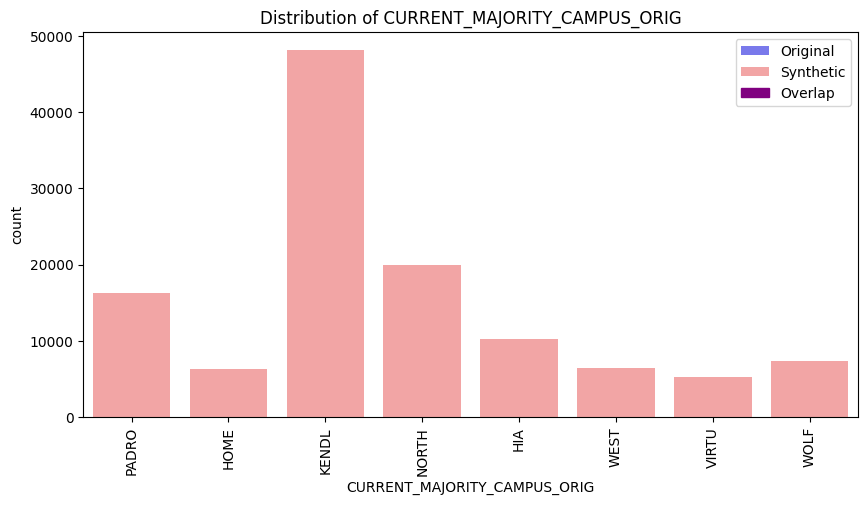

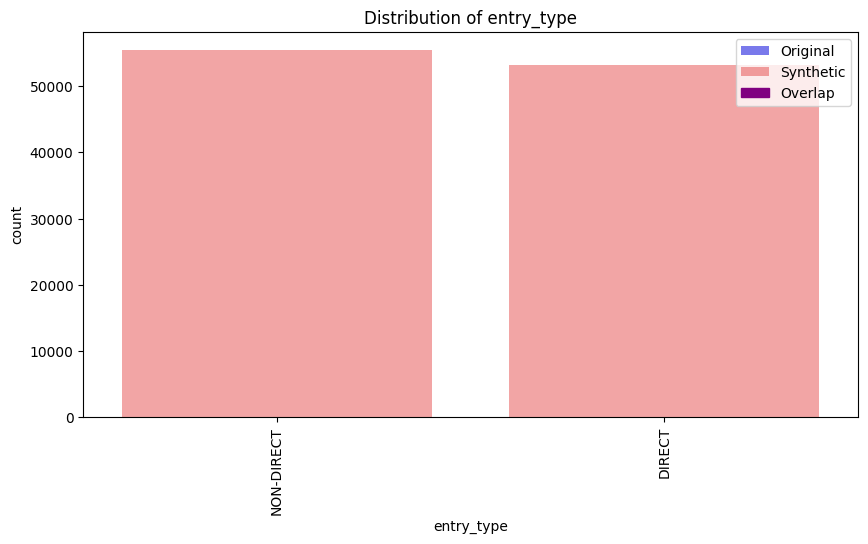

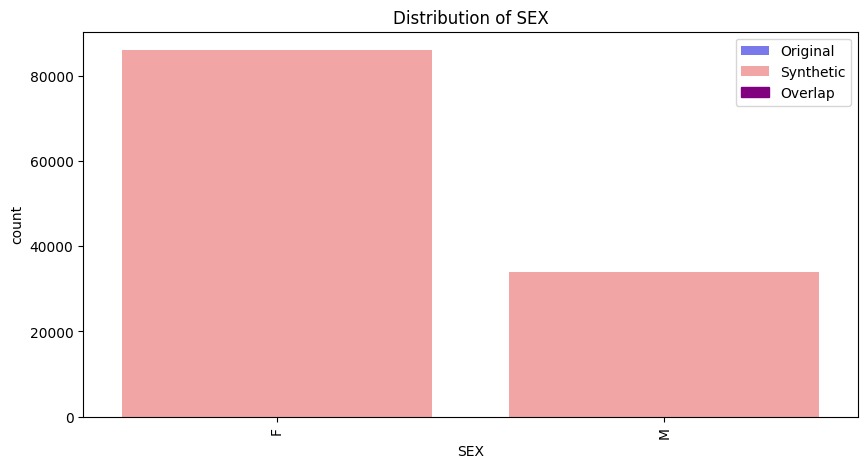

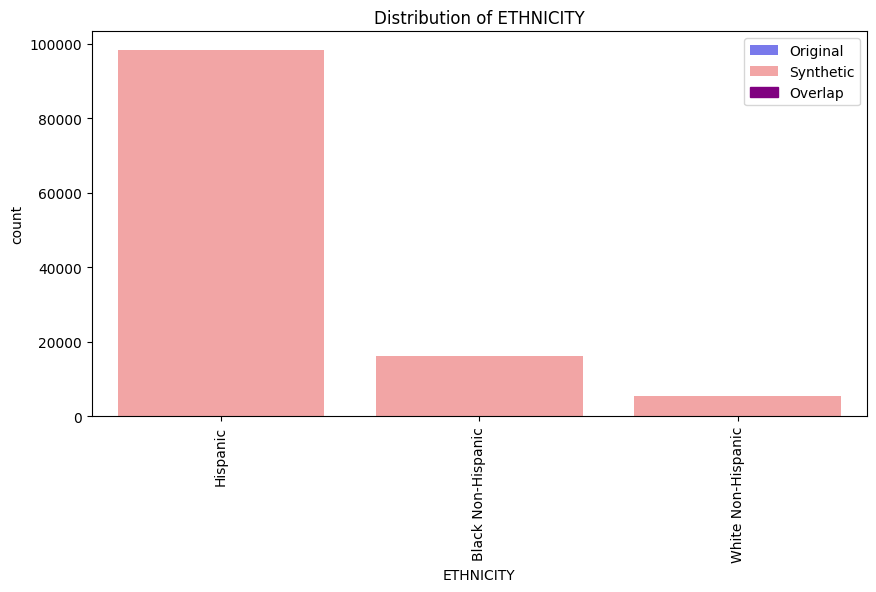

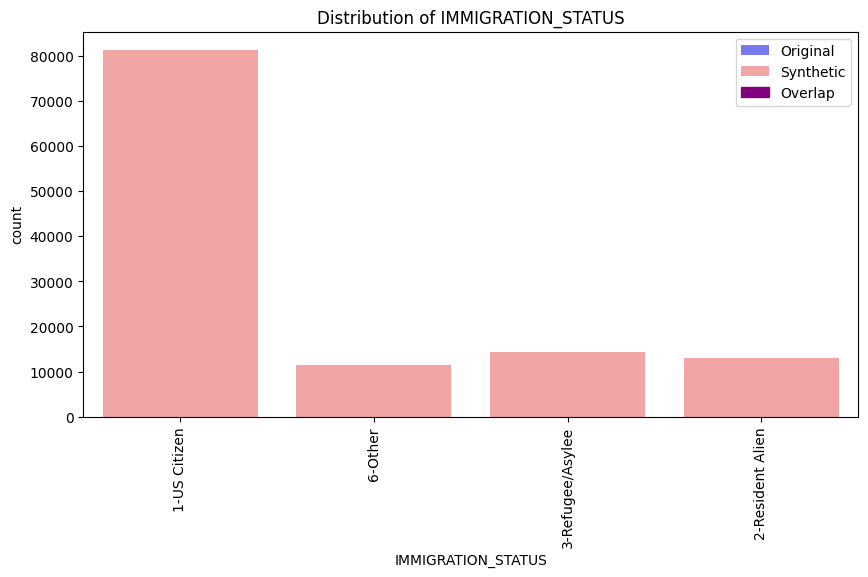

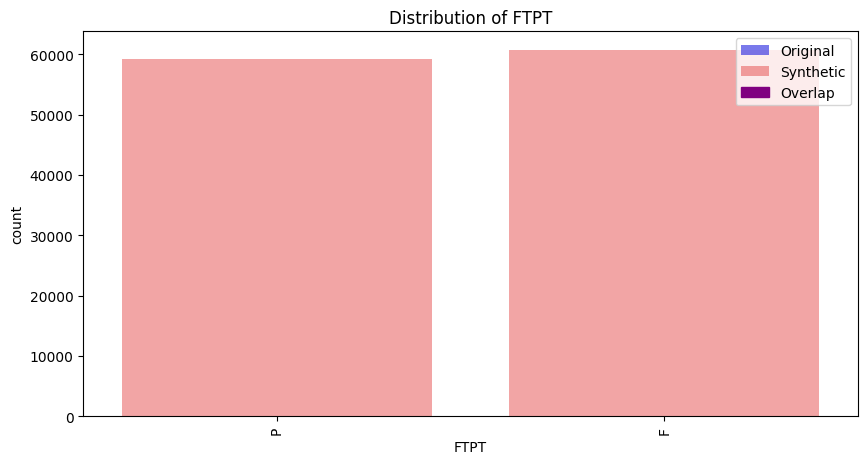

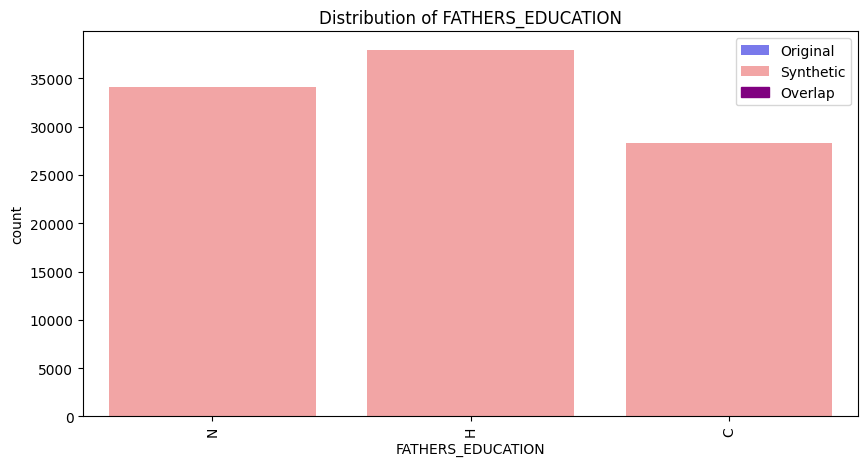

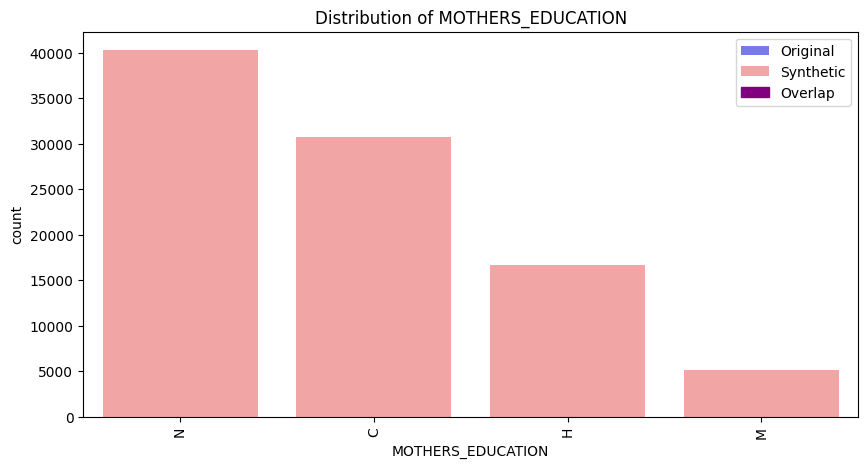

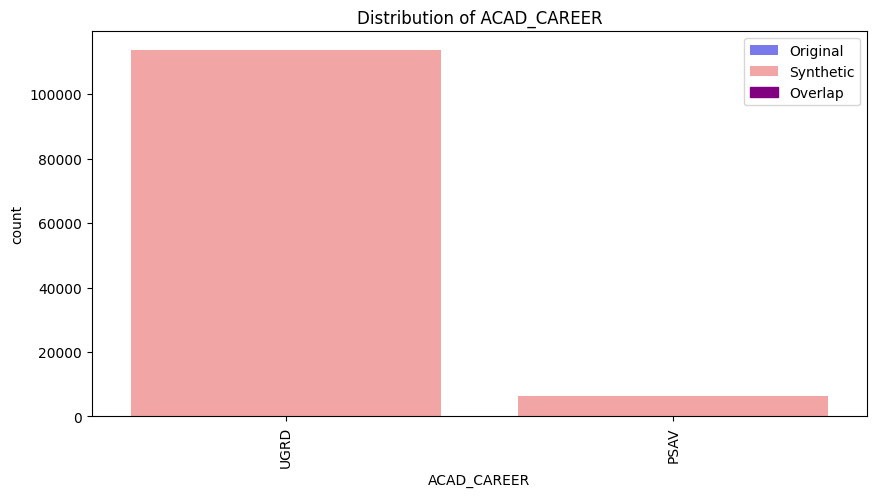

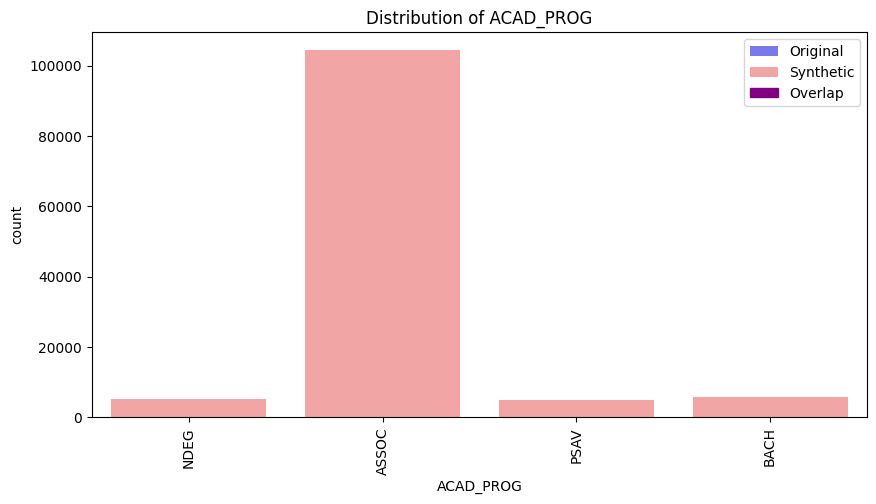

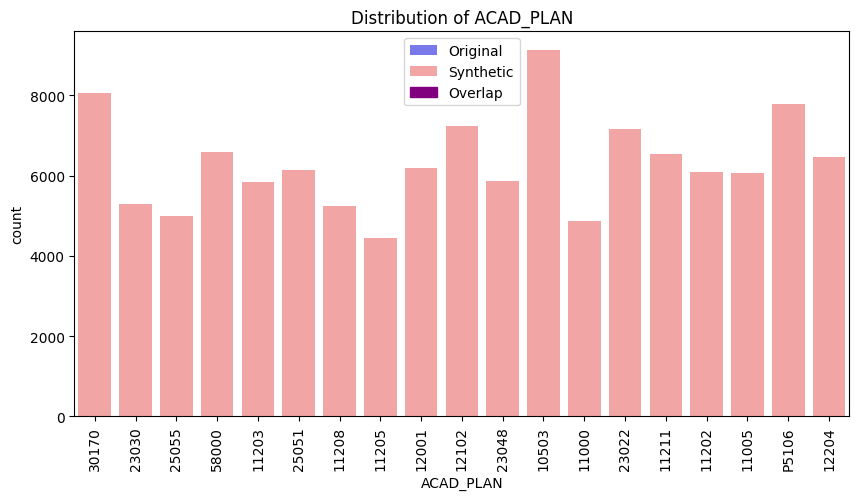

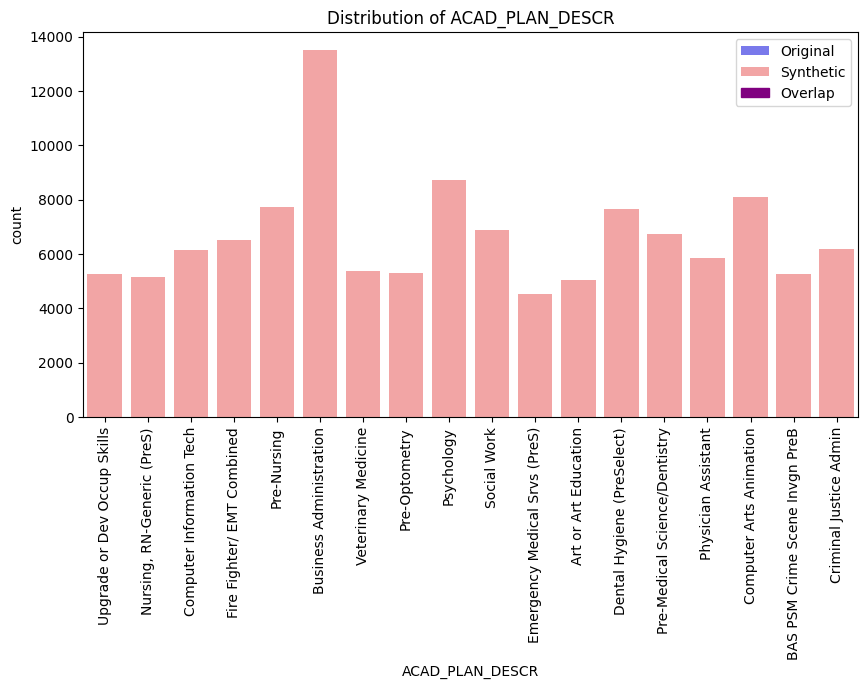

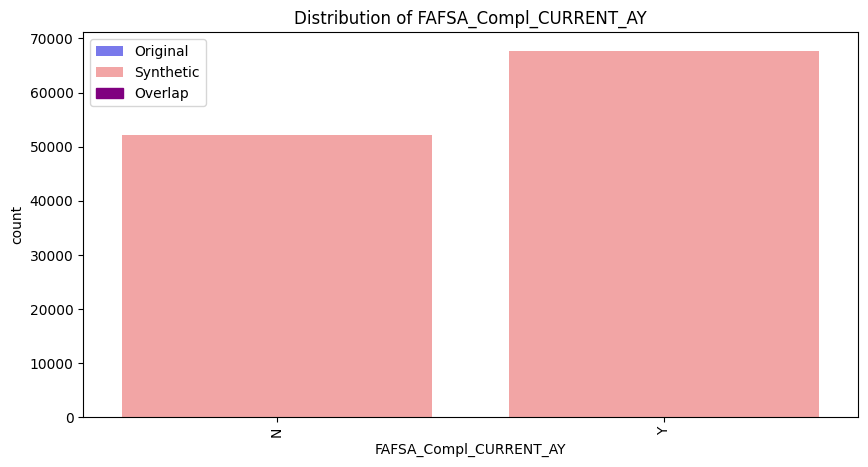

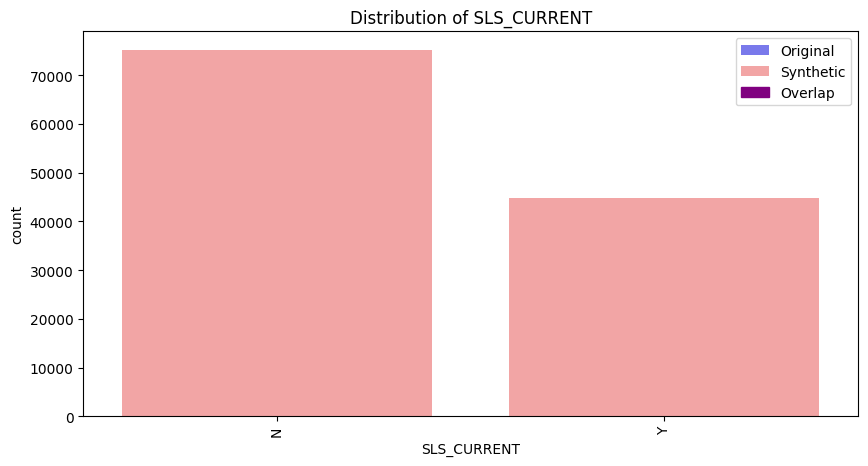

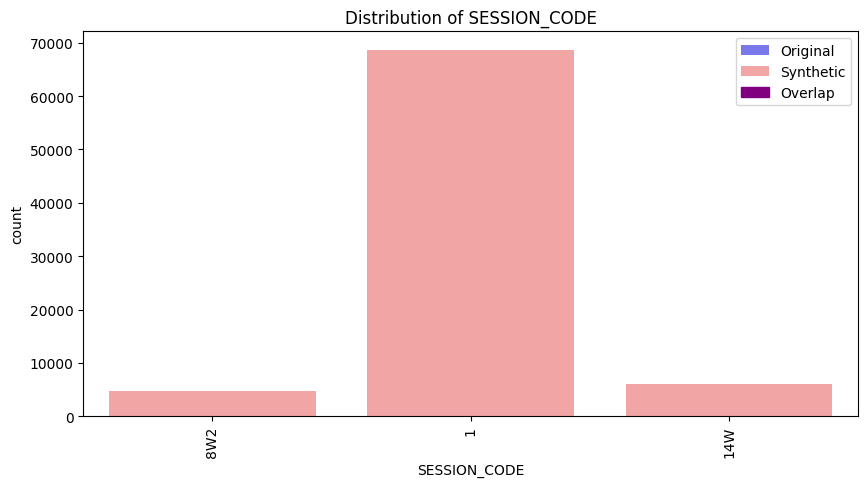

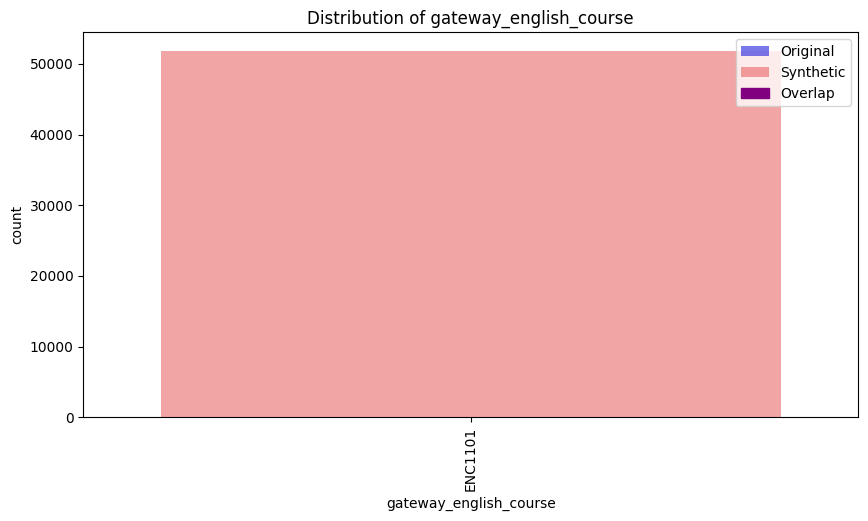

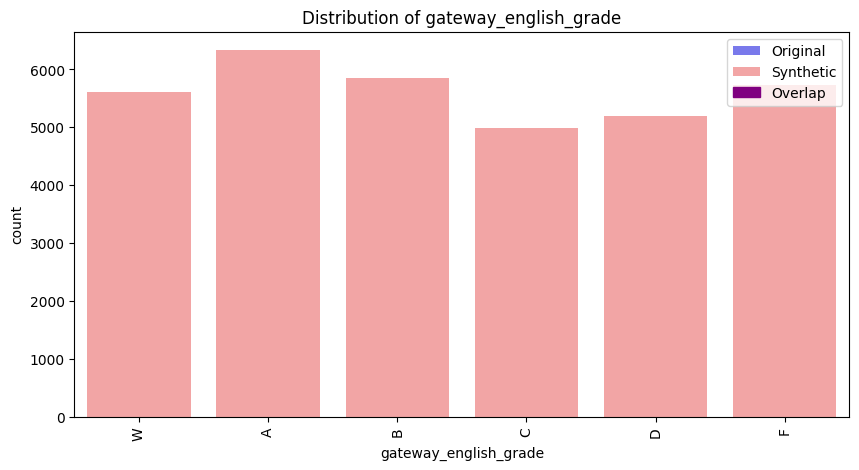

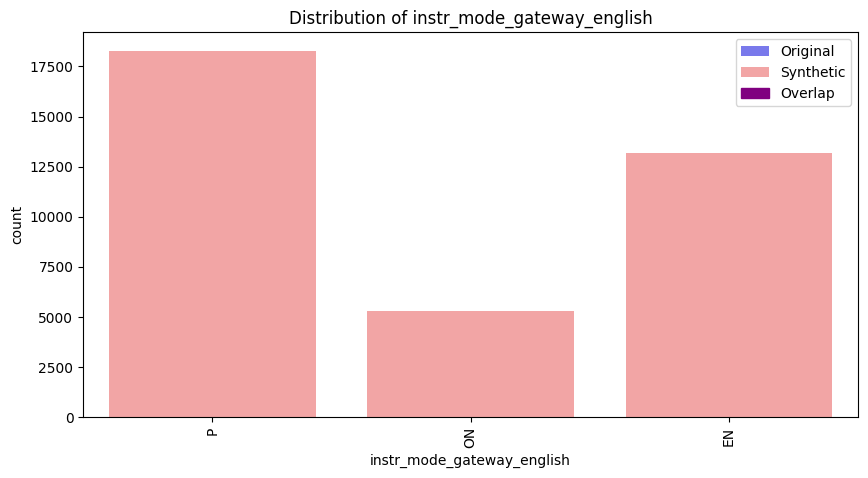

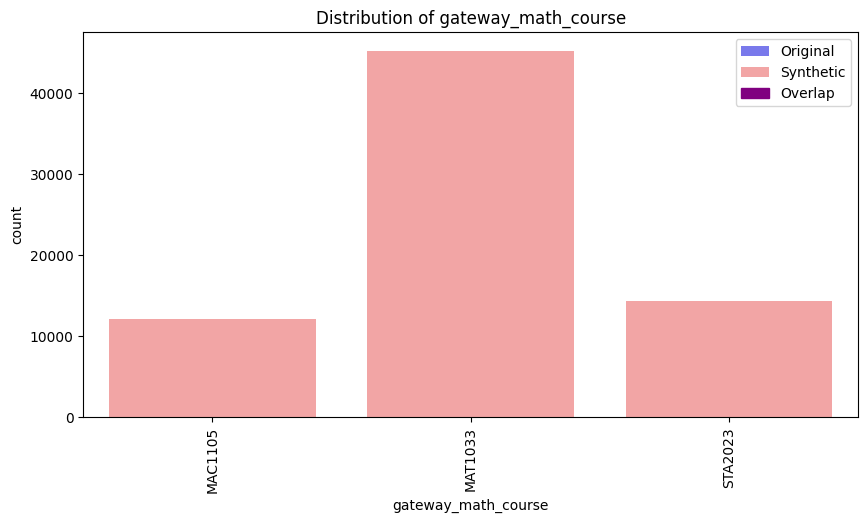

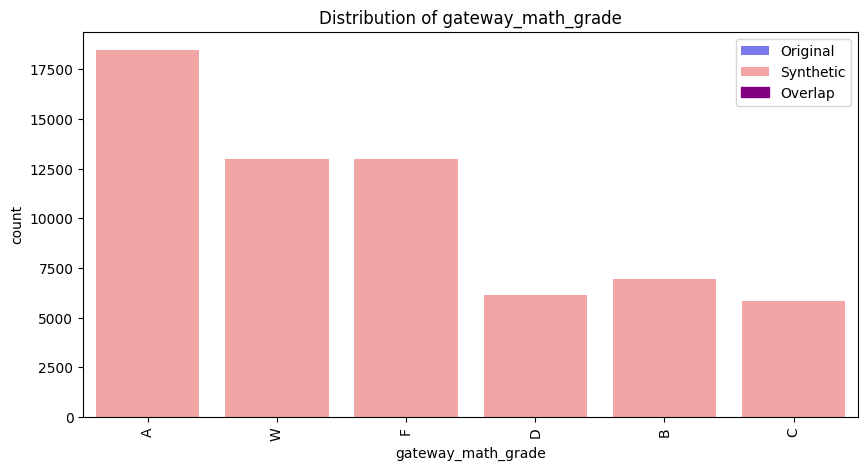

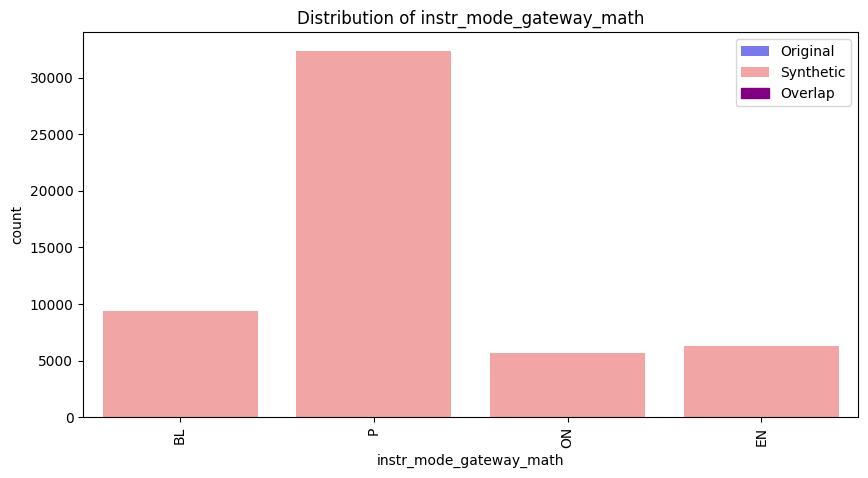

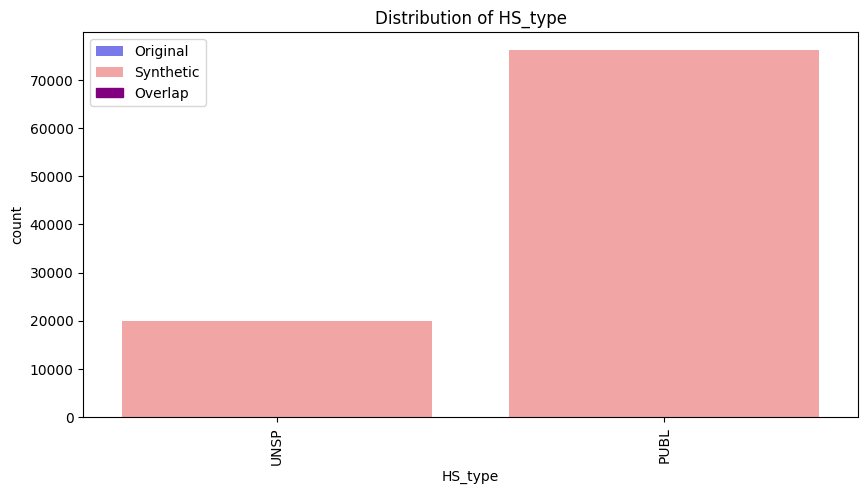


Summary for column: ID
type: numerical
original_mean: 10.5
synthetic_mean: 499300878.452975
original_std: 5.916079783099616
synthetic_std: 288128210.7327835

Summary for column: first_term
type: numerical
original_mean: 2185.5
synthetic_mean: 2180.9057666666668
original_std: 7.451598203705946
synthetic_std: 6.095540422499952

Summary for column: start_date
type: numerical
original_mean: 20179327.15
synthetic_mean: 20176544.325808335
original_std: 7450.853043885576
synthetic_std: 6802.194849025836

Summary for column: veteran_flag
type: numerical
original_mean: 0.05
synthetic_mean: 0.04281666666666667
original_std: 0.22360679774997894
synthetic_std: 0.20244441521909

Summary for column: STRM_CUR_GPA
type: numerical
original_mean: 2.4265
synthetic_mean: 2.83879900556671
original_std: 1.4963860851362771
synthetic_std: 1.167099353681822

Summary for column: credits_attempted_1st_term
type: numerical
original_mean: 10.625
synthetic_mean: 10.188876666666665
original_std: 4.385607441572826
s

In [ ]:
summary = {}

# Function to plot comparison of distributions for numerical columns
def plot_distribution_comparison(original, synthetic, column):
    plt.figure(figsize=(10, 5))
    sns.histplot(original[column], color='blue', label='Original', kde=True, stat="density")
    sns.histplot(synthetic[column], color='red', label='Synthetic', kde=True, stat="density")
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()

    summary[column] = {
        'type': 'numerical',
        'original_mean': original[column].mean(),
        'synthetic_mean': synthetic[column].mean(),
        'original_std': original[column].std(),
        'synthetic_std': synthetic[column].std()
    }

# Function to plot comparison of distributions for categorical columns
def plot_categorical_comparison(original, synthetic, column):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=original[column], color='blue', label='Original', alpha=0.6)
    sns.countplot(x=synthetic[column], color='red', label='Synthetic', alpha=0.4)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)  # Rotate x-axis labels
    handles, labels = plt.gca().get_legend_handles_labels()
    # Add a patch for the overlap (purple) if it exists
    from matplotlib.patches import Patch
    handles.append(Patch(color='purple', label='Overlap'))
    plt.legend(handles=handles)
    plt.show()

    summary[column] = {
        'type': 'categorical',
        'original_unique': original[column].nunique(),
        'synthetic_unique': synthetic[column].nunique()
    }

# Example numerical column plot
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plot_distribution_comparison(data, synthetic_data, column)

# Example categorical column plot
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    plot_categorical_comparison(data, synthetic_data, column)

# Print summary
for column, stats in summary.items():
    print(f"\nSummary for column: {column}")
    for stat, value in stats.items():
        print(f"{stat}: {value}")


# Build the Model using Differential Privacy

In [ ]:
!pip install tensorflow_privacy -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.1 MB/s eta 0:00:00


In [ ]:
# Install necessary packages
!pip install --upgrade sdv -qqq
!pip install tensorflow_privacy -qqq
!pip install shap -qqq
!pip install eli5 -qqq
!pip install imbalanced-learn -qqq

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasSGDOptimizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Load the synthetic data
synthetic_data_path = '/content/mdc_synth_data.csv'
synthetic_data = pd.read_csv(synthetic_data_path)

# Check for missing values
print("Missing values in the dataset:\n", synthetic_data.isnull().sum())

# Replace missing values with the column mean or a suitable value
synthetic_data.fillna(synthetic_data.mean(numeric_only=True), inplace=True)
synthetic_data.fillna('missing', inplace=True)

# Check for infinite values and replace them
synthetic_data.replace([np.inf, -np.inf], np.nan, inplace=True)
synthetic_data.dropna(inplace=True)

# Prepare the data
X = synthetic_data.drop(columns=['retained_spring', 'retained_fall'])
y_spring = synthetic_data['retained_spring']
y_fall = synthetic_data['retained_fall']

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocess the data: One-hot encode categorical variables and scale numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train_spring, y_test_spring = train_test_split(X, y_spring, test_size=0.2, random_state=42)
_, _, y_train_fall, y_test_fall = train_test_split(X, y_fall, test_size=0.2, random_state=42)

# Apply the preprocessor to the training and test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Apply SMOTE to the training data for spring retention
smote = SMOTE(random_state=42)
X_train_spring_resampled, y_train_spring_resampled = smote.fit_resample(X_train, y_train_spring)

# Apply SMOTE to the training data for fall retention
X_train_fall_resampled, y_train_fall_resampled = smote.fit_resample(X_train, y_train_fall)

# Now you can use X_train_spring_resampled, y_train_spring_resampled, X_train_fall_resampled, and y_train_fall_resampled for model training


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Missing values in the dataset:
 ID                                   0
first_term                           0
start_date                           0
ENROLLMENT_CURRENT                   0
CURRENT_HOME_CAMPUS                  0
CURRENT_MAJORITY_CAMPUS_ORIG         0
veteran_flag                         0
STRM_CUR_GPA                         0
credits_attempted_1st_term           0
credits_earned_1st_term              0
spring_term_GPA                  30071
spring_cum_GPA                   29879
entry_type                       11365
HS_UNWGT_GPA                     65891
AGE                                  0
SEX                                  0
ETHNICITY                            0
IMMIGRATION_STATUS                   0
FTPT                                 0
FATHERS_EDUCATION     

In [ ]:
# Define the DP optimizer
optimizer = DPKerasSGDOptimizer(
    l2_norm_clip=1.0,
    noise_multiplier=1.1,
    num_microbatches=1,
    learning_rate=0.01
)

# Build the logistic regression model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for "retained_spring"
batch_size = 32
model.fit(X_train, y_train_spring, epochs=10, batch_size=batch_size, validation_data=(X_test, y_test_spring))

# Evaluate the model
results = model.evaluate(X_test, y_test_spring)
print('Test loss, Test accuracy (retained_spring):', results)

# Train the model for "retained_fall"
model.fit(X_train, y_train_fall, epochs=10, batch_size=batch_size, validation_data=(X_test, y_test_fall))

# Evaluate the model
results = model.evaluate(X_test, y_test_fall)
print('Test loss, Test accuracy (retained_fall):', results)


Epoch 1/10
3000/3000 [==============================] - 21s 6ms/step - loss: 0.7101 - accuracy: 0.7136 - val_loss: 0.7369 - val_accuracy: 0.7190
Epoch 2/10
3000/3000 [==============================] - 15s 5ms/step - loss: 0.8263 - accuracy: 0.7023 - val_loss: 0.8763 - val_accuracy: 0.6839
Epoch 3/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.8341 - accuracy: 0.7000 - val_loss: 0.7929 - val_accuracy: 0.6880
Epoch 4/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.8487 - accuracy: 0.6952 - val_loss: 0.8309 - val_accuracy: 0.6873
Epoch 5/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.9050 - accuracy: 0.6874 - val_loss: 0.9013 - val_accuracy: 0.6888
Epoch 6/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.8972 - accuracy: 0.6910 - val_loss: 0.9455 - val_accuracy: 0.6967
Epoch 7/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.9816 - accuracy: 0.6823 - val_loss: 0.9740 - val_accur

# Hyperparameter Tuning

In [ ]:
!pip install tensorflow_privacy keras-tuner -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasSGDOptimizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import keras_tuner as kt
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger, ProgbarLogger, TensorBoard

# Load the synthetic data
synthetic_data_path = '/content/mdc_synth_data.csv'
synthetic_data = pd.read_csv(synthetic_data_path)

# Print number of records and columns
print(f"Number of records: {synthetic_data.shape[0]}")
print(f"Number of columns: {synthetic_data.shape[1]}")

# Check for missing values
print("Missing values in the dataset:\n", synthetic_data.isnull().sum())

# Replace missing values with the column mean or a suitable value
synthetic_data.fillna(synthetic_data.mean(numeric_only=True), inplace=True)
synthetic_data.fillna('missing', inplace=True)

# Check for infinite values and replace them
synthetic_data.replace([np.inf, -np.inf], np.nan, inplace=True)
synthetic_data.dropna(inplace=True)

# Prepare the data
X = synthetic_data.drop(columns=['retained_spring', 'retained_fall'])
y_spring = synthetic_data['retained_spring']
y_fall = synthetic_data['retained_fall']

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocess the data: One-hot encode categorical variables and scale numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train_spring, y_test_spring = train_test_split(X, y_spring, test_size=0.2, random_state=42)
_, _, y_train_fall, y_test_fall = train_test_split(X, y_fall, test_size=0.2, random_state=42)

# Apply the preprocessor to the training and test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


Number of records: 120000
Number of columns: 52
Missing values in the dataset:
 ID                                   0
first_term                           0
start_date                           0
ENROLLMENT_CURRENT                   0
CURRENT_HOME_CAMPUS                  0
CURRENT_MAJORITY_CAMPUS_ORIG         0
veteran_flag                         0
STRM_CUR_GPA                         0
credits_attempted_1st_term           0
credits_earned_1st_term              0
spring_term_GPA                  30071
spring_cum_GPA                   29879
entry_type                       11365
HS_UNWGT_GPA                     65891
AGE                                  0
SEX                                  0
ETHNICITY                            0
IMMIGRATION_STATUS                   0
FTPT                                 0
FATHERS_EDUCATION                19527
MOTHERS_EDUCATION                27080
first_gen_college                16116
zip5                                 0
ACAD_CAREER            

In [ ]:
# Check the balance of the target variables
def check_target_balance(y, target_name):
    balance = y.value_counts(normalize=True)
    print(f"Class distribution for {target_name}:")
    print(balance)
    return balance

# Check the balance for retained_spring
spring_balance = check_target_balance(y_spring, 'retained_spring')

# Check the balance for retained_fall
fall_balance = check_target_balance(y_fall, 'retained_fall')


Class distribution for retained_spring:
retained_spring
1    0.784933
0    0.215067
Name: proportion, dtype: float64
Class distribution for retained_fall:
retained_fall
1    0.538092
0    0.461908
Name: proportion, dtype: float64


In [ ]:
pip install -U imbalanced-learn -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE

# Function to apply SMOTE and return balanced data
def apply_smote(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

# Apply SMOTE to balance the training data for retained_spring
X_train_spring_resampled, y_train_spring_resampled = apply_smote(X_train, y_train_spring)

# Apply SMOTE to balance the training data for retained_fall
X_train_fall_resampled, y_train_fall_resampled = apply_smote(X_train, y_train_fall)

# Check the balance of the resampled data
print("Class distribution for retained_spring after SMOTE:")
print(pd.Series(y_train_spring_resampled).value_counts(normalize=True))

print("\nClass distribution for retained_fall after SMOTE:")
print(pd.Series(y_train_fall_resampled).value_counts(normalize=True))


Class distribution for retained_spring after SMOTE:
retained_spring
1    0.5
0    0.5
Name: proportion, dtype: float64

Class distribution for retained_fall after SMOTE:
retained_fall
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
def build_model(hp):
    model = tf.keras.Sequential()

    # Add layers with variable number of neurons and layers (2-5 layers)
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int('units_' + str(i), min_value=8, max_value=64, step=8),
            activation='relu',
            kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2', 0.01, 0.1, step=0.01))
        ))
    # Add the final layer with sigmoid activation
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
    if optimizer_choice == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', 0.001, 0.1, step=0.001))
    elif optimizer_choice == 'sgd':
        optimizer = DPKerasSGDOptimizer(
            l2_norm_clip=1.0,
            noise_multiplier=hp.Float('noise_multiplier', 0.5, 2.0, step=0.1),
            num_microbatches=1,
            learning_rate=hp.Float('learning_rate', 0.001, 0.1, step=0.001),
            momentum=hp.Float('momentum', 0.0, 0.9, step=0.1)
        )
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp.Float('learning_rate', 0.001, 0.1, step=0.001))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
class BestValAccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get("val_accuracy")
        if current_val_accuracy is not None:
            print(f"Validation accuracy after epoch {epoch + 1}: {current_val_accuracy}")


In [ ]:
tuner_spring = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='dp_logistic_regression_spring'
)

tuner_fall = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='dp_logistic_regression_fall'
)


In [ ]:
def get_callbacks():
    return [
        EarlyStopping(monitor='val_loss', patience=5, verbose=1),
        ModelCheckpoint(filepath='/content/best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1),
        CSVLogger('/content/training_log.csv'),
        ProgbarLogger(),
        TensorBoard(log_dir='/content/logs'),
        BestValAccuracyCallback()
    ]


In [ ]:
# Hyperparameter tuning for retained_spring
tuner_spring.search(X_train, y_train_spring, epochs=10, validation_data=(X_test, y_test_spring), batch_size=32, callbacks=get_callbacks())

# Get the best hyperparameters and model for retained_spring
best_hp_spring = tuner_spring.get_best_hyperparameters()[0]
print(f"Best hyperparameters for retained_spring: {best_hp_spring.values}")

best_model_spring = tuner_spring.hypermodel.build(best_hp_spring)
history_spring = best_model_spring.fit(X_train, y_train_spring, epochs=10, validation_data=(X_test, y_test_spring), batch_size=32, callbacks=get_callbacks())

# Evaluate the best model for retained_spring
results_spring = best_model_spring.evaluate(X_test, y_test_spring)
print('Test loss, Test accuracy (retained_spring):', results_spring)

# Save the best model for retained_spring
best_model_spring.save('/content/best_model_spring.keras')

# Print the best validation accuracy for retained_spring
best_val_accuracy_spring = max(trial.metrics.get_last_value('val_accuracy') for trial in tuner_spring.oracle.get_best_trials(num_trials=1))
print(f"Best validation accuracy for retained_spring: {best_val_accuracy_spring}")

# Hyperparameter tuning for retained_fall
tuner_fall.search(X_train, y_train_fall, epochs=10, validation_data=(X_test, y_test_fall), batch_size=32, callbacks=get_callbacks())

# Get the best hyperparameters and model for retained_fall
best_hp_fall = tuner_fall.get_best_hyperparameters()[0]
print(f"Best hyperparameters for retained_fall: {best_hp_fall.values}")

best_model_fall = tuner_fall.hypermodel.build(best_hp_fall)
history_fall = best_model_fall.fit(X_train, y_train_fall, epochs=10, validation_data=(X_test, y_test_fall), batch_size=32, callbacks=get_callbacks())

# Evaluate the best model for retained_fall
results_fall = best_model_fall.evaluate(X_test, y_test_fall)
print('Test loss, Test accuracy (retained_fall):', results_fall)

# Save the best model for retained_fall
best_model_fall.save('/content/best_model_fall.keras')

# Print the best validation accuracy for retained_fall
best_val_accuracy_fall = max(trial.metrics.get_last_value('val_accuracy') for trial in tuner_fall.oracle.get_best_trials(num_trials=1))
print(f"Best validation accuracy for retained_fall: {best_val_accuracy_fall}")


Trial 1 Complete [00h 05m 47s]
val_accuracy: 0.5334166884422302

Best val_accuracy So Far: 0.5334166884422302
Total elapsed time: 00h 05m 47s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
1                 |3                 |num_layers
48                |24                |units_0
0.07              |0.06              |l2
sgd               |rmsprop           |optimizer
0.03              |0.02              |learning_rate
40                |8                 |units_1
32                |8                 |units_2

Epoch 1/10
      0/Unknown - 1s 0s/sample - loss: 6.0016 - accuracy: 0.5250

      0/Unknown - 13s 0s/sample - loss: 45.3085 - accuracy: 0.5033
Epoch 1: val_loss improved from inf to 59.16965, saving model to /content/best_model.h5
3000/3000 [==============================] - 14s 5ms/sample - loss: 45.3555 - accuracy: 0.5033 - val_loss: 59.1697 - val_accuracy: 0.5096 - lr: 0.0300
Validation accuracy after epoch 1: 0.5095833539962769
Epoch 2/10
   0/3000 [..............................] - ETA: 0s - loss: 58.3112 - accuracy: 0.5085
Epoch 2: val_loss improved from 59.16965 to 56.15415, saving model to /content/best_model.h5
3000/3000 [==============================] - 13s 4ms/sample - loss: 58.3043 - accuracy: 0.5083 - val_loss: 56.1542 - val_accuracy: 0.5062 - lr: 0.0300
Validation accuracy after epoch 2: 0.5062083601951599
Epoch 3/10
   0/3000 [..............................] - ETA: 0s - loss: 59.3990 - accuracy: 0.5033
Epoch 3: val_loss did not improve from 56.15415
3000/3000 [==============================] - 13s 4ms/sample - loss: 59.4006 - accuracy: 0.5033 -

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasSGDOptimizer
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Load the best models with custom_objects including the correct class
best_model_spring = tf.keras.models.load_model('/content/best_model_spring.keras', custom_objects={'DPKerasSGDOptimizer': DPKerasSGDOptimizer})
best_model_fall = tf.keras.models.load_model('/content/best_model_fall.keras', custom_objects={'DPKerasSGDOptimizer': DPKerasSGDOptimizer})

# Plot learning curves
def plot_learning_curves(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'Training and validation accuracy: {title}')
    plt.legend()
    plt.figure()

    plt.figure(figsize=(12, 8))
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'Training and validation loss: {title}')
    plt.legend()
    plt.show()

# Assuming history_spring and history_fall are the training histories for the best models
plot_learning_curves(history_spring, 'Retained Spring')
plot_learning_curves(history_fall, 'Retained Fall')

# Plot model architecture
plot_model(best_model_spring, to_file='/content/best_model_spring_architecture.png', show_shapes=True, show_layer_names=True)
plot_model(best_model_fall, to_file='/content/best_model_fall_architecture.png', show_shapes=True, show_layer_names=True)

# Display model summary
print("Model Summary for Retained Spring:")
best_model_spring.summary()

print("\nModel Summary for Retained Fall:")
best_model_fall.summary()


In [ ]:
import shap
import numpy as np
import tensorflow as tf

# Assuming you have already defined X_train, X_test, and best_model_spring

# Use a smaller sample for the background data
background = shap.sample(X_train, 10)  # Sample 100 instances

# Create a SHAP explainer with the reduced background sample
explainer = shap.KernelExplainer(best_model_spring.predict, background)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test, nsamples=10)  # Reduce nsamples for faster computation

# Plot the feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [ ]:
import shap
import numpy as np
import tensorflow as tf

# Assuming you have already defined X_train, X_test, and best_model_spring

# Use a smaller sample for the background data
background = shap.sample(X_train, 10)  # Sample 100 instances

# Create a SHAP explainer with the reduced background sample
explainer = shap.KernelExplainer(best_model_fall.predict, background)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test, nsamples=10)  # Reduce nsamples for faster computation

# Plot the feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [ ]:
# import shap
# import matplotlib.pyplot as plt

# # Function to compute SHAP values and plot feature importance
# def plot_shap_importance(model, X, feature_names, title):
#     explainer = shap.KernelExplainer(model.predict, X)
#     shap_values = explainer.shap_values(X, nsamples=100)
#     shap.summary_plot(shap_values, X, feature_names=feature_names, plot_type="bar", show=False)
#     plt.title(title)
#     plt.show()

# # Assuming numerical_columns and preprocessor are defined earlier in the script
# feature_names = numerical_columns.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out().tolist()

# # Load the best models with custom_objects including the correct class
# best_model_spring = tf.keras.models.load_model('/content/best_model_spring.keras', custom_objects={'DPKerasSGDOptimizer': DPKerasSGDOptimizer})
# best_model_fall = tf.keras.models.load_model('/content/best_model_fall.keras', custom_objects={'DPKerasSGDOptimizer': DPKerasSGDOptimizer})

# # Compute and plot SHAP values for retained_spring model
# print("Feature importance for retained_spring:")
# plot_shap_importance(best_model_spring, X_test, feature_names, title='Feature Importance for Retained Spring')

# # Compute and plot SHAP values for retained_fall model
# print("\nFeature importance for retained_fall:")
# plot_shap_importance(best_model_fall, X_test, feature_names, title='Feature Importance for Retained Fall')


# Feature Importance

In [ ]:
# # Install necessary packages
# !pip install --upgrade sdv -qqq
# !pip install tensorflow_privacy -qqq
# !pip install shap -qqq
# !pip install eli5 -qqq

# import tensorflow as tf
# import tensorflow_privacy

# print(tf.__version__)
# print(tensorflow_privacy.__version__)


In [ ]:
# import tensorflow as tf
# from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasSGDOptimizer

# # Register the custom optimizer directly without subclassing
# tf.keras.utils.get_custom_objects().update({'CustomDPKerasSGDOptimizer': DPKerasSGDOptimizer})

# # Ensure the custom objects dictionary includes the registered class
# custom_objects = {'CustomDPKerasSGDOptimizer': DPKerasSGDOptimizer}


In [ ]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasSGDOptimizer
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split
# import shap

# # Load the synthetic data
# synthetic_data_path = '/content/mdc_synth_data.csv'
# synthetic_data = pd.read_csv(synthetic_data_path)

# # Prepare the data
# X = synthetic_data.drop(columns=['retained_spring', 'retained_fall'])
# y_spring = synthetic_data['retained_spring']
# y_fall = synthetic_data['retained_fall']

# # Identify categorical and numerical columns
# categorical_columns = X.select_dtypes(include=['object', 'category']).columns
# numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# # Preprocess the data: One-hot encode categorical variables and scale numerical variables
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_columns),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
#     ]
# )

# # Apply the preprocessor to the data
# X_processed = preprocessor.fit_transform(X)

# # Split the data into training and testing sets
# X_train, X_test, y_train_spring, y_test_spring = train_test_split(X_processed, y_spring, test_size=0.2, random_state=42)
# _, _, y_train_fall, y_test_fall = train_test_split(X_processed, y_fall, test_size=0.2, random_state=42)

# # Load the best models with custom_objects including the correct class
# best_model_spring = tf.keras.models.load_model('/content/best_model_spring.keras', custom_objects=custom_objects)
# best_model_fall = tf.keras.models.load_model('/content/best_model_fall.keras', custom_objects=custom_objects)

# # Function to compute SHAP values and plot feature importance
# def plot_shap_importance(model, X, feature_names):
#     explainer = shap.KernelExplainer(model.predict, X)
#     shap_values = explainer.shap_values(X)
#     shap.summary_plot(shap_values, X, feature_names=feature_names, plot_type="bar")

# # Get feature names from the preprocessor
# feature_names = numerical_columns.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out().tolist()

# # Compute and plot SHAP values for retained_spring model
# print("Feature importance for retained_spring:")
# plot_shap_importance(best_model_spring, X_test, feature_names)

# # Compute and plot SHAP values for retained_fall model
# print("\nFeature importance for retained_fall:")
# plot_shap_importance(best_model_fall, X_test, feature_names)


# Feature Importance with Random Forest

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline
# import eli5
# from eli5.sklearn import PermutationImportance
# import matplotlib.pyplot as plt

# # Load the synthetic data
# synthetic_data_path = '/content/mdc_synth_data.csv'
# synthetic_data = pd.read_csv(synthetic_data_path)

# # Print number of records and columns
# print(f"Number of records: {synthetic_data.shape[0]}")
# print(f"Number of columns: {synthetic_data.shape[1]}")

# # Check for missing values
# print("Missing values in the dataset:\n", synthetic_data.isnull().sum())

# # Check the target columns for empty values
# print("Unique values in retained_spring:", synthetic_data['retained_spring'].unique())
# print("Unique values in retained_fall:", synthetic_data['retained_fall'].unique())

# # Prepare the data
# X = synthetic_data.drop(columns=['retained_spring', 'retained_fall'])
# y_spring = synthetic_data['retained_spring']
# y_fall = synthetic_data['retained_fall']

# # Check the balance of the target variables
# print("Class distribution for retained_spring:\n", y_spring.value_counts())
# print("Class distribution for retained_fall:\n", y_fall.value_counts())

# # Identify categorical and numerical columns
# categorical_columns = X.select_dtypes(include=['object', 'category']).columns
# numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# # Preprocess the data: One-hot encode categorical variables and scale numerical variables
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', Pipeline([
#             ('imputer', SimpleImputer(strategy='mean')),
#             ('scaler', StandardScaler())
#         ]), numerical_columns),
#         ('cat', Pipeline([
#             ('imputer', SimpleImputer(strategy='most_frequent')),
#             ('onehot', OneHotEncoder(handle_unknown='ignore'))
#         ]), categorical_columns)
#     ]
# )

# # Split the data into training and testing sets
# X_train, X_test, y_train_spring, y_test_spring = train_test_split(X, y_spring, test_size=0.2, random_state=42)
# _, _, y_train_fall, y_test_fall = train_test_split(X, y_fall, test_size=0.2, random_state=42)

# # Apply the preprocessor to the training and test data
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)

# # Get feature names
# feature_names = numerical_columns.tolist() + preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out().tolist()

# # Train a Random Forest model for retained_spring
# rf_spring = RandomForestClassifier(random_state=42)
# rf_spring.fit(X_train, y_train_spring)

# # Compute feature importance using permutation importance
# perm_spring = PermutationImportance(rf_spring, random_state=42).fit(X_test, y_test_spring)

# # Function to plot top feature importance
# def plot_top_feature_importance(perm, feature_names, top_n=20):
#     importance = perm.feature_importances_
#     std = perm.feature_importances_std_
#     sorted_idx = np.argsort(importance)[-top_n:]
#     pos = np.arange(sorted_idx.shape[0])
#     plt.figure(figsize=(12, 8))
#     plt.barh(pos, importance[sorted_idx], xerr=std[sorted_idx], align='center')
#     plt.yticks(pos, np.array(feature_names)[sorted_idx])
#     plt.xlabel('Importance Score')
#     plt.title('Top Feature Importance')
#     plt.show()

# # Display and plot top feature importance for retained_spring
# plot_top_feature_importance(perm_spring, feature_names, top_n=20)

# # Train a Random Forest model for retained_fall
# rf_fall = RandomForestClassifier(random_state=42)
# rf_fall.fit(X_train, y_train_fall)

# # Compute feature importance using permutation importance
# perm_fall = PermutationImportance(rf_fall, random_state=42).fit(X_test, y_test_fall)

# # Display and plot top feature importance for retained_fall
# plot_top_feature_importance(perm_fall, feature_names, top_n=20)


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline
# import eli5
# from eli5.sklearn import PermutationImportance
# import matplotlib.pyplot as plt

# # Load the synthetic data
# synthetic_data_path = '/content/mdc_synth_data.csv'
# synthetic_data = pd.read_csv(synthetic_data_path)

# # Print number of records and columns
# print(f"Number of records: {synthetic_data.shape[0]}")
# print(f"Number of columns: {synthetic_data.shape[1]}")

# # Check for missing values
# print("Missing values in the dataset:\n", synthetic_data.isnull().sum())

# # Check the target columns for empty values
# print("Unique values in retained_spring:", synthetic_data['retained_spring'].unique())
# print("Unique values in retained_fall:", synthetic_data['retained_fall'].unique())

# # Prepare the data
# X = synthetic_data.drop(columns=['retained_spring', 'retained_fall'])
# y_spring = synthetic_data['retained_spring']
# y_fall = synthetic_data['retained_fall']

# # Check the balance of the target variables
# print("Class distribution for retained_spring:\n", y_spring.value_counts())
# print("Class distribution for retained_fall:\n", y_fall.value_counts())

# # Identify categorical and numerical columns
# categorical_columns = X.select_dtypes(include=['object', 'category']).columns
# numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# # Preprocess the data: One-hot encode categorical variables and scale numerical variables
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', Pipeline([
#             ('imputer', SimpleImputer(strategy='mean')),
#             ('scaler', StandardScaler())
#         ]), numerical_columns),
#         ('cat', Pipeline([
#             ('imputer', SimpleImputer(strategy='most_frequent')),
#             ('onehot', OneHotEncoder(handle_unknown='ignore'))
#         ]), categorical_columns)
#     ]
# )

# # Split the data into training and testing sets
# X_train, X_test, y_train_spring, y_test_spring = train_test_split(X, y_spring, test_size=0.2, random_state=42)
# _, _, y_train_fall, y_test_fall = train_test_split(X, y_fall, test_size=0.2, random_state=42)

# # Apply the preprocessor to the training and test data
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)

# # Get feature names
# feature_names = numerical_columns.tolist() + preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out().tolist()

# # Train a Random Forest model for retained_spring
# rf_spring = RandomForestClassifier(random_state=42)
# rf_spring.fit(X_train, y_train_spring)

# # Compute feature importance using permutation importance
# perm_spring = PermutationImportance(rf_spring, random_state=42).fit(X_test, y_test_spring)

# # Function to plot top feature importance
# def plot_top_feature_importance(perm, feature_names, top_n=20):
#     importance = perm.feature_importances_
#     std = perm.feature_importances_std_
#     sorted_idx = np.argsort(importance)[-top_n:]
#     pos = np.arange(sorted_idx.shape[0])
#     plt.figure(figsize=(12, 8))
#     plt.barh(pos, importance[sorted_idx], xerr=std[sorted_idx], align='center')
#     plt.yticks(pos, np.array(feature_names)[sorted_idx])
#     plt.xlabel('Importance Score')
#     plt.title('Top Feature Importance')
#     plt.show()

# # Display and plot top feature importance for retained_spring
# plot_top_feature_importance(perm_spring, feature_names, top_n=20)

# # Train a Random Forest model for retained_fall
# rf_fall = RandomForestClassifier(random_state=42)
# rf_fall.fit(X_train, y_train_fall)

# # Compute feature importance using permutation importance
# perm_fall = PermutationImportance(rf_fall, random_state=42).fit(X_test, y_test_fall)

# # Display and plot top feature importance for retained_fall
# plot_top_feature_importance(perm_fall, feature_names, top_n=20)


In [ ]:
# # Function to print top features in order from most to least importance
# def print_top_features(perm, feature_names, top_n=20):
#     importance = perm.feature_importances_
#     sorted_idx = np.argsort(importance)[-top_n:][::-1]  # Sort and reverse to get from most to least importance
#     top_features = [(feature_names[i], importance[i]) for i in sorted_idx]
#     for feature, score in top_features:
#         print(f"Feature: {feature}, Importance Score: {score}")

# # Print top features for retained_spring
# print("Top features for retained_spring:")
# print_top_features(perm_spring, feature_names, top_n=20)

# # Print top features for retained_fall
# print("\nTop features for retained_fall:")
# print_top_features(perm_fall, feature_names, top_n=20)


### Analysis of Top Features for Retained Spring and Fall

#### Top Features for `retained_spring`
1. **x13_Upgrade or Dev Occup Skills**
   - **Importance Score**: 0.00019999999999997797
   - This feature, which likely represents a specific academic program or training, is the most important factor for predicting spring retention. Its relatively low importance score indicates that it has a small, but noticeable, impact.

2. **x18_C**
   - **Importance Score**: 0.00019999999999997797
   - This feature also holds significant weight in the model, but the exact meaning of `x18_C` needs to be clarified.

3. **start_date**
   - **Importance Score**: 0.00014999999999998348
   - The start date of the term is another crucial factor. This could indicate that the timing of enrollment plays a role in retention.

4. **x6_2-Resident Alien**
   - **Importance Score**: 0.00014999999999998348
   - The immigration status of being a resident alien impacts spring retention, possibly highlighting the challenges or supports needed for this group.

5. **x13_Emergency Medical Srvs (PreS)**
   - **Importance Score**: 9.999999999998899e-05
   - Another academic program or course, emphasizing its importance in retention.

6. **x19_ON**
   - **Importance Score**: 9.999999999998899e-05
   - This feature's importance is notable but needs further clarification on its meaning.

7. **inst_schlr_amt**
   - **Importance Score**: 4.999999999999449e-05
   - Institutional scholarship amounts are a significant factor, indicating financial support's role in retention.

8. **retained_summer**
   - **Importance Score**: 4.999999999999449e-05
   - Whether a student is retained in the summer term also influences spring retention.

9. **ID**
   - **Importance Score**: 4.999999999999449e-05
   - The ID feature might be acting as a proxy for other significant but unidentified factors.

10. **fed_grant_amt**
    - **Importance Score**: 4.999999999999449e-05
    - Federal grant amounts are essential, further underscoring the importance of financial aid.

#### Top Features for `retained_fall`
1. **x1_WOLF**
   - **Importance Score**: 0.00014999999999998348
   - This feature, possibly representing a specific campus or program, is crucial for predicting fall retention.

2. **gateway_english_term**
   - **Importance Score**: 9.999999999998899e-05
   - The term in which a gateway English course is taken is significant, indicating that performance or enrollment in foundational courses is important.

3. **credits_attempted_1st_term**
   - **Importance Score**: 4.999999999999449e-05
   - The number of credits attempted in the first term impacts fall retention, suggesting that initial academic load influences retention.

### Analysis
- The importance scores indicate that no single feature overwhelmingly dominates the prediction of retention. Instead, retention is influenced by a combination of academic programs, financial aid, and demographic factors.
- **Financial Aid**: Features like `inst_schlr_amt` and `fed_grant_amt` suggest that financial support is critical for retention. This aligns with the understanding that financial stress can significantly impact student persistence.
- **Academic Programs**: The presence of specific academic programs like `Emergency Medical Srvs` and `Upgrade or Dev Occup Skills` in the top features indicates that certain courses or programs play a vital role in keeping students enrolled.
- **Demographics**: Immigration status and start date are significant, hinting at the broader socio-economic and administrative factors influencing retention.

### Recommendations
1. **Support for Financial Aid**: Increase awareness and availability of financial aid resources to support student retention.
2. **Targeted Support Programs**: Develop support programs for specific academic courses or demographic groups that have been identified as important.
3. **Monitor Academic Load**: Pay attention to the number of credits students attempt in their first term and provide advising to ensure manageable course loads.
4. **Further Investigation**: Clarify the meaning of some coded features (e.g., `x18_C`, `x19_ON`) to understand their impact better and adjust support programs accordingly.

By focusing on these areas, institutions can develop more targeted strategies to improve student retention rates for both spring and fall terms.


# Logistic Regression and Shapley

In [ ]:
# import shap
# import numpy as np
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Assuming numerical_columns and preprocessor are defined earlier in the script
# feature_names = numerical_columns.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out().tolist()

# # Load the synthetic data
# synthetic_data = pd.read_csv('/content/mdc_synth_data.csv')

# # Prepare the data
# X = synthetic_data.drop(columns=['retained_spring', 'retained_fall'])
# y_spring = synthetic_data['retained_spring']
# y_fall = synthetic_data['retained_fall']

# # Split the data into training and testing sets
# X_train, X_test, y_train_spring, y_test_spring = train_test_split(X, y_spring, test_size=0.2, random_state=42)
# _, _, y_train_fall, y_test_fall = train_test_split(X, y_fall, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Train logistic regression models
# lr_spring = LogisticRegression(random_state=42, max_iter=1000)
# lr_spring.fit(X_train, y_train_spring)

# lr_fall = LogisticRegression(random_state=42, max_iter=1000)
# lr_fall.fit(X_train, y_train_fall)

# # Function to compute SHAP values and plot feature importance
# def plot_shap_importance(model, X, feature_names):
#     explainer = shap.LinearExplainer(model, X)
#     shap_values = explainer.shap_values(X)
#     shap.summary_plot(shap_values, X, feature_names=feature_names, plot_type="bar")

# # Compute and plot SHAP values for retained_spring model
# print("Feature importance for retained_spring:")
# plot_shap_importance(lr_spring, X_test, feature_names)

# # Compute and plot SHAP values for retained_fall model
# print("\nFeature importance for retained_fall:")
# plot_shap_importance(lr_fall, X_test, feature_names)
